# n-widths for transport problems 
## Heaviside step function
$u(x;\mu) = f(x, \mu) = \begin{cases}
    0.0 & \text{if $x < \mu $} \\
    0.5 & \text{if $x = \mu $} \\
    1.0 & \text{if $x > \mu $}
  \end{cases}$ 
  
  $ x \in ({0,1})$ and $ \mu \in ({0,1})$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd, orth, qr
from scipy.optimize import curve_fit
from numpy import sin, cos, pi
cmap = plt.cm.plasma

In [2]:
from initial_conditions import Domain, Heaviside, LinearRamp, SmoothRamp, Sigmoid, CkRamp
from basis_functions import SVD, Trigonometric, Trigonometric2, TrigonometricOdd, Greedy, LNA, LPF, Sinc

We need to set some boring plotting options...:

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
page_width_pt = 455.24
pt2in = 0.01389 
pt2cm = 0.0352777778
cm2in = 1/2.54
plot_width_in = page_width_pt*pt2in/2
print(plot_width_in/cm2in)

plt.rcParams["figure.figsize"] = (plot_width_in, plot_width_in/1.61803398875)
plt.rcParams['font.size'] = 12
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
#mpl.rc('text', usetex=True)
mpl.rc('font', family='serif', size=12, serif='Computer Modern Roman')

8.030570172000001


In [4]:
def plot_modes(x, X, r=10):
    for i in range(r):
        print(i, r, i/r)
        plt.plot(x, X[:, i], "o", ms=1, color=cmap(i/(r-1)), label="mode {:.0f}".format(i))
    plt.xlim([0, 1])
    plt.grid(which="both")
    return

def plot_and_compare_modes(x, U1, U2, r=6):
    fig, ax1 = plt.subplots()
    for i in range(r):
        plt.plot(x, U1[:, i], "o", ms=1, color=cmap(i/(r-1)), label="mode {:.0f}".format(i))
    for i in range(r):  # fix z-order
        plt.plot(x, U2[:, i], "k--")
    plt.xlim([0, 1])
    plt.grid(which="both")
    plt.show()
    return

def plot_singular_values(S):
    S = S/S[0].copy()  # normalize singular values to make for a better comparison!
    fig, ax1 = plt.subplots()
    ax1.plot(np.arange(1, len(S)+1), S, "k.", ms=1)
    ax1.set_xlabel("order")
    ax1.set_ylabel("singular value")
    ax1.set_yscale('log')
    ax1.set_xlim([0, len(S)])
    ax1.set_ylim([1e-6, 100])
    ax1.grid(which="both")
    plt.tight_layout()
    plt.show()
    return fig, ax1

def plot_error(rms_error, max_error):
    fig, ax = plt.subplots()
    ax.plot(max_error, ".", label="max_error")
    ax.plot(rms_error, ".", label="rms_error")
    ax.set_yscale('log')
    plt.legend(prop={'size': 8})
    return fig, ax

def plot_paramspace(X):
    fig, ax = plt.subplots()
    plt.imshow(X, interpolation="none")
    ax.set_xlabel("$\mu$")
    ax.set_ylabel("$x$")
    plt.show()
    return fig, ax
    

In [5]:
m, n, r = 500, 500, 500
x = Domain([0, 1], m)
mu = Domain([0, 1], n)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


1250 7857.123226628072 7853.981633974483
linear ramp, C^0
mu_test =  0.5000500050005001
epsilon =  0.025
cov =  [[0.]]
mu_test =  0.5000500050005001


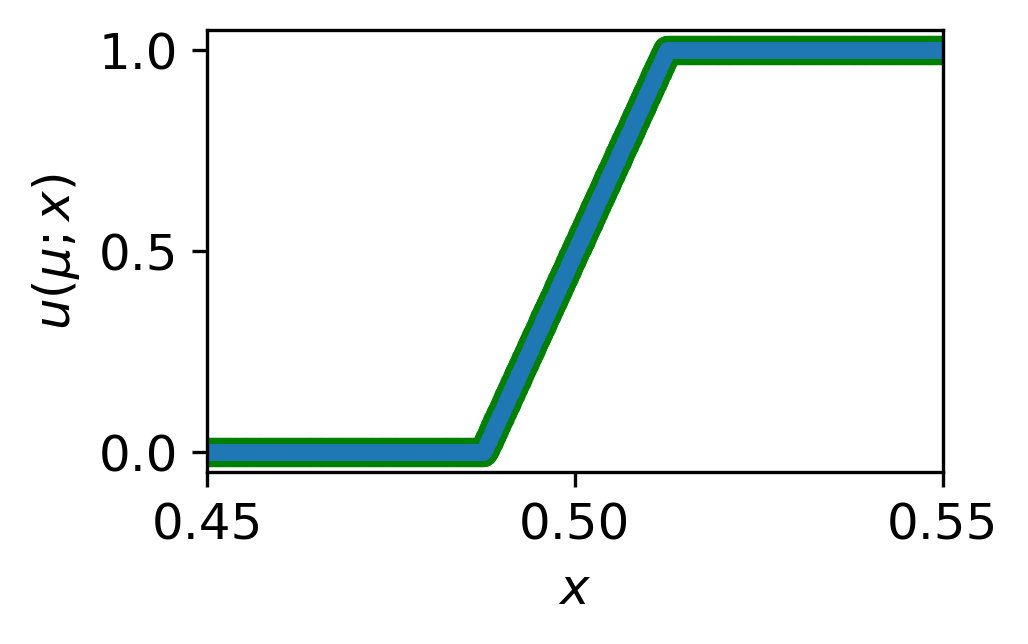

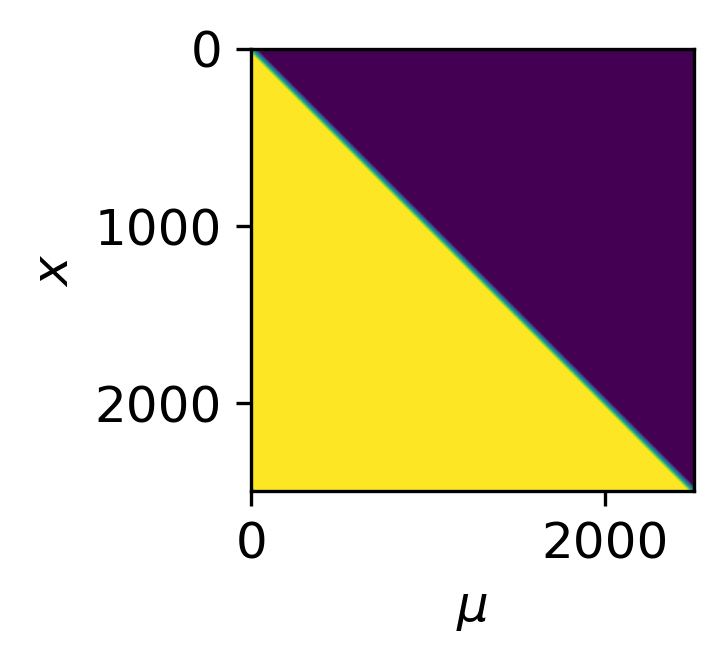

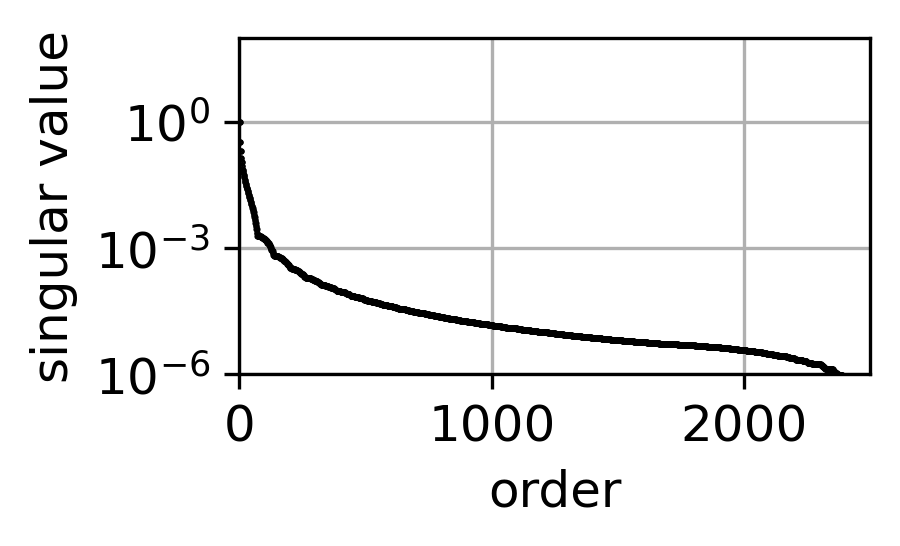

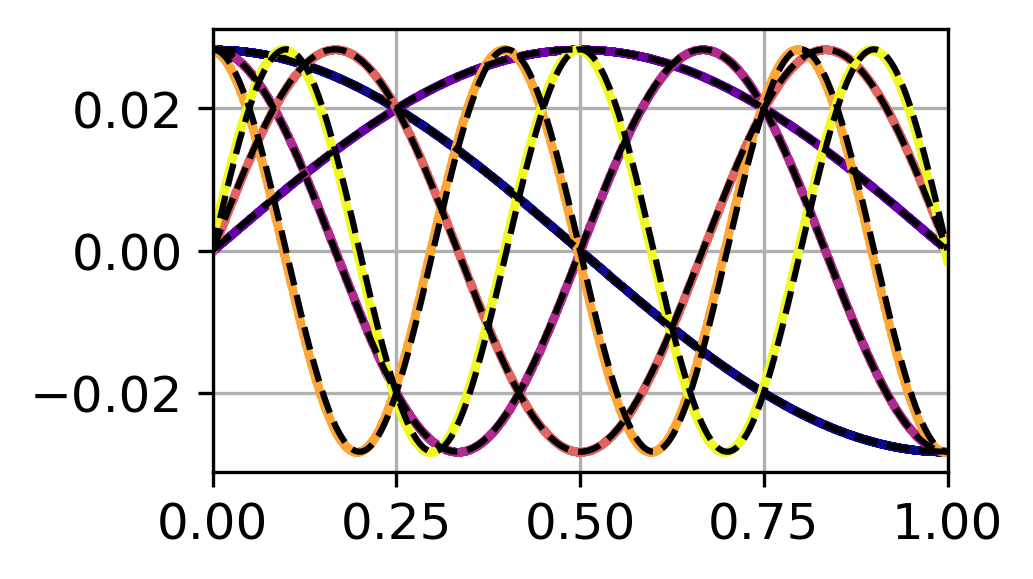

<ipython-input-6-92a58913ee10>:39: RuntimeWarning: divide by zero encountered in true_divide
  is_flipped = np.median(svd_basis.U/trig_basis_odd.U, axis=0) < 0


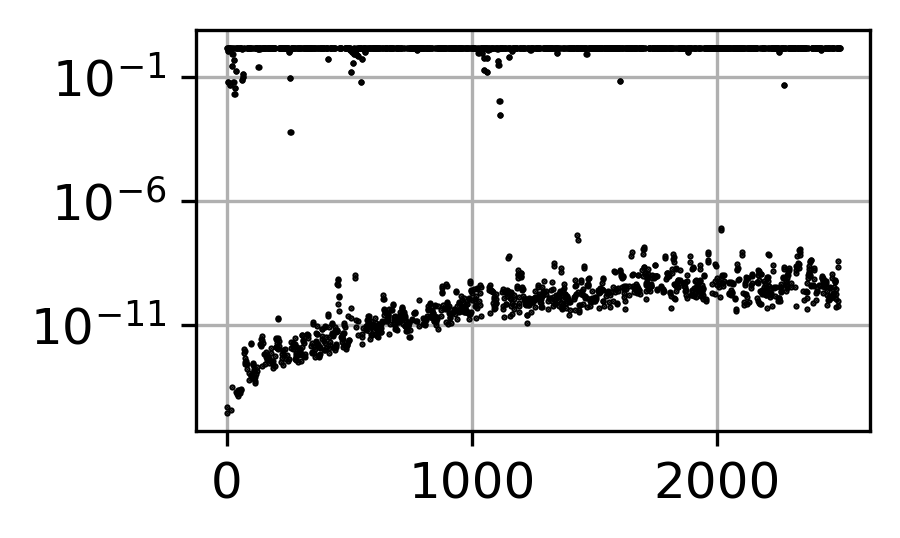

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


0 6 0.0
1 6 0.16666666666666666
2 6 0.3333333333333333
3 6 0.5
4 6 0.6666666666666666
5 6 0.8333333333333334


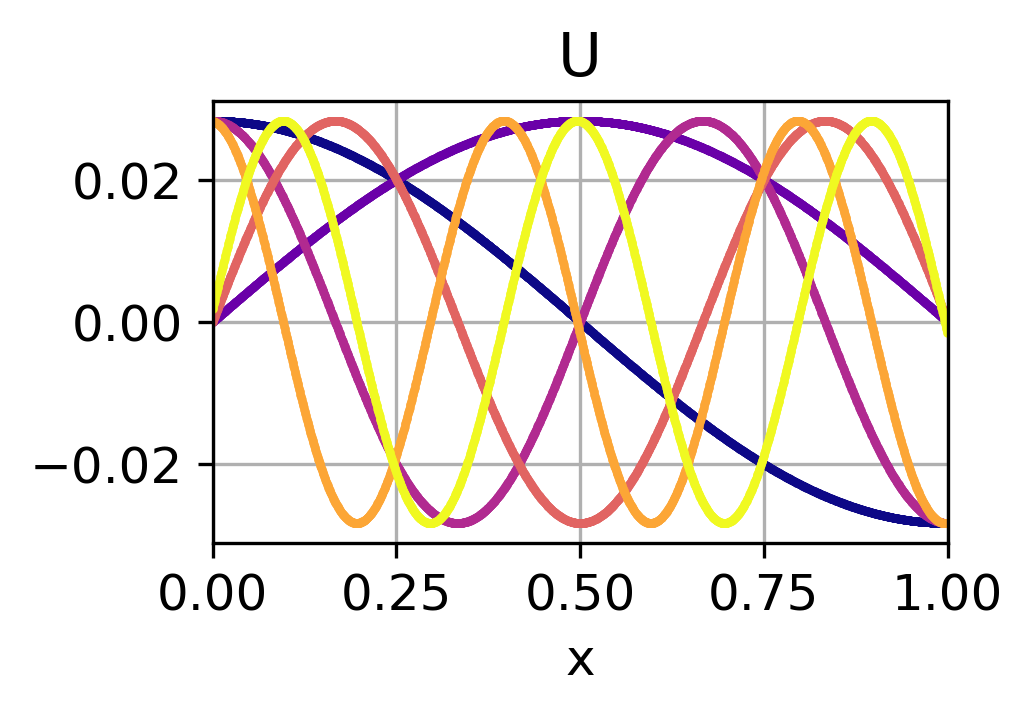

0 6 0.0
1 6 0.16666666666666666
2 6 0.3333333333333333
3 6 0.5
4 6 0.6666666666666666
5 6 0.8333333333333334


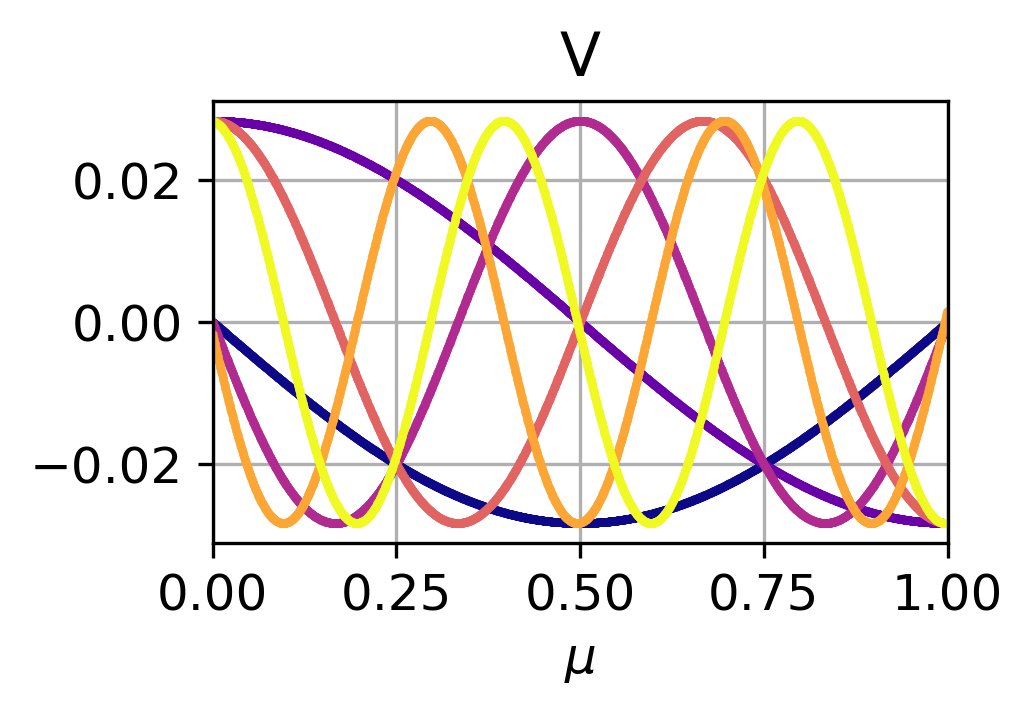

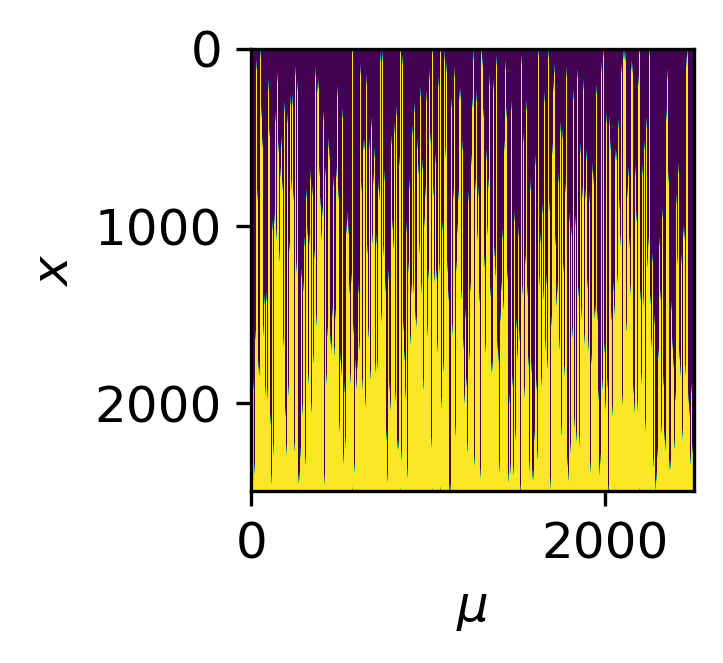

svd
calc_error: 2500 2500 500
1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321, 326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386, 391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451, 456, 461, 466, 471, 476, 481, 486, 491, 496, 
trigonometric_all
calc_error: 2500 2500 500
1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321, 326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386, 391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451, 456, 461, 466,

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


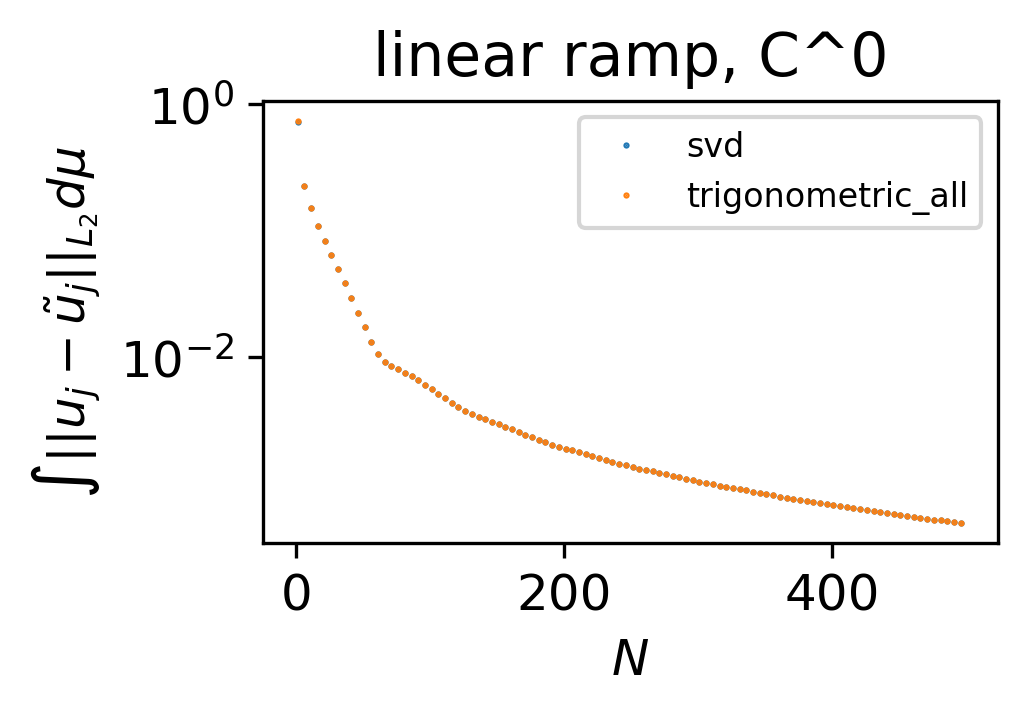

heaviside


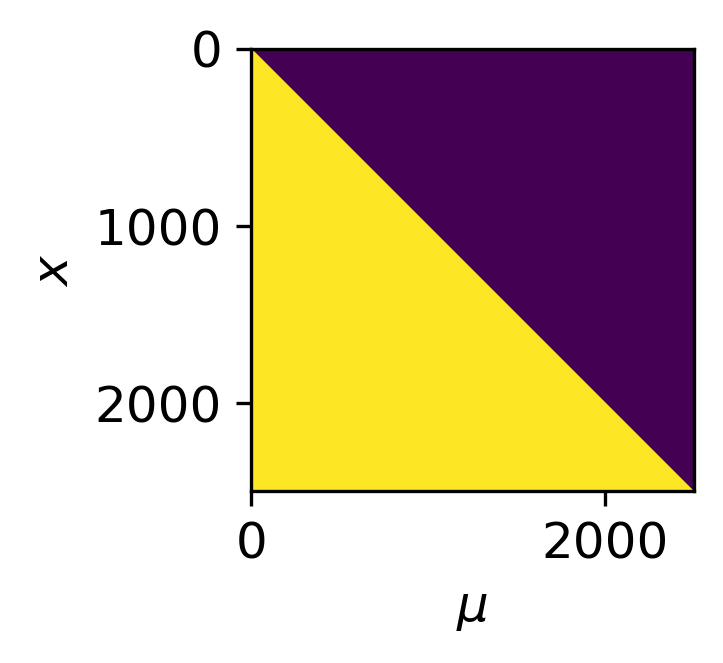

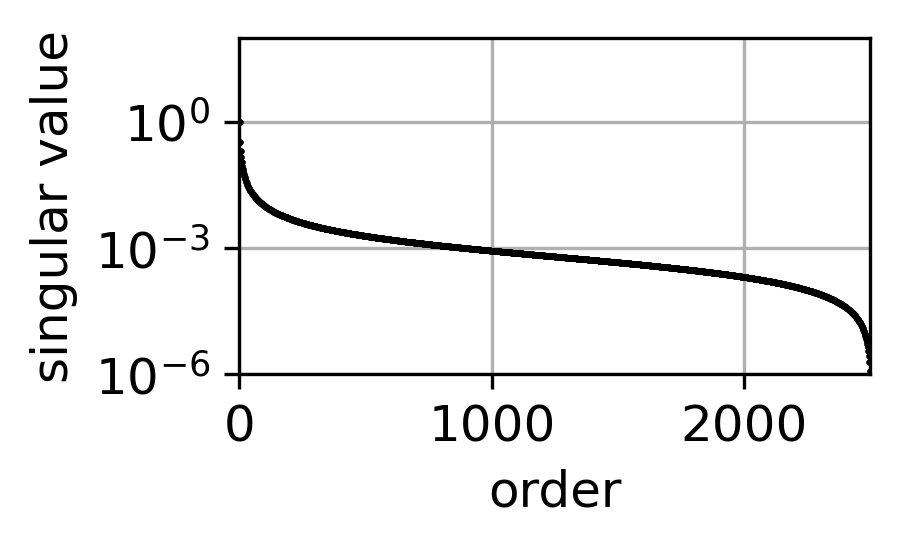

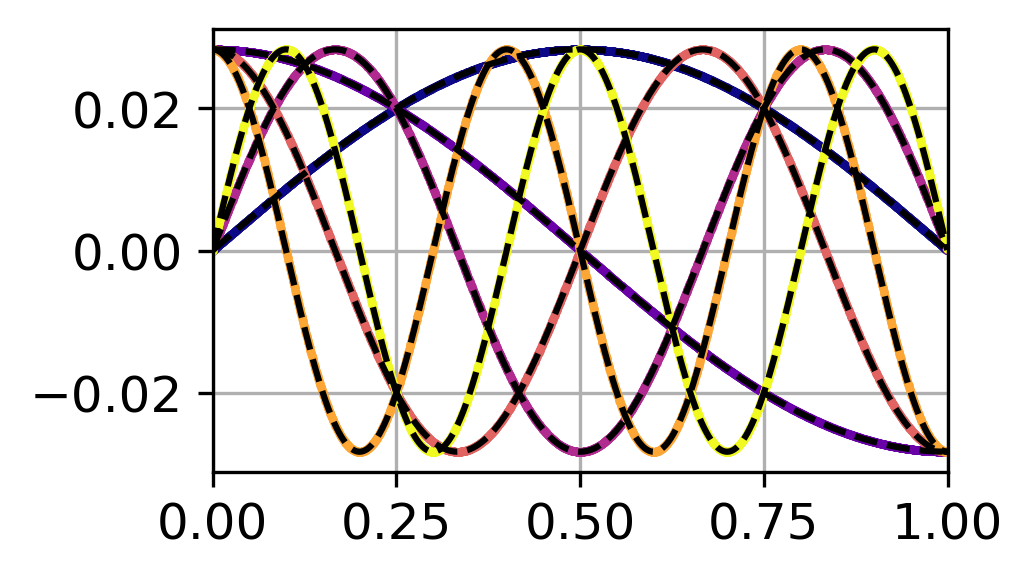

<ipython-input-6-92a58913ee10>:39: RuntimeWarning: divide by zero encountered in true_divide
  is_flipped = np.median(svd_basis.U/trig_basis_odd.U, axis=0) < 0


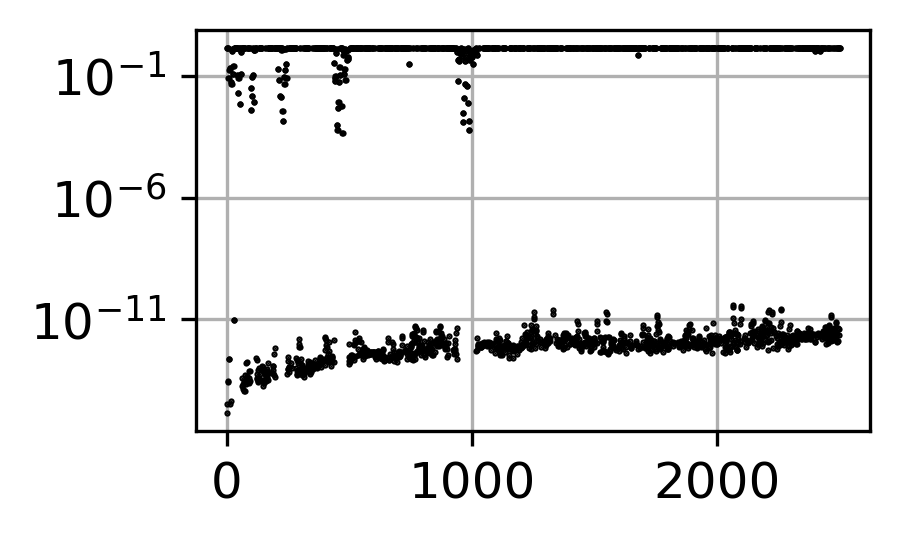

0 6 0.0
1 6 0.16666666666666666
2 6 0.3333333333333333
3 6 0.5
4 6 0.6666666666666666
5 6 0.8333333333333334


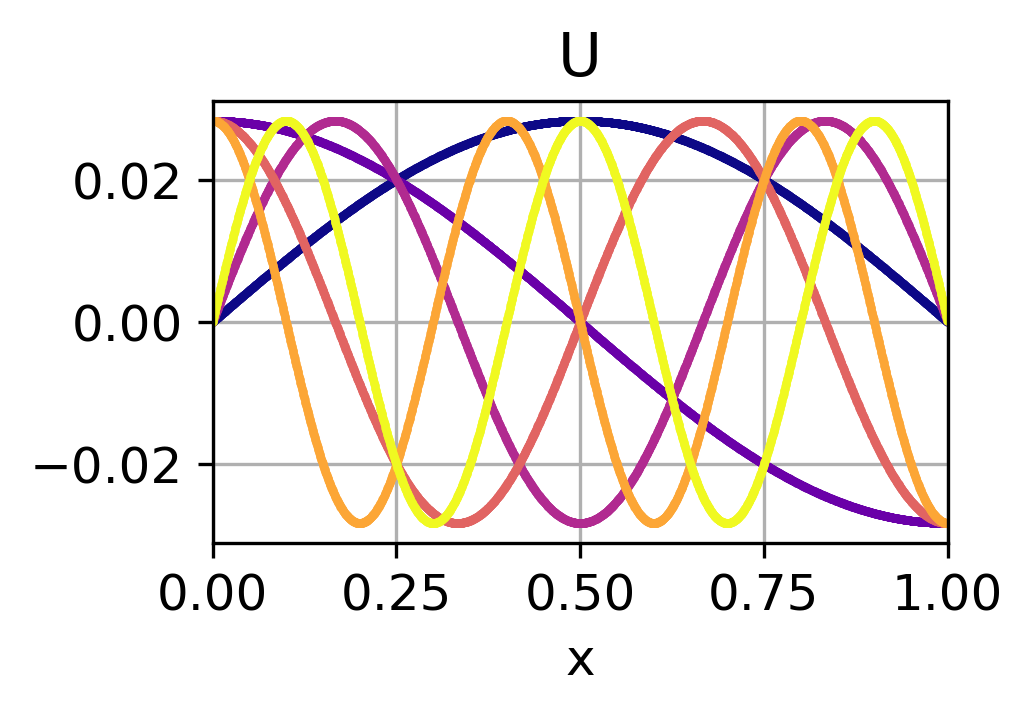

0 6 0.0
1 6 0.16666666666666666
2 6 0.3333333333333333
3 6 0.5
4 6 0.6666666666666666
5 6 0.8333333333333334


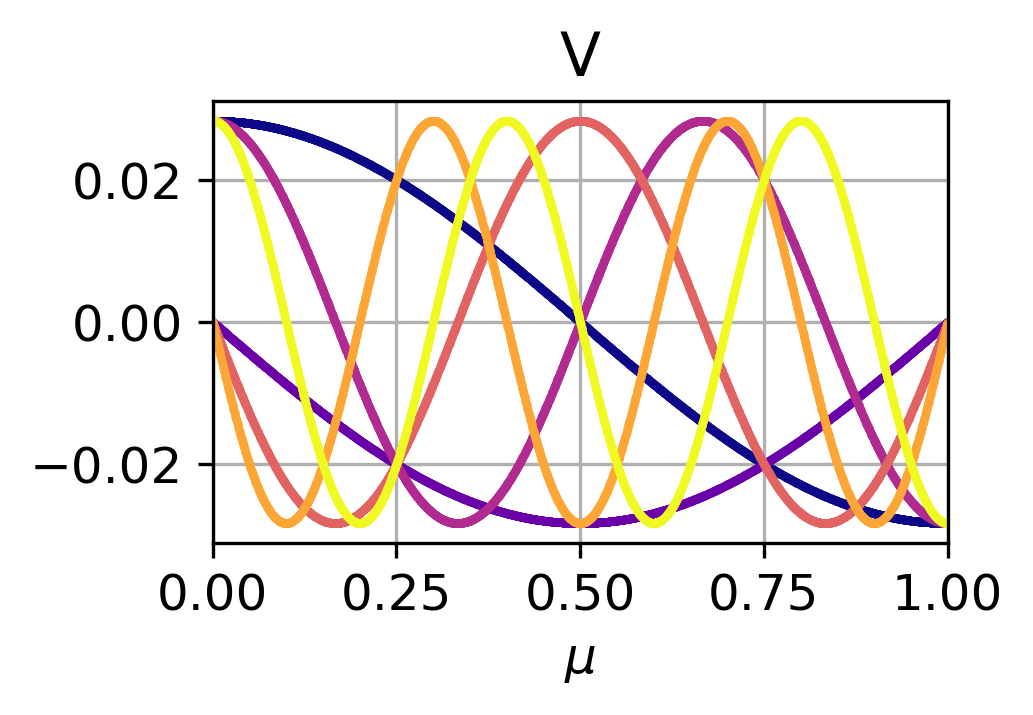

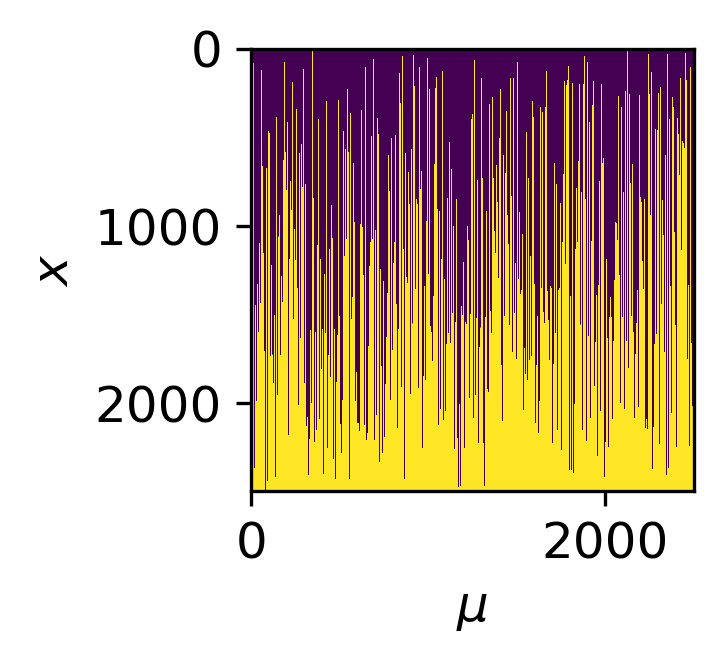

svd
calc_error: 2500 2500 500
1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321, 326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386, 391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451, 456, 461, 466, 471, 476, 481, 486, 491, 496, 
trigonometric_all
calc_error: 2500 2500 500
1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321, 326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386, 391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451, 456, 461, 466,

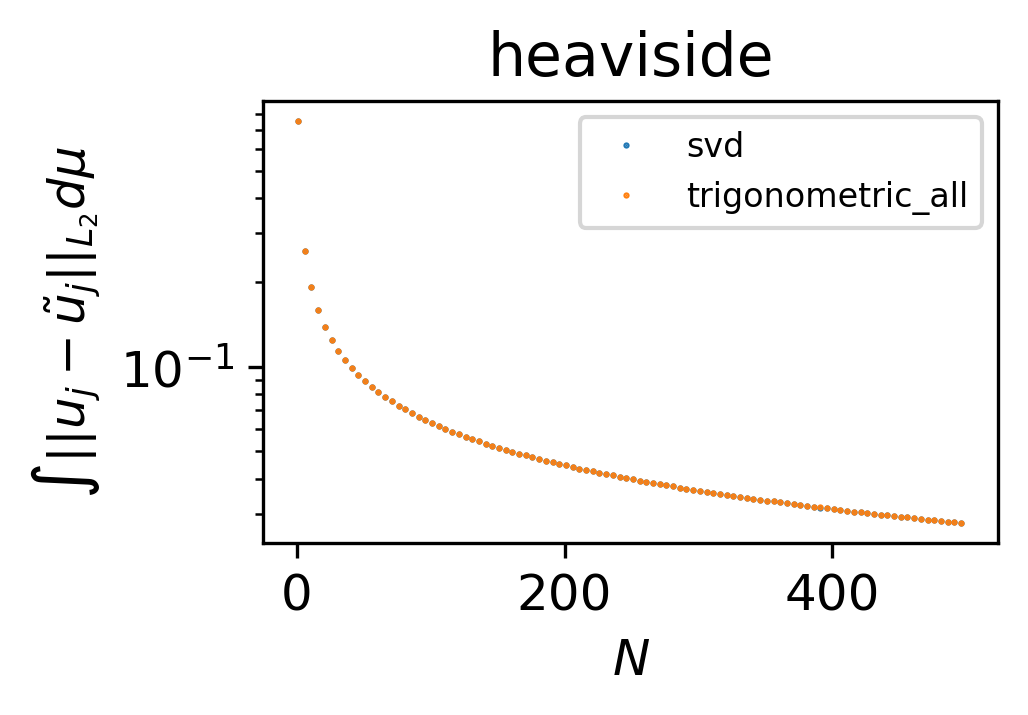

smooth ramp, C^1
mu_test =  0.5000500050005001
epsilon =  0.03316168328741189
cov =  [[7.34920826e-10]]
mu_test =  0.5000500050005001


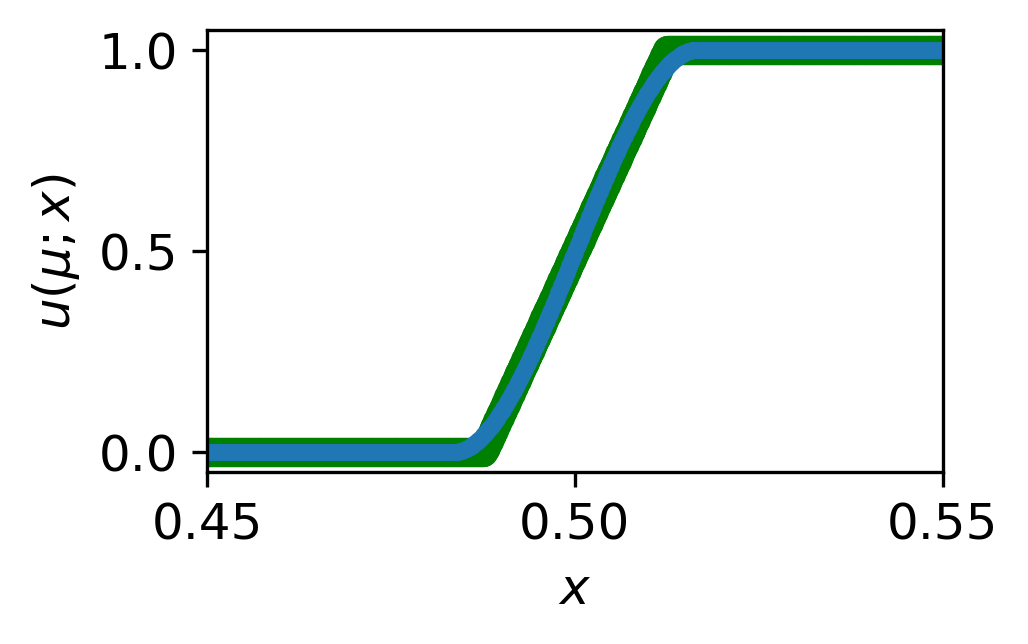

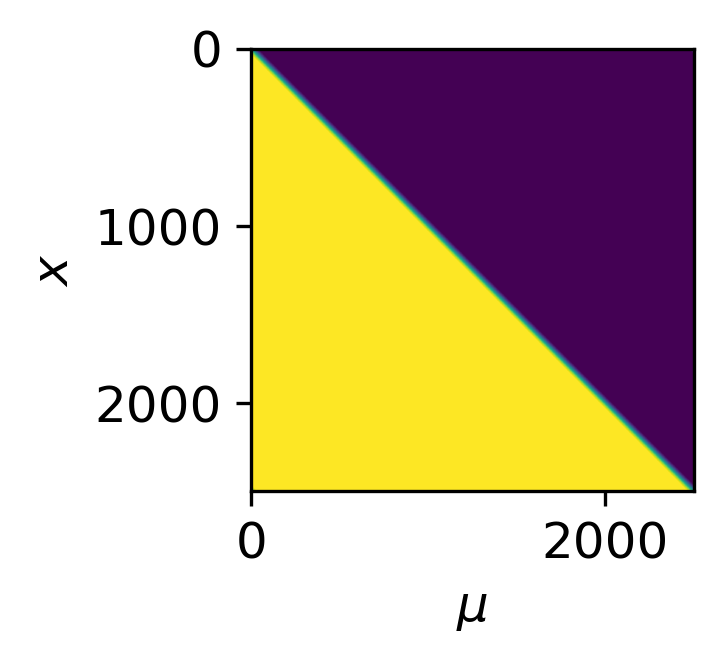

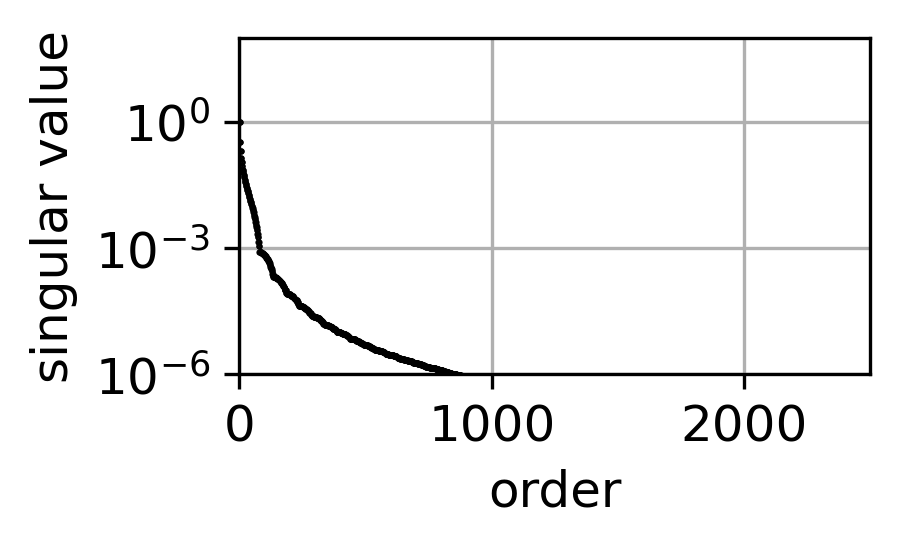

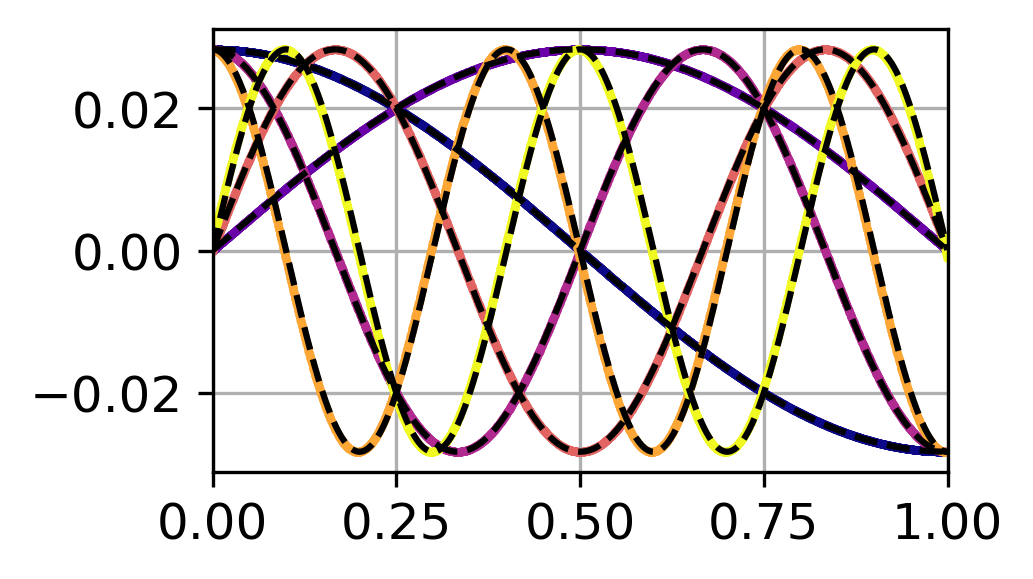

<ipython-input-6-92a58913ee10>:39: RuntimeWarning: divide by zero encountered in true_divide
  is_flipped = np.median(svd_basis.U/trig_basis_odd.U, axis=0) < 0


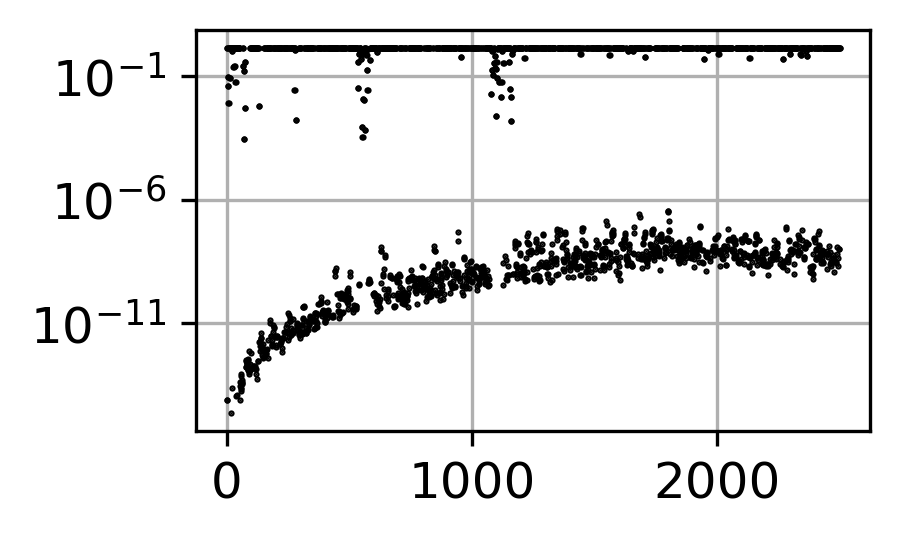

0 6 0.0
1 6 0.16666666666666666
2 6 0.3333333333333333
3 6 0.5
4 6 0.6666666666666666
5 6 0.8333333333333334


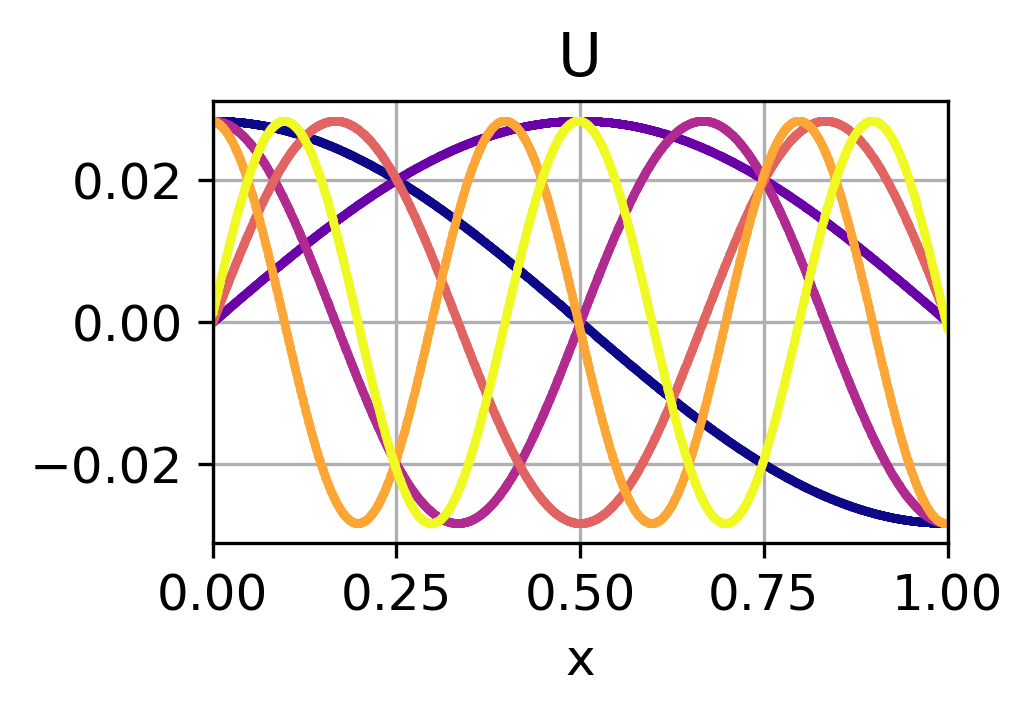

0 6 0.0
1 6 0.16666666666666666
2 6 0.3333333333333333
3 6 0.5
4 6 0.6666666666666666
5 6 0.8333333333333334


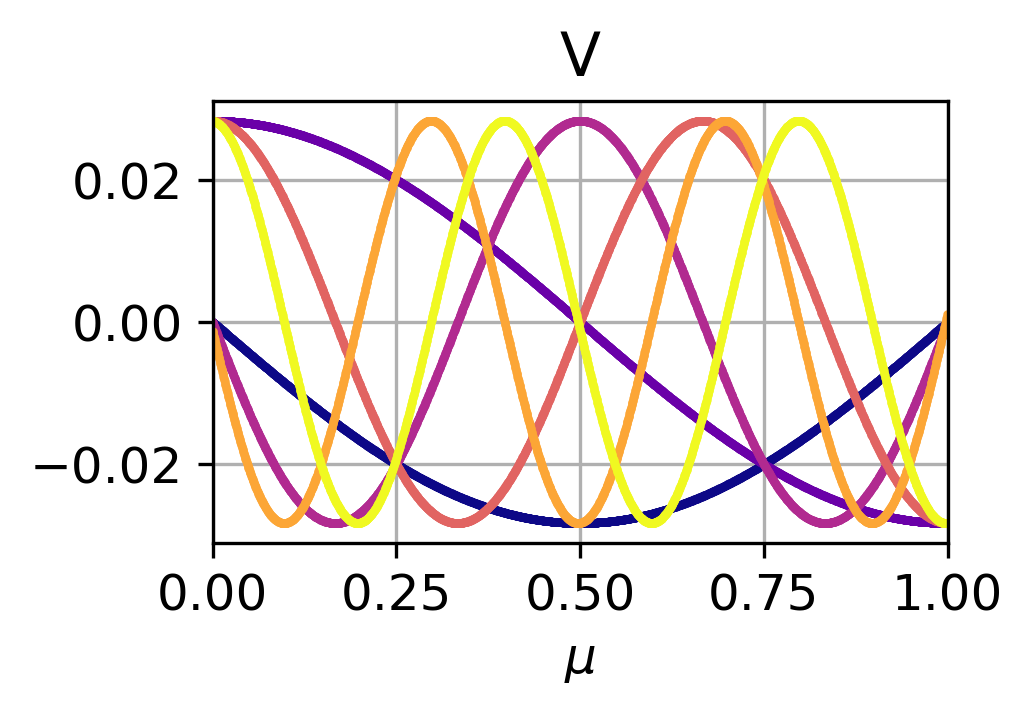

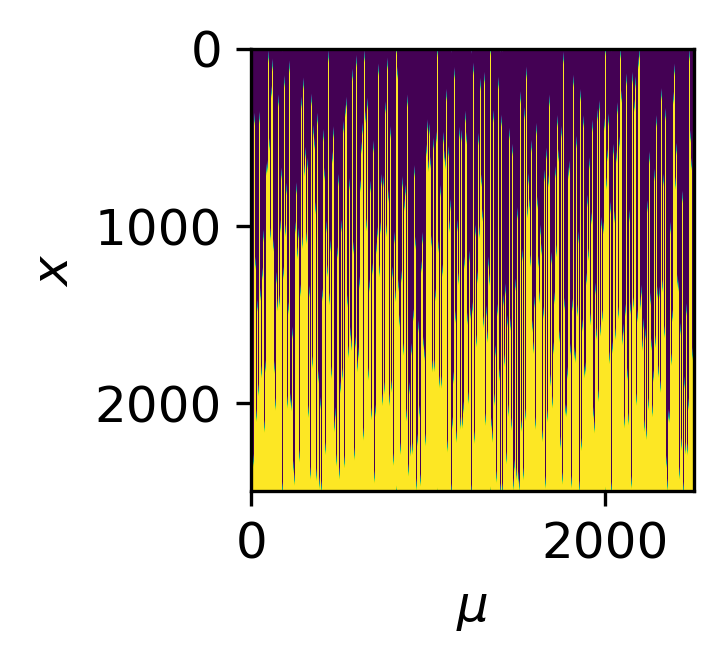

svd
calc_error: 2500 2500 500
1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321, 326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386, 391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451, 456, 461, 466, 471, 476, 481, 486, 491, 496, 
trigonometric_all
calc_error: 2500 2500 500
1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321, 326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386, 391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451, 456, 461, 466,

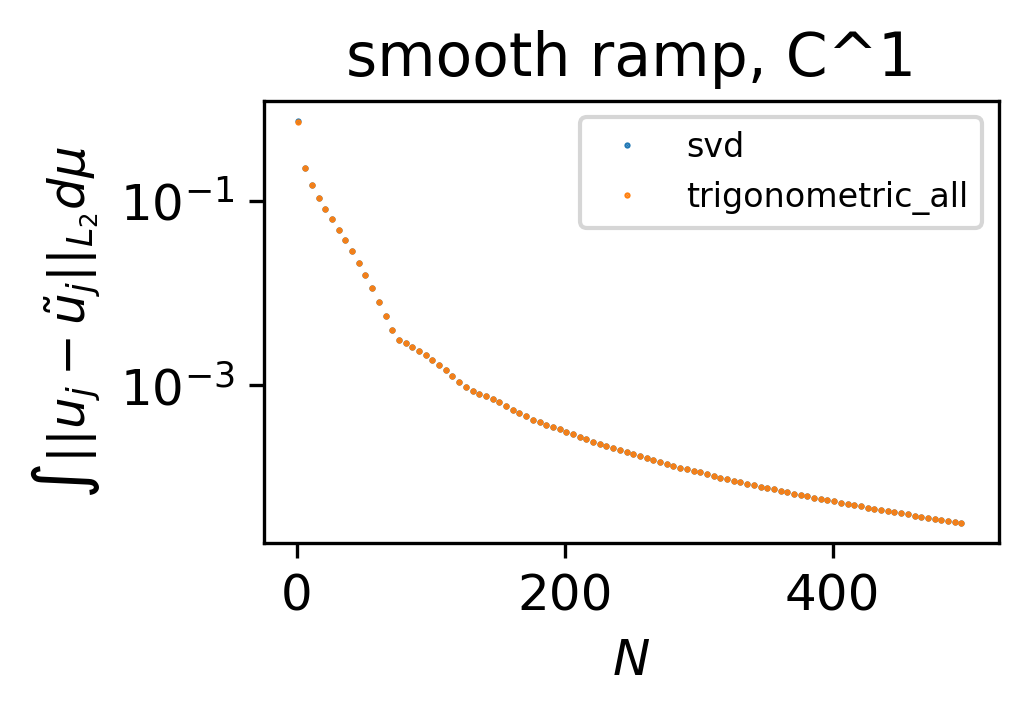

smooth ramp, C^2
mu_test =  0.5000500050005001
epsilon =  0.04001922754234522
cov =  [[1.92915843e-09]]
mu_test =  0.5000500050005001


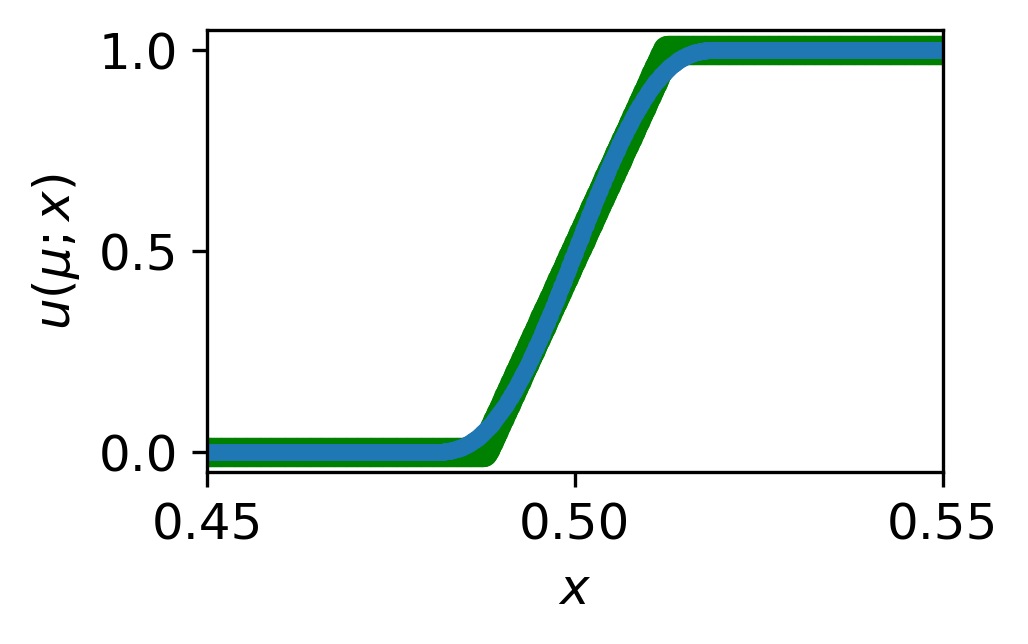

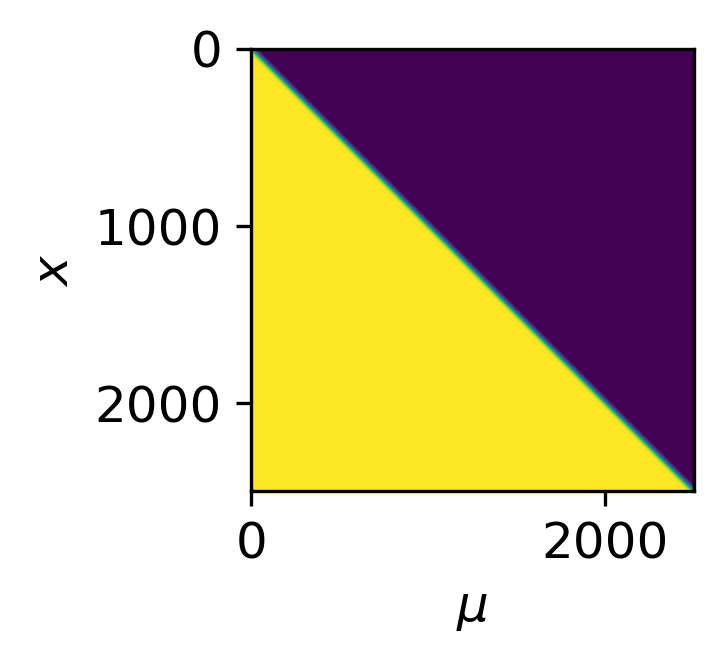

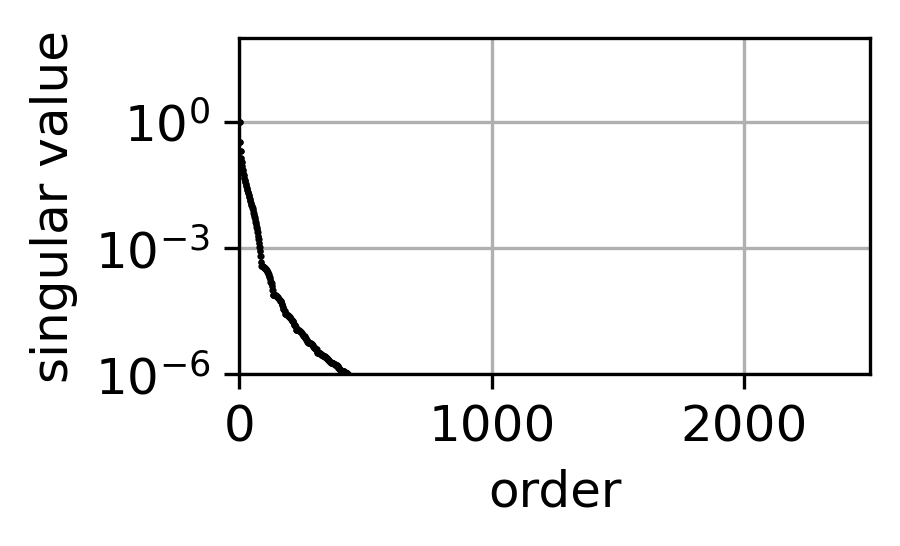

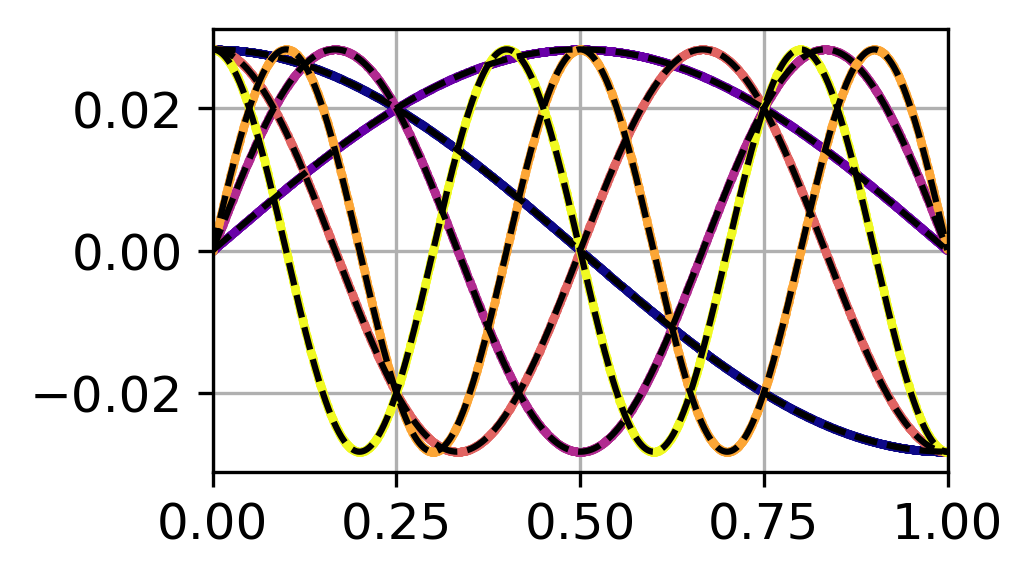

<ipython-input-6-92a58913ee10>:39: RuntimeWarning: divide by zero encountered in true_divide
  is_flipped = np.median(svd_basis.U/trig_basis_odd.U, axis=0) < 0


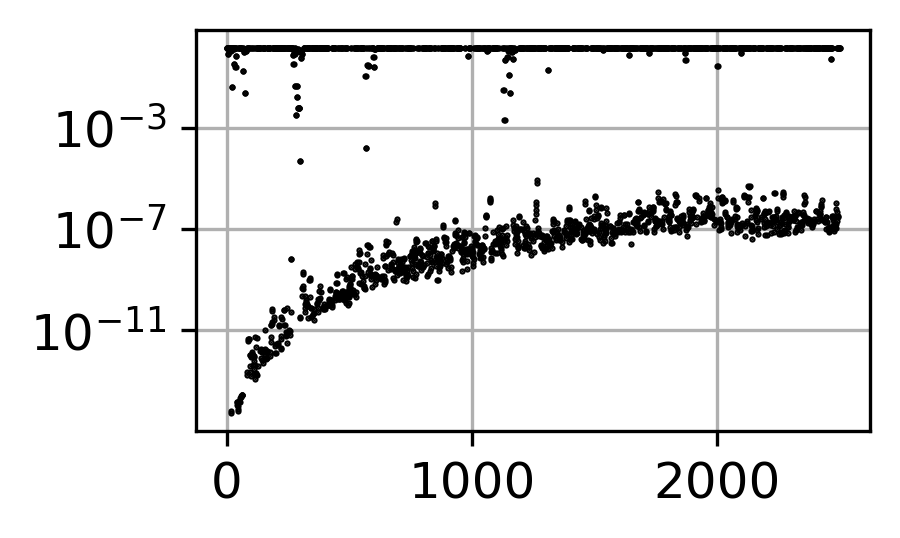

0 6 0.0
1 6 0.16666666666666666
2 6 0.3333333333333333
3 6 0.5
4 6 0.6666666666666666
5 6 0.8333333333333334


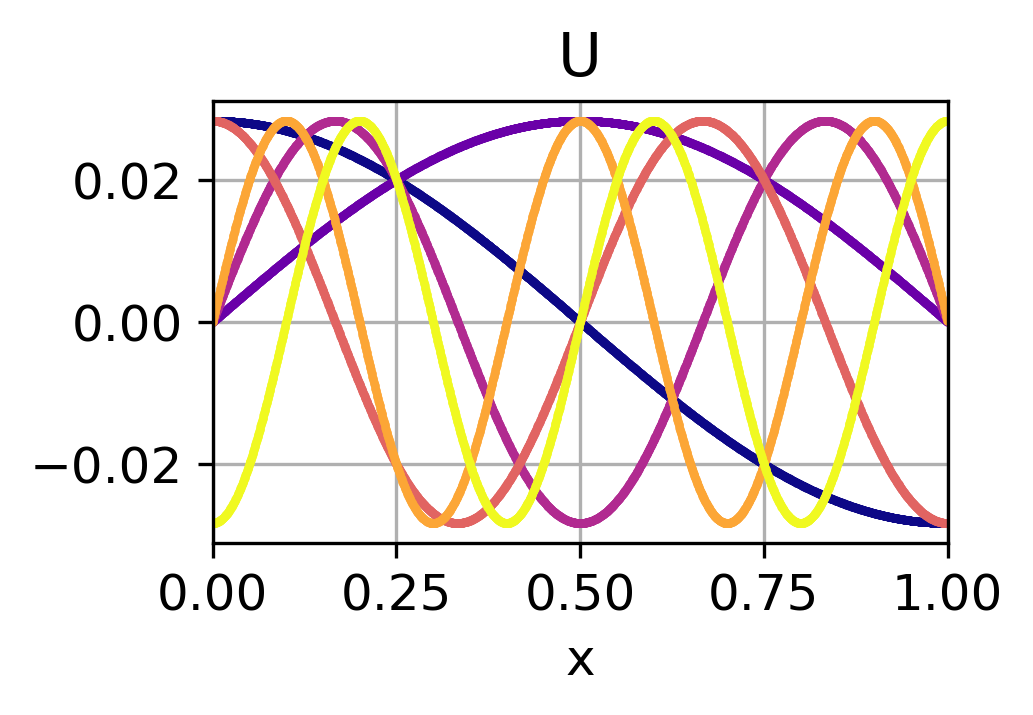

0 6 0.0
1 6 0.16666666666666666
2 6 0.3333333333333333
3 6 0.5
4 6 0.6666666666666666
5 6 0.8333333333333334


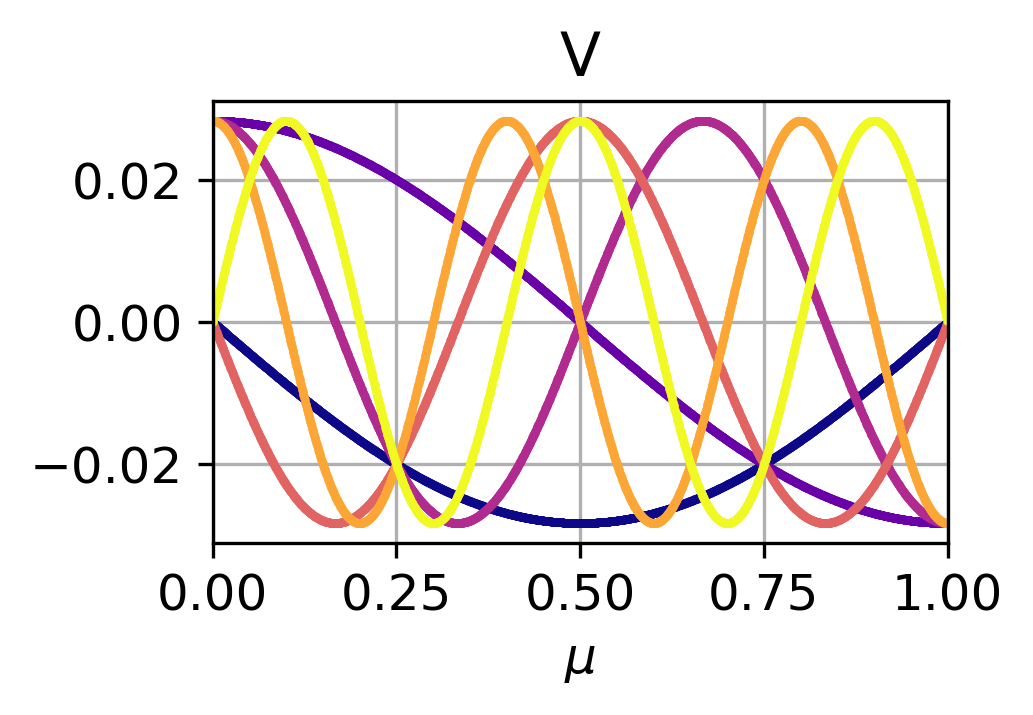

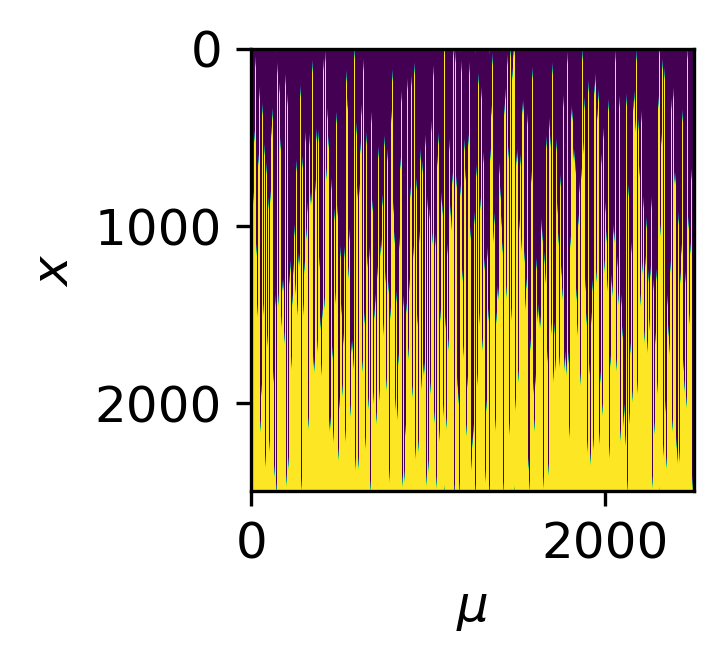

svd
calc_error: 2500 2500 500
1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321, 326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386, 391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451, 456, 461, 466, 471, 476, 481, 486, 491, 496, 
trigonometric_all
calc_error: 2500 2500 500
1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321, 326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386, 391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451, 456, 461, 466,

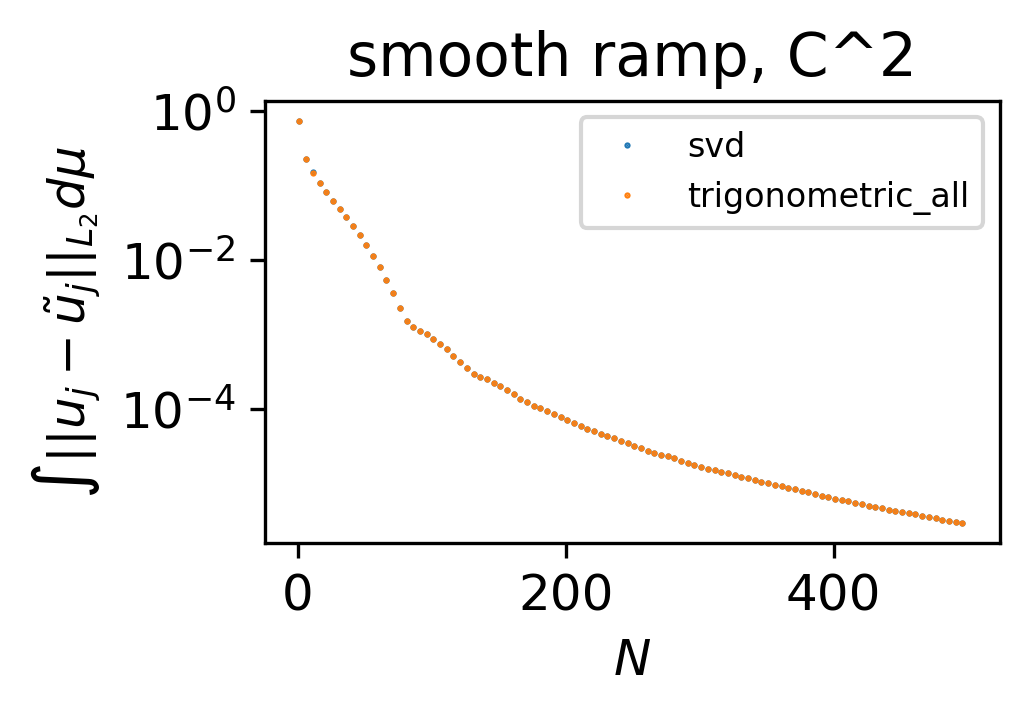

smooth ramp, C^3
mu_test =  0.5000500050005001
epsilon =  0.04591862571115181
cov =  [[3.22181004e-09]]
mu_test =  0.5000500050005001


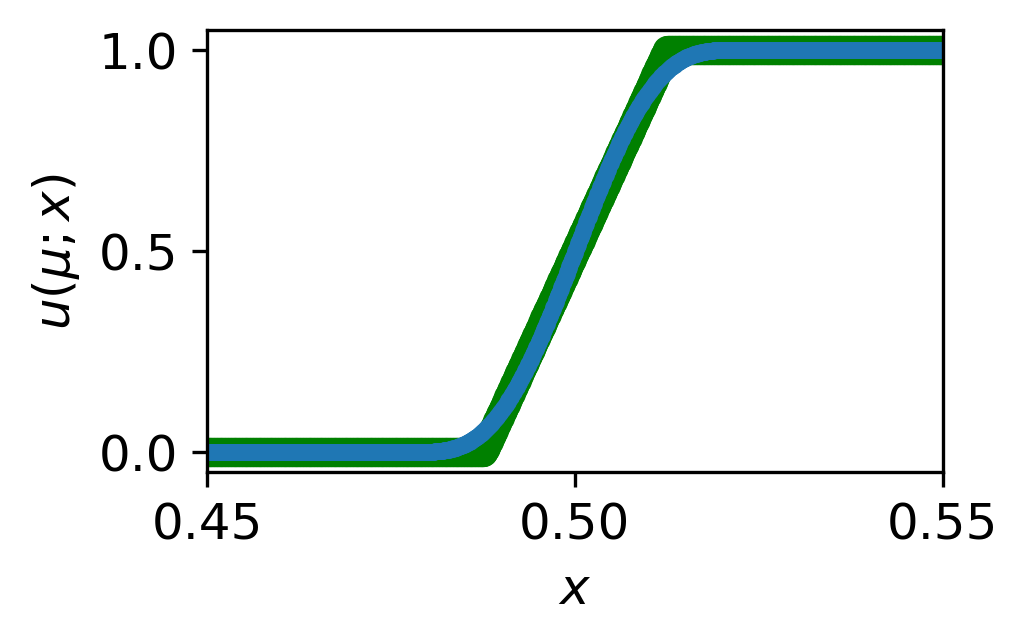

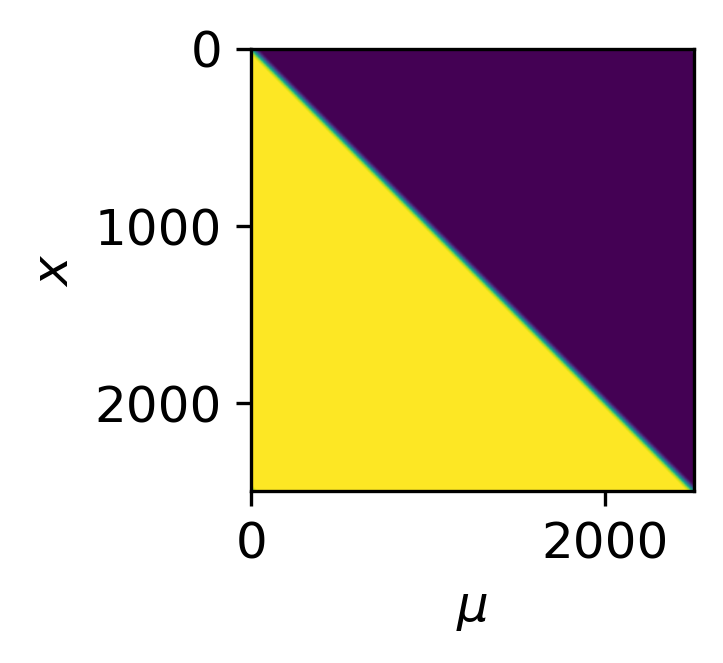

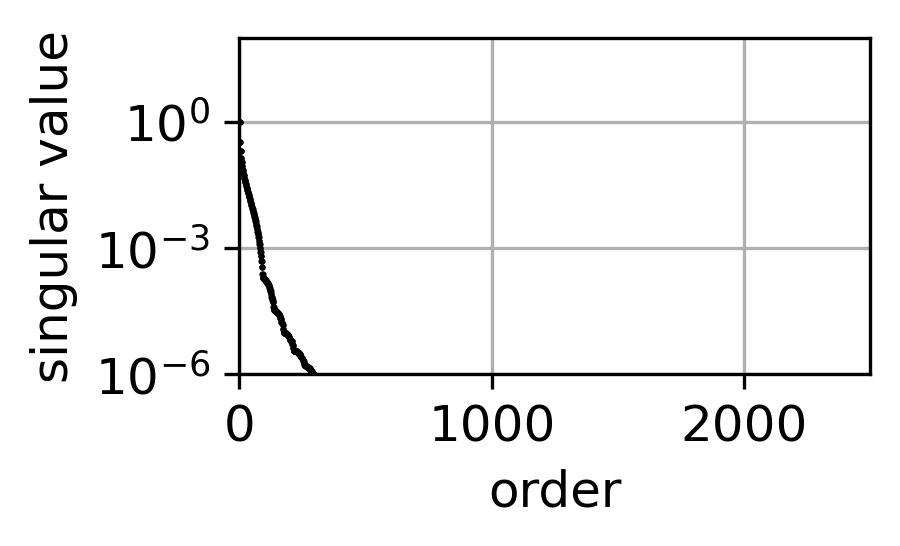

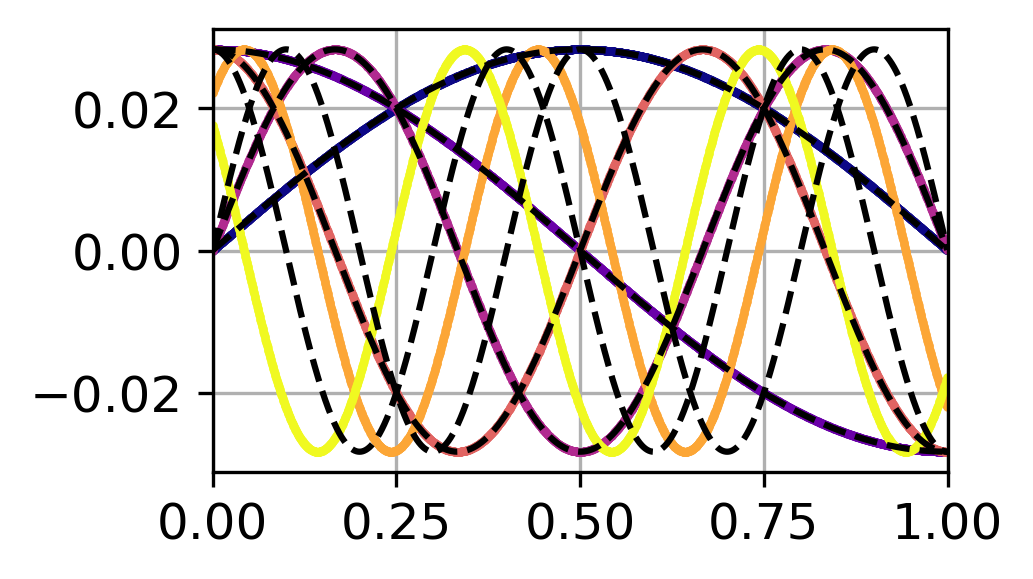

<ipython-input-6-92a58913ee10>:39: RuntimeWarning: divide by zero encountered in true_divide
  is_flipped = np.median(svd_basis.U/trig_basis_odd.U, axis=0) < 0


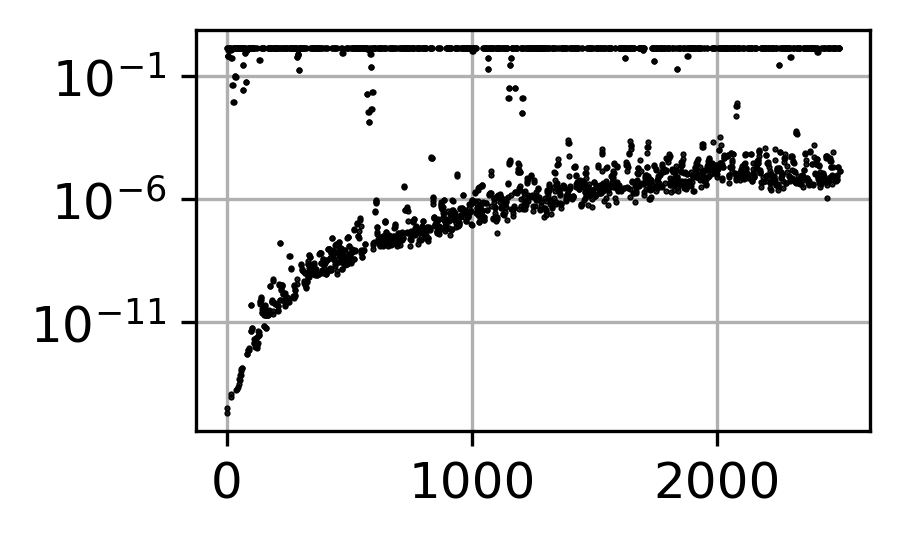

0 6 0.0
1 6 0.16666666666666666
2 6 0.3333333333333333
3 6 0.5
4 6 0.6666666666666666
5 6 0.8333333333333334


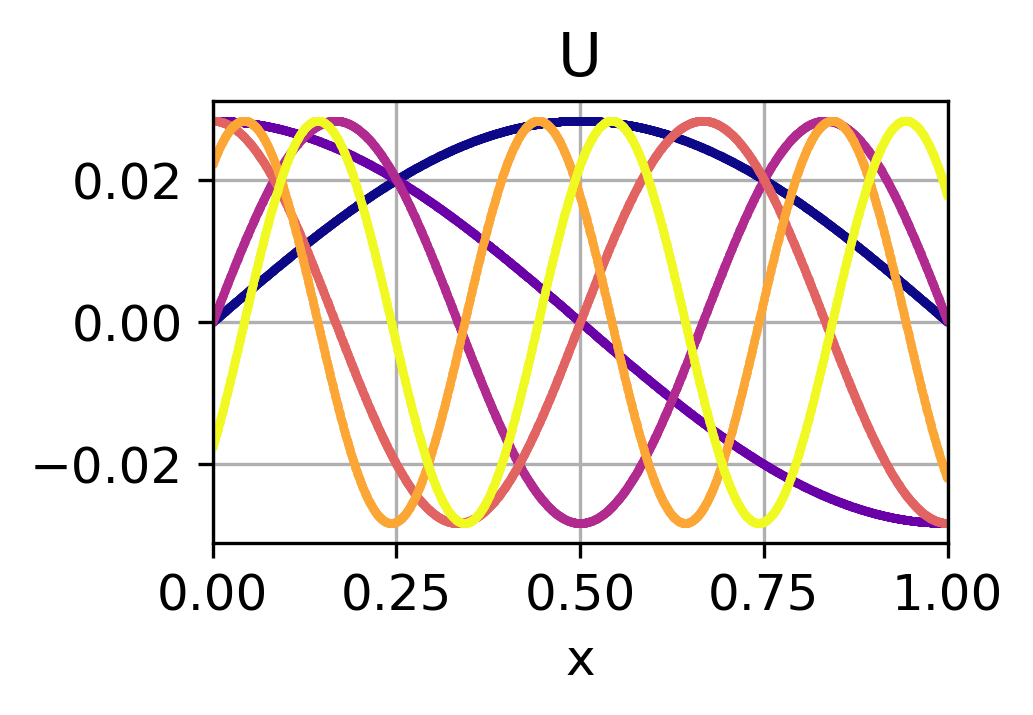

0 6 0.0
1 6 0.16666666666666666
2 6 0.3333333333333333
3 6 0.5
4 6 0.6666666666666666
5 6 0.8333333333333334


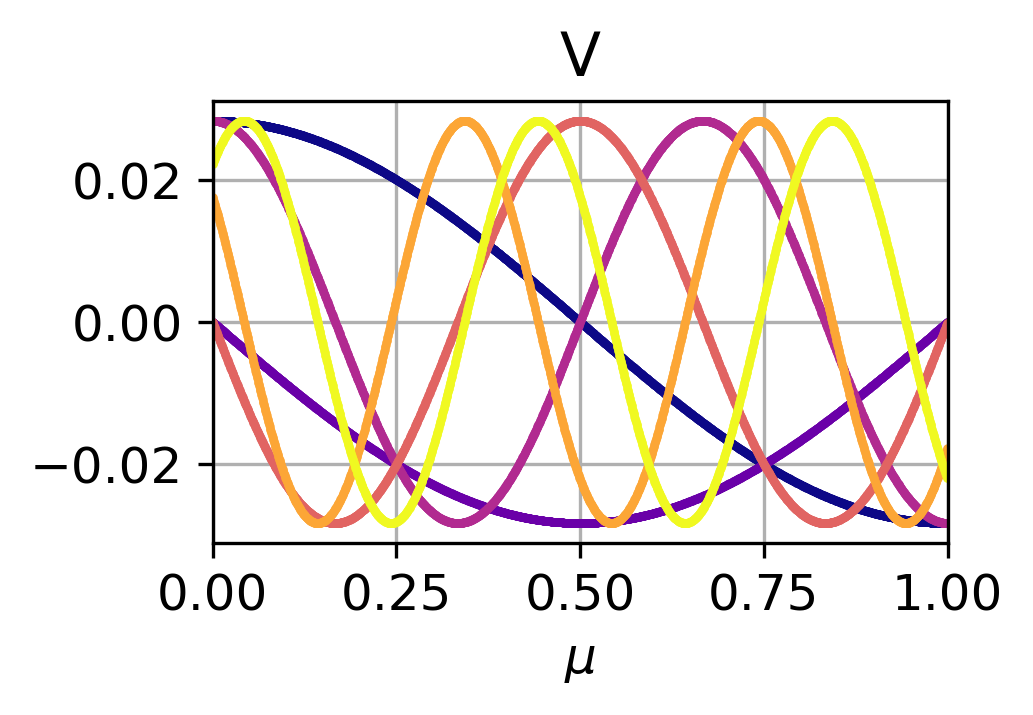

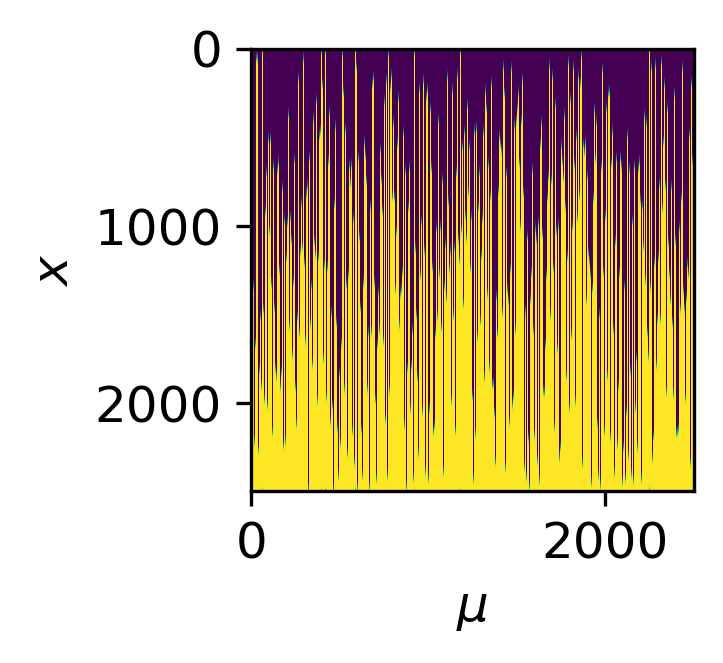

svd
calc_error: 2500 2500 500
1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321, 326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386, 391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451, 456, 461, 466, 471, 476, 481, 486, 491, 496, 
trigonometric_all
calc_error: 2500 2500 500
1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321, 326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386, 391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451, 456, 461, 466,

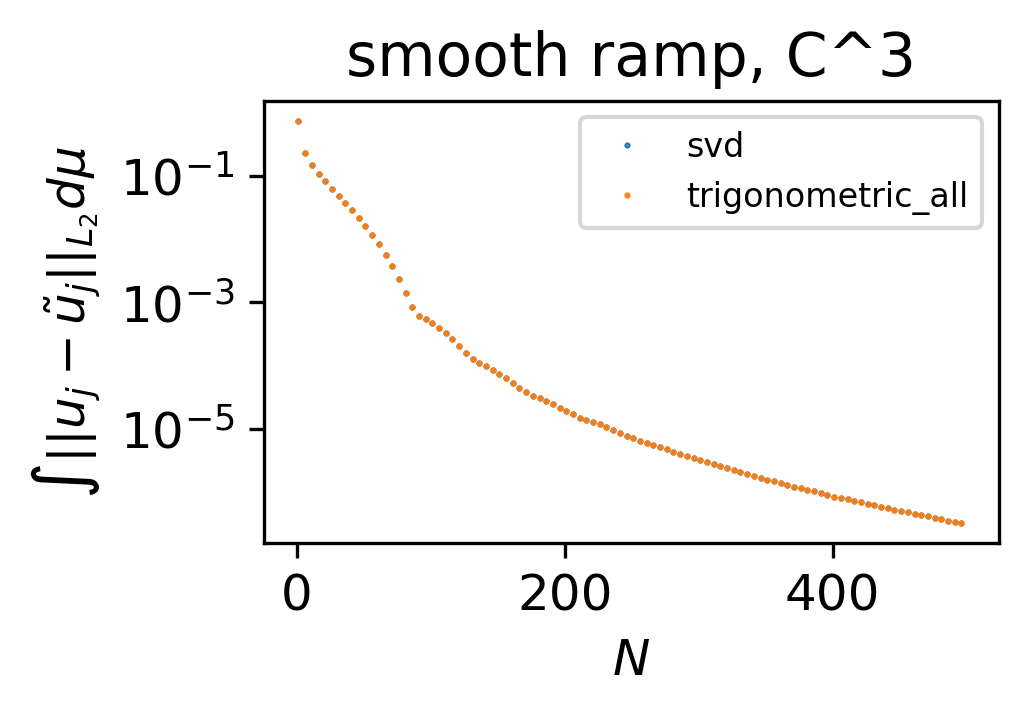

smooth ramp, C^4
mu_test =  0.5000500050005001
epsilon =  0.05116043398053234
cov =  [[4.55007091e-09]]
mu_test =  0.5000500050005001


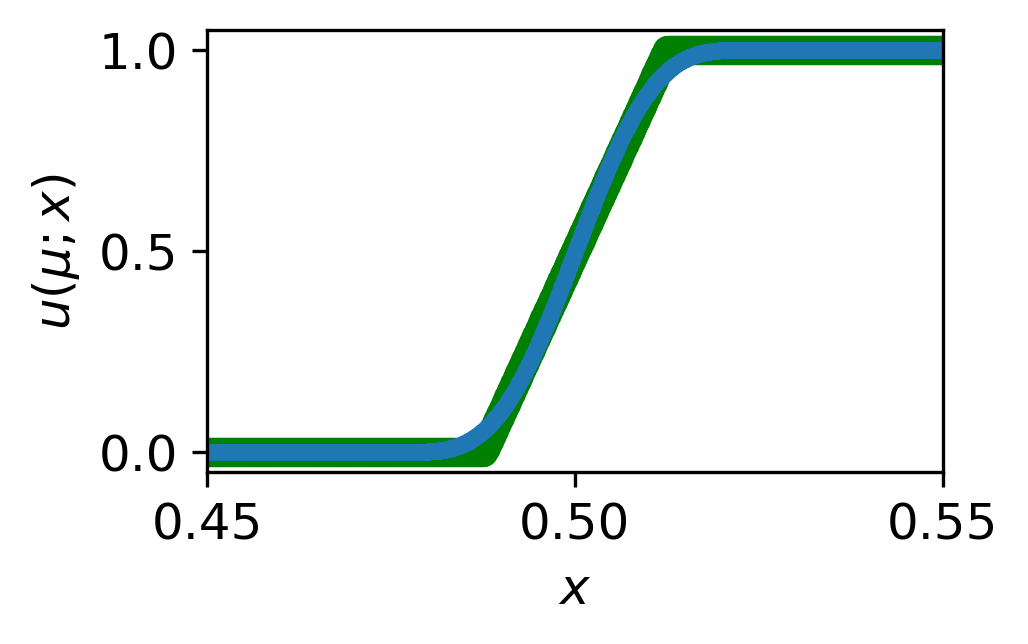

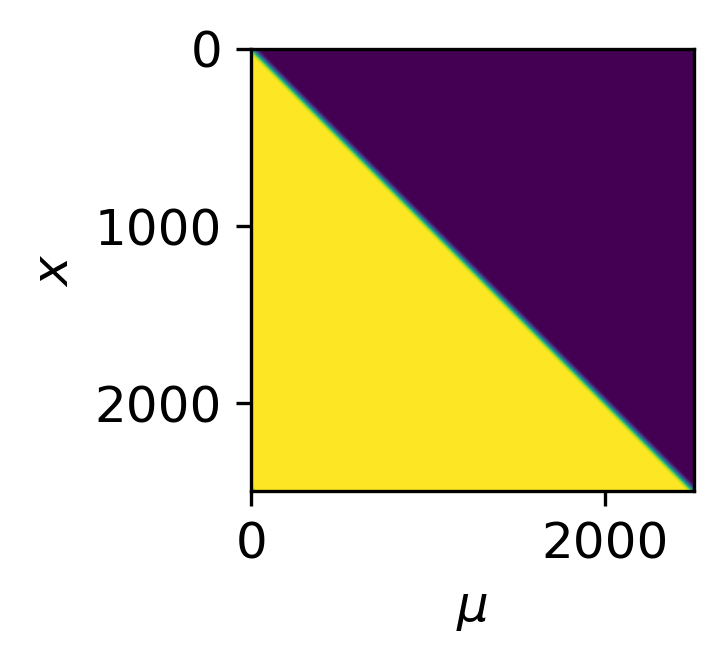

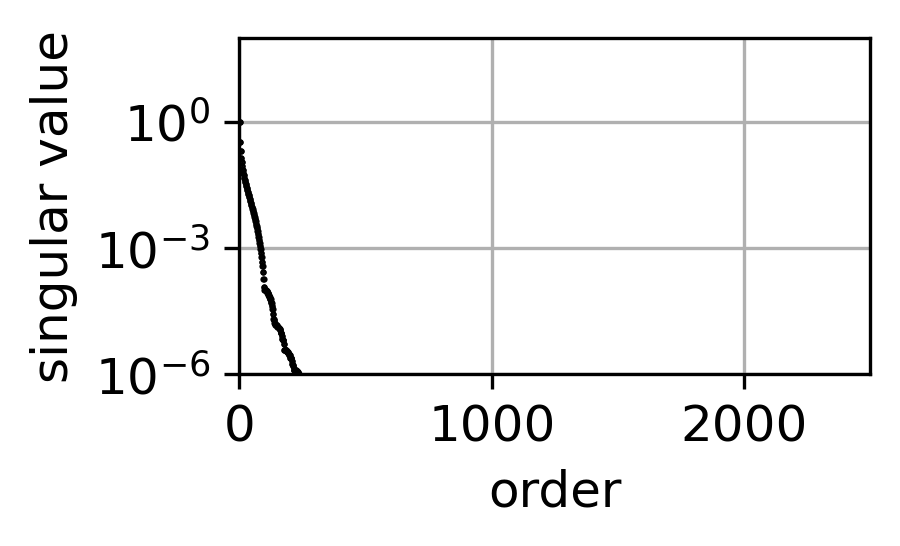

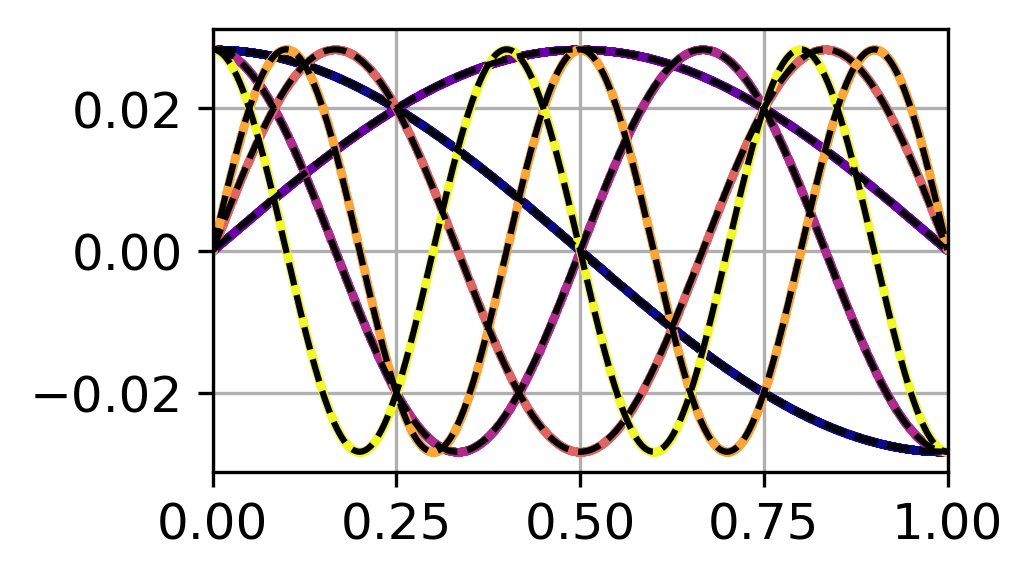

<ipython-input-6-92a58913ee10>:39: RuntimeWarning: divide by zero encountered in true_divide
  is_flipped = np.median(svd_basis.U/trig_basis_odd.U, axis=0) < 0


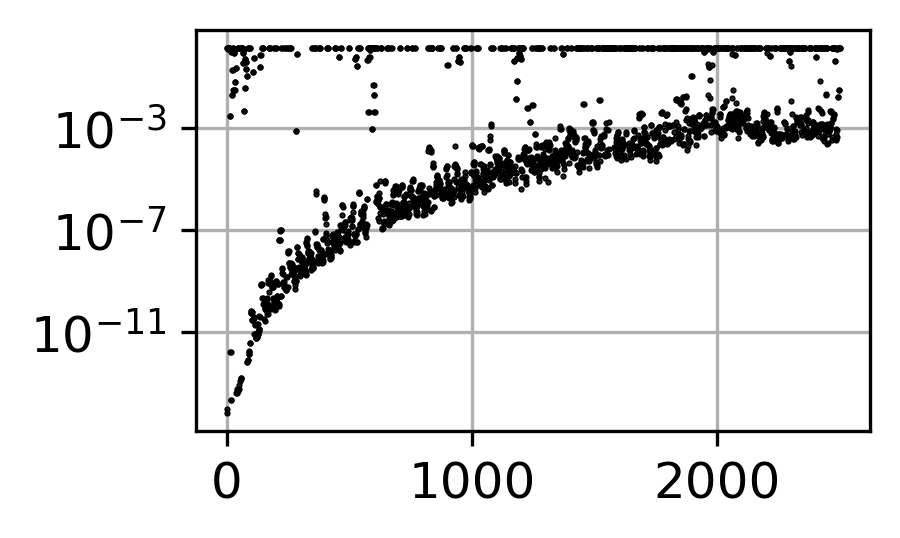

0 6 0.0
1 6 0.16666666666666666
2 6 0.3333333333333333
3 6 0.5
4 6 0.6666666666666666
5 6 0.8333333333333334


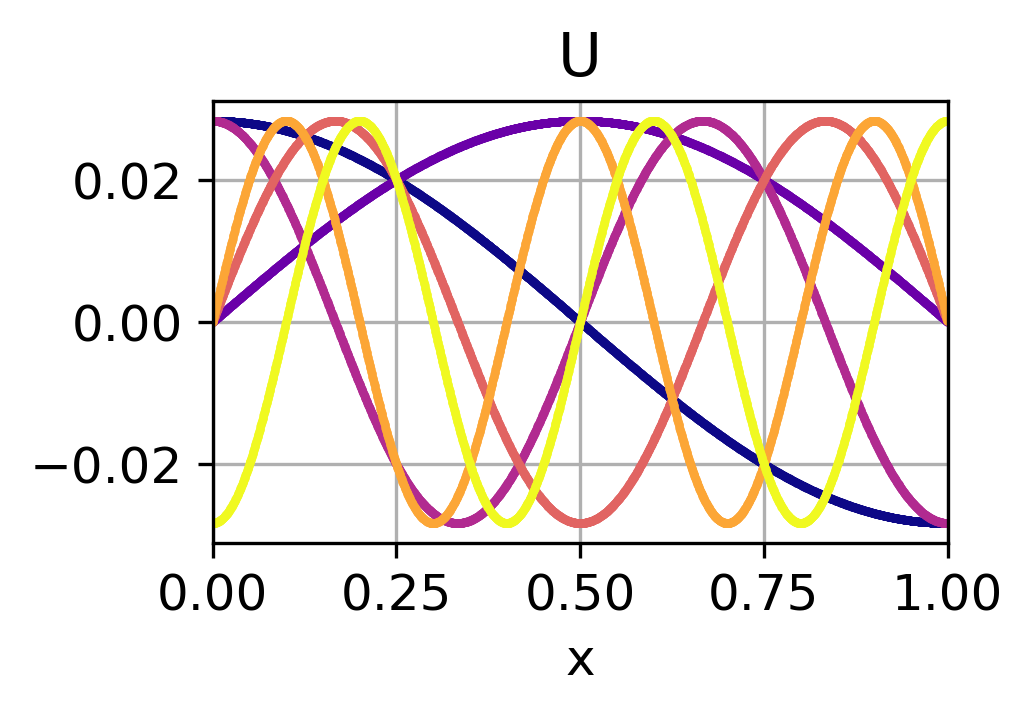

0 6 0.0
1 6 0.16666666666666666
2 6 0.3333333333333333
3 6 0.5
4 6 0.6666666666666666
5 6 0.8333333333333334


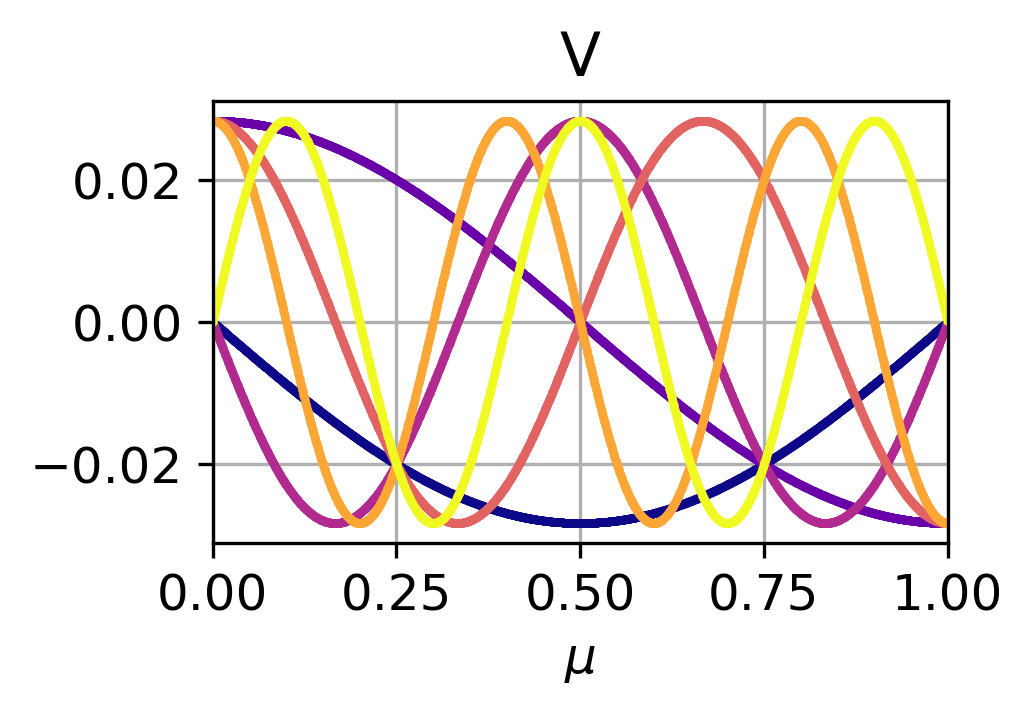

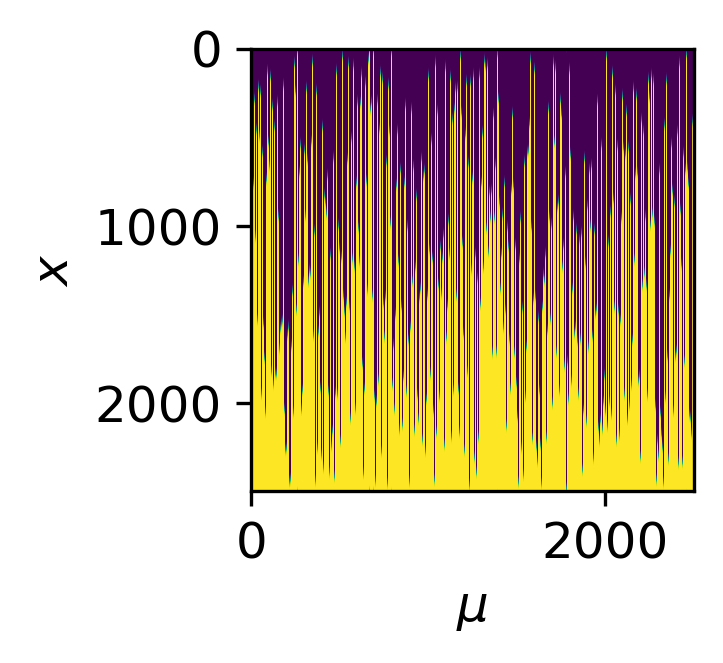

svd
calc_error: 2500 2500 500
1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321, 326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386, 391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451, 456, 461, 466, 471, 476, 481, 486, 491, 496, 
trigonometric_all
calc_error: 2500 2500 500
1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321, 326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386, 391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451, 456, 461, 466,

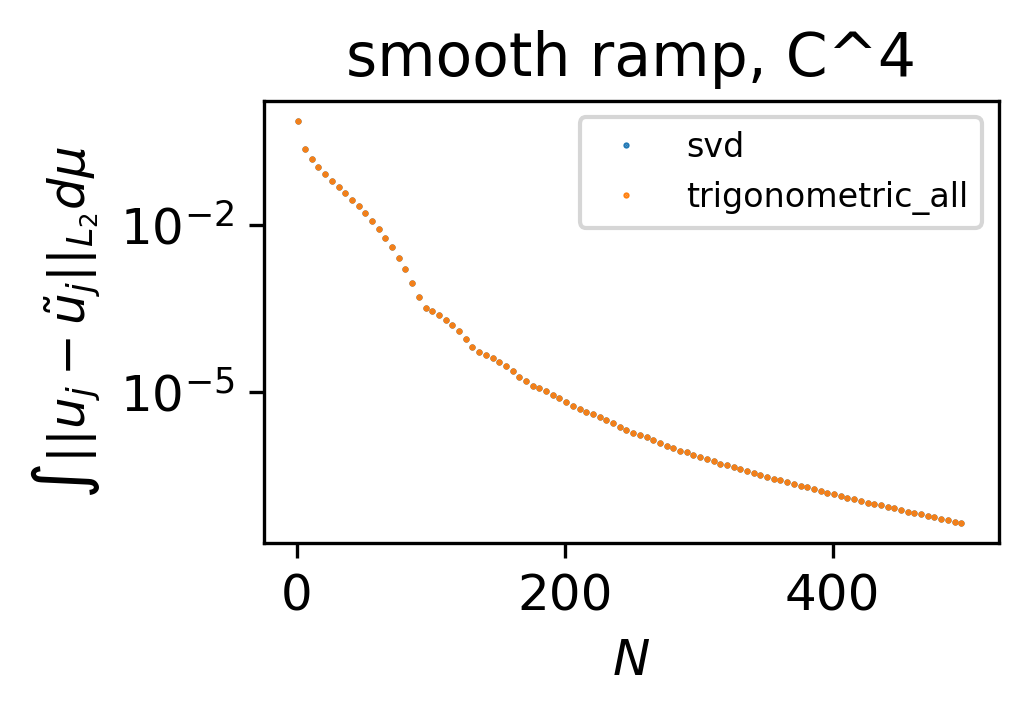

smooth ramp, C^5
mu_test =  0.5000500050005001
epsilon =  0.0559208586827702
cov =  [[5.89521541e-09]]
mu_test =  0.5000500050005001


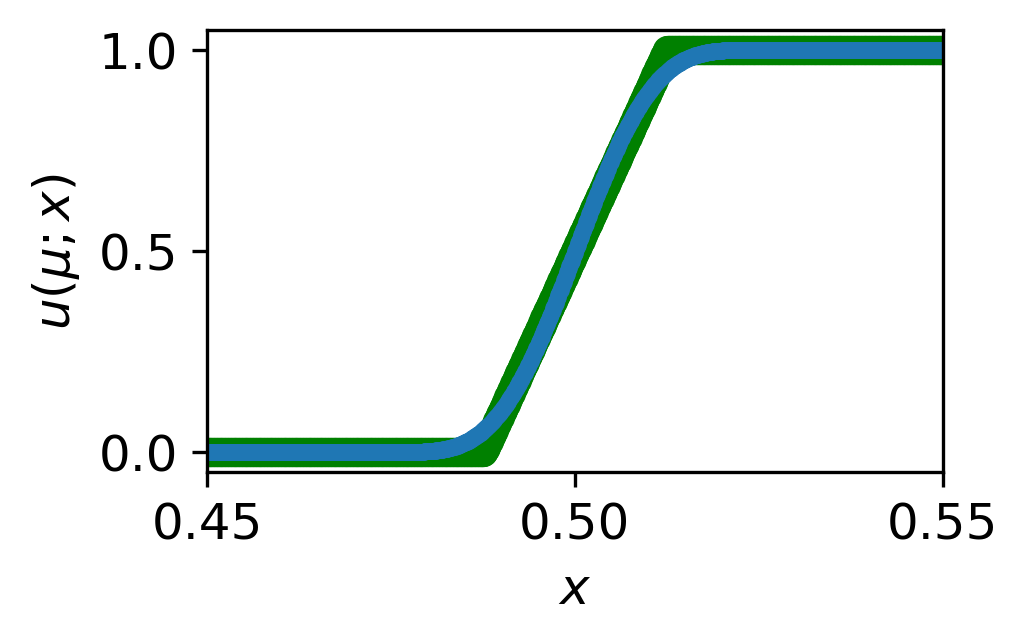

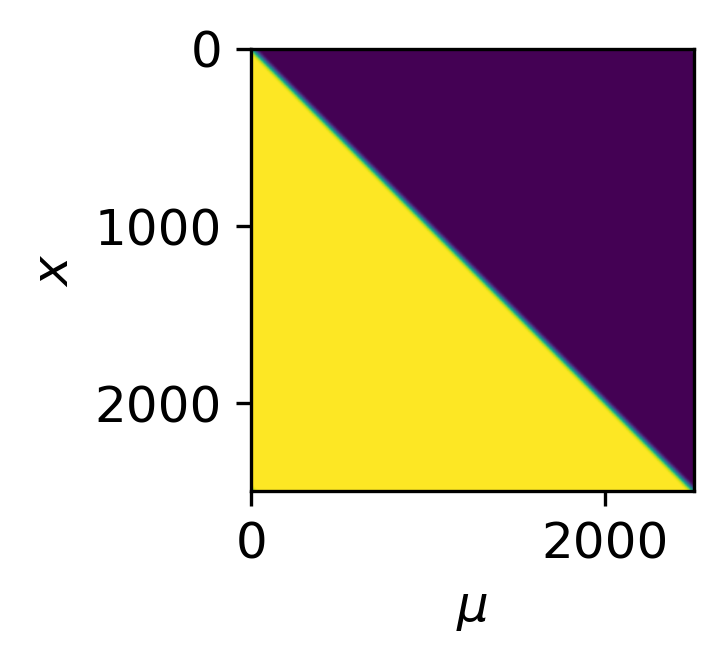

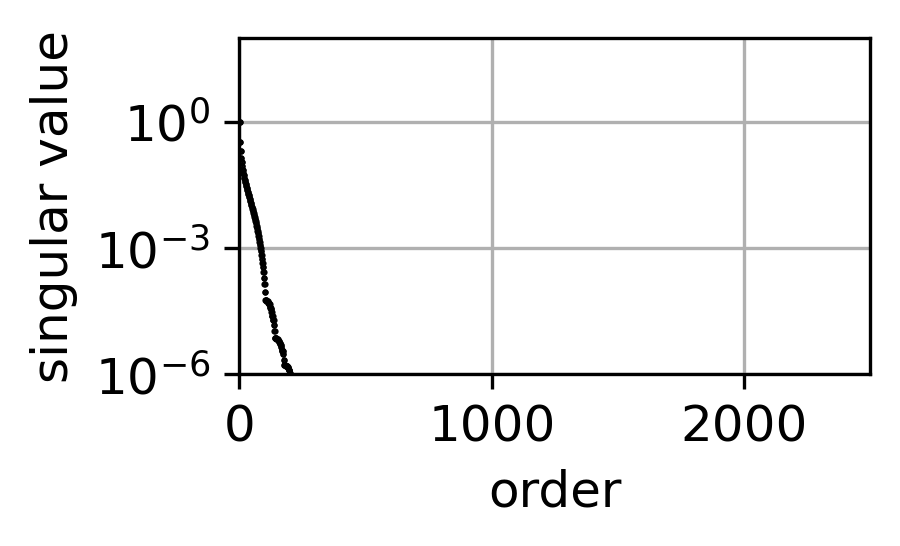

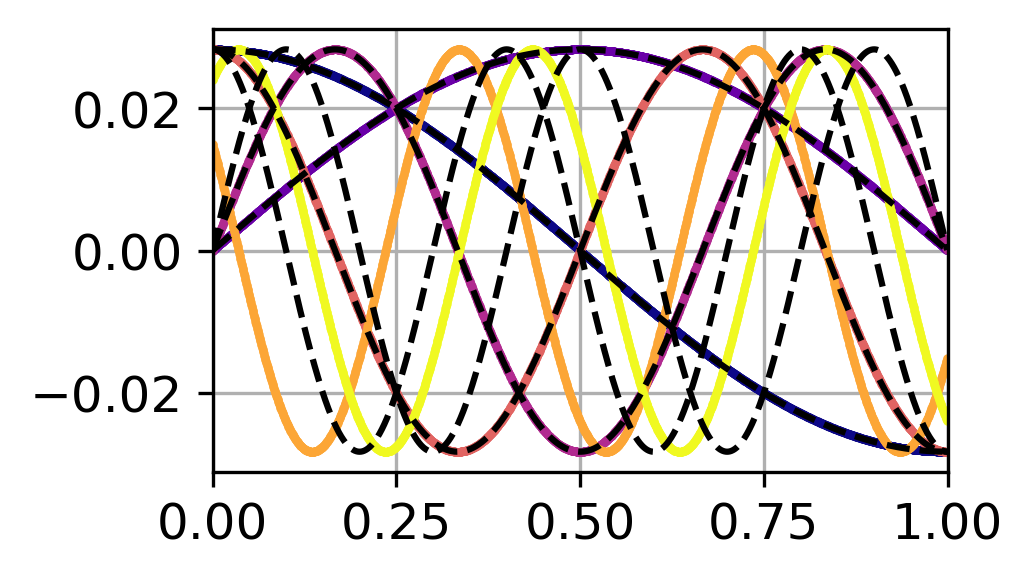

<ipython-input-6-92a58913ee10>:39: RuntimeWarning: divide by zero encountered in true_divide
  is_flipped = np.median(svd_basis.U/trig_basis_odd.U, axis=0) < 0


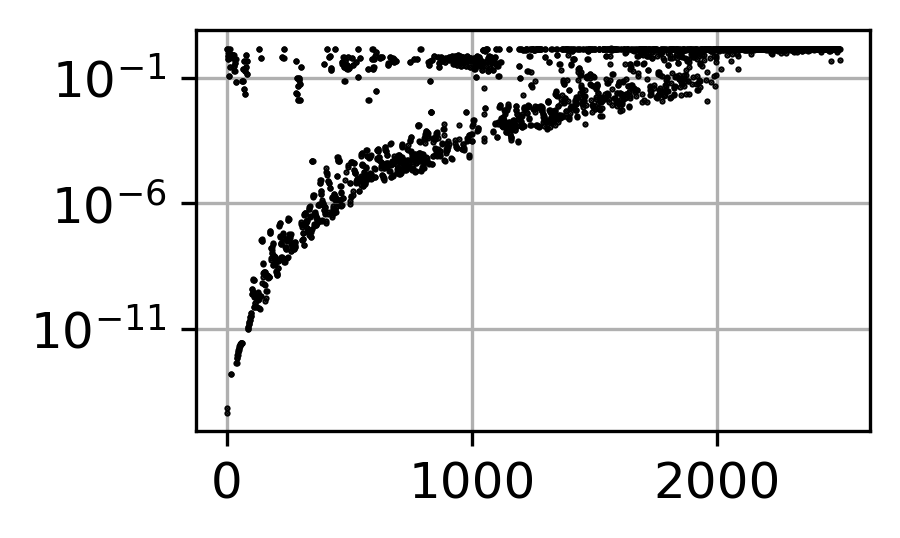

0 6 0.0
1 6 0.16666666666666666
2 6 0.3333333333333333
3 6 0.5
4 6 0.6666666666666666
5 6 0.8333333333333334


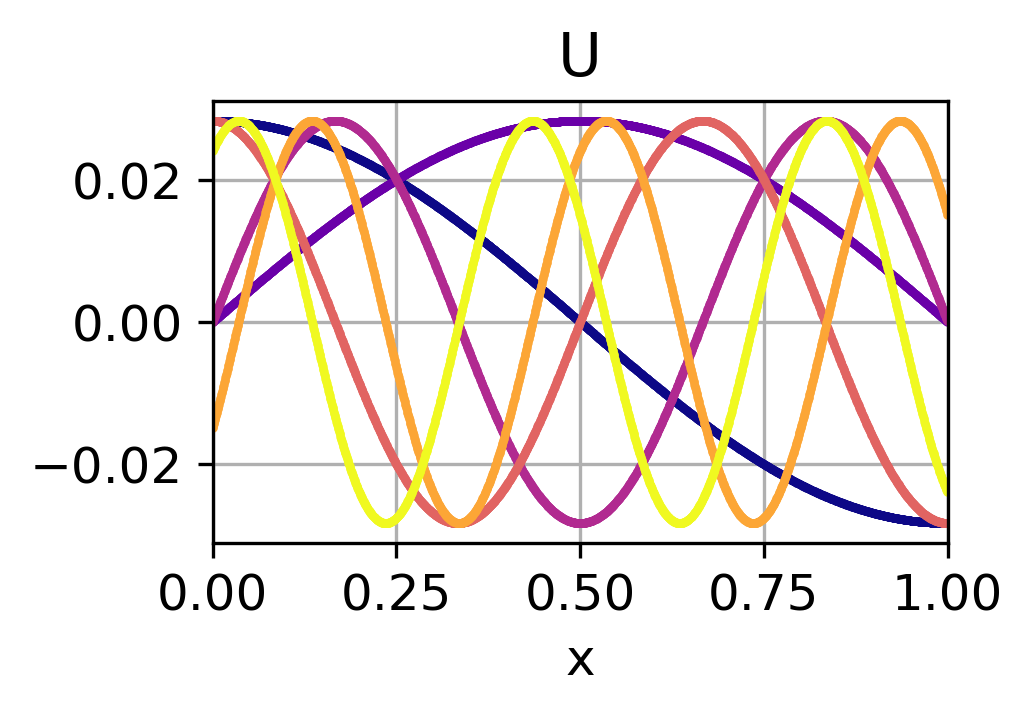

0 6 0.0
1 6 0.16666666666666666
2 6 0.3333333333333333
3 6 0.5
4 6 0.6666666666666666
5 6 0.8333333333333334


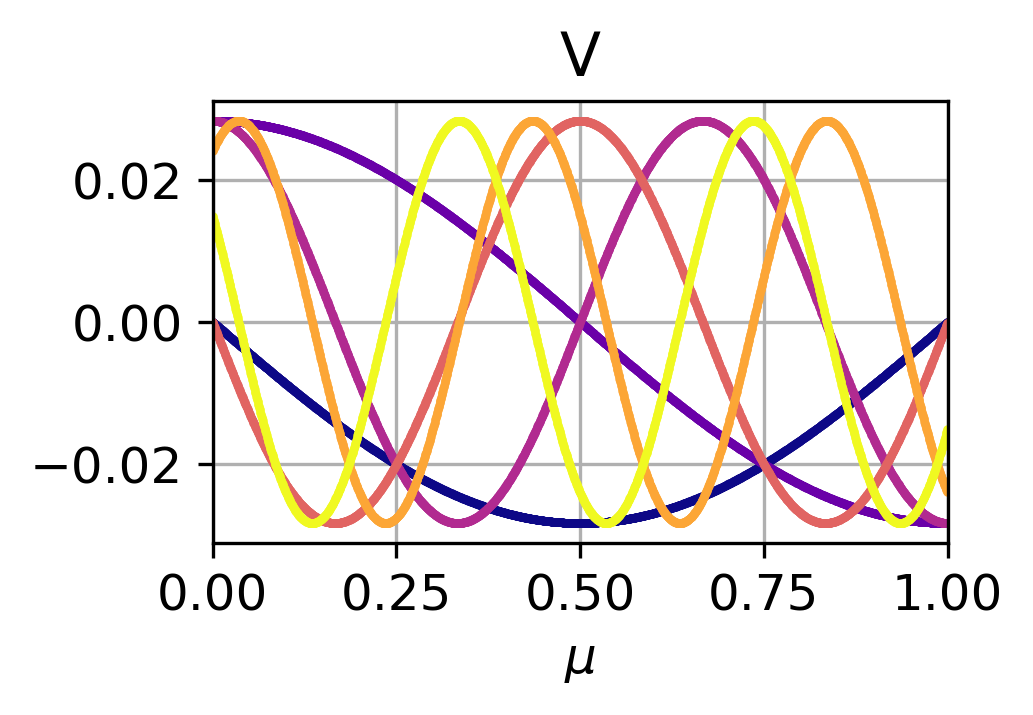

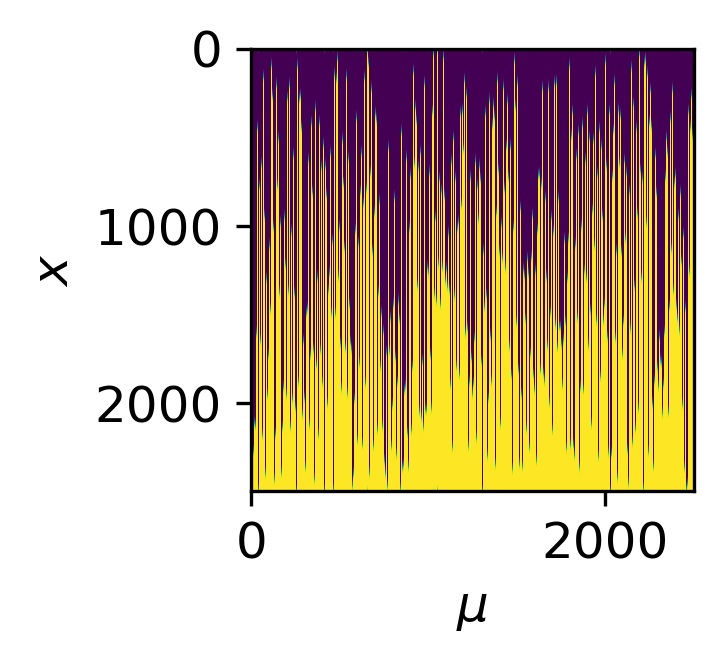

svd
calc_error: 2500 2500 500
1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321, 326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386, 391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451, 456, 461, 466, 471, 476, 481, 486, 491, 496, 
trigonometric_all
calc_error: 2500 2500 500
1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321, 326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386, 391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451, 456, 461, 466,

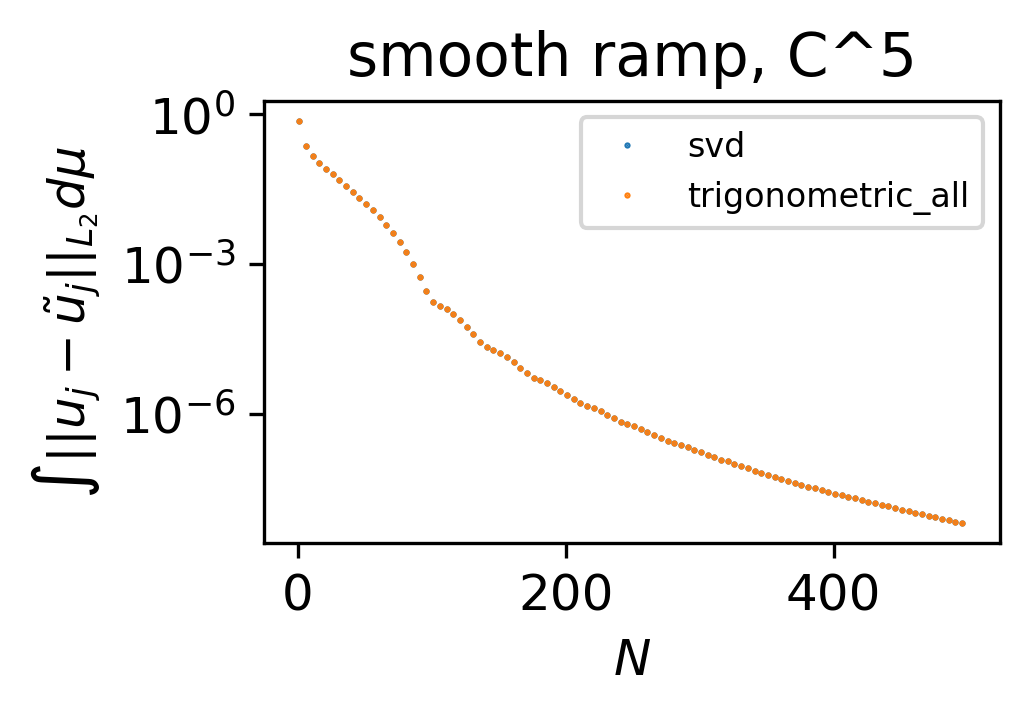

sigmoid (sin)
mu_test =  0.5000500050005001
epsilon =  0.009894761257087577
cov =  [[2.97712601e-10]]
mu_test =  0.5000500050005001


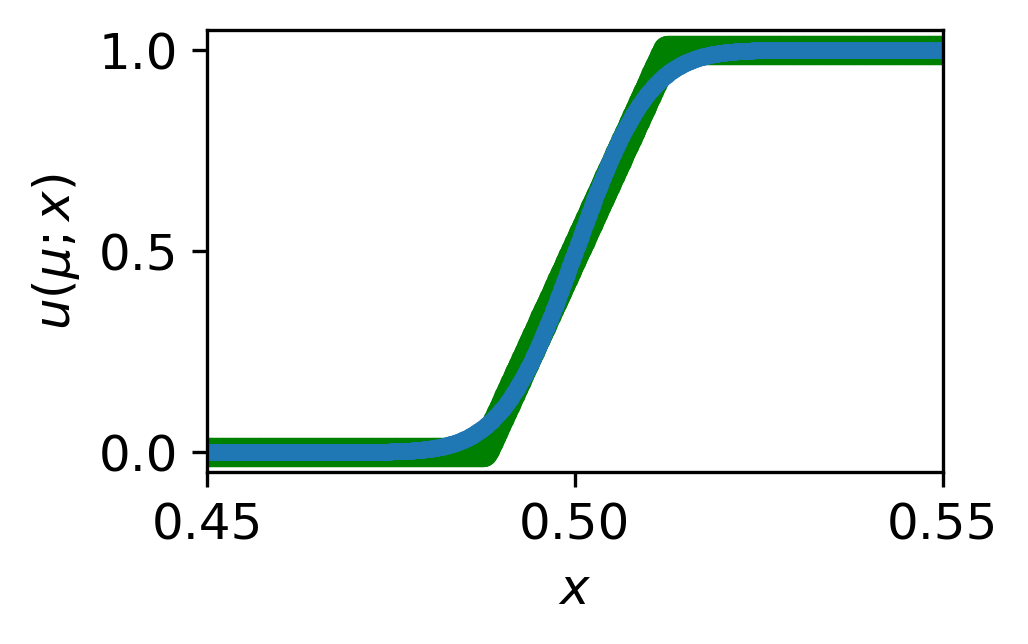

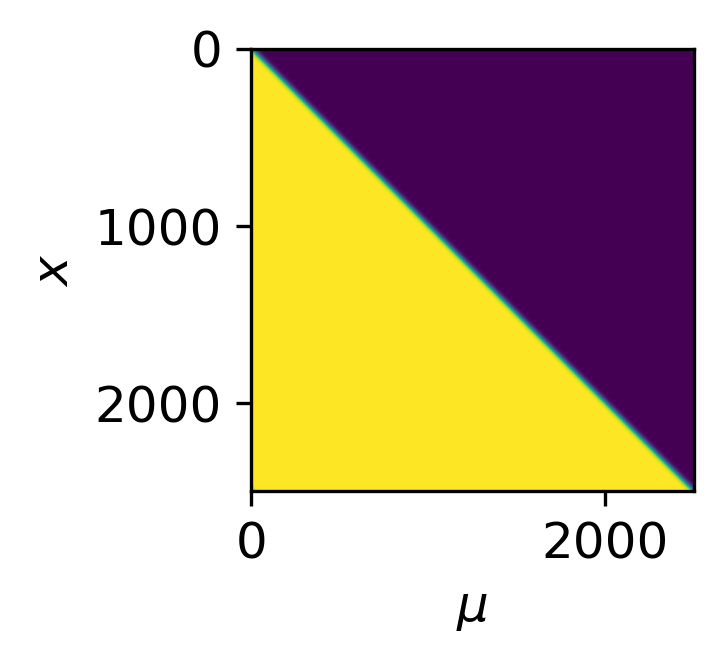

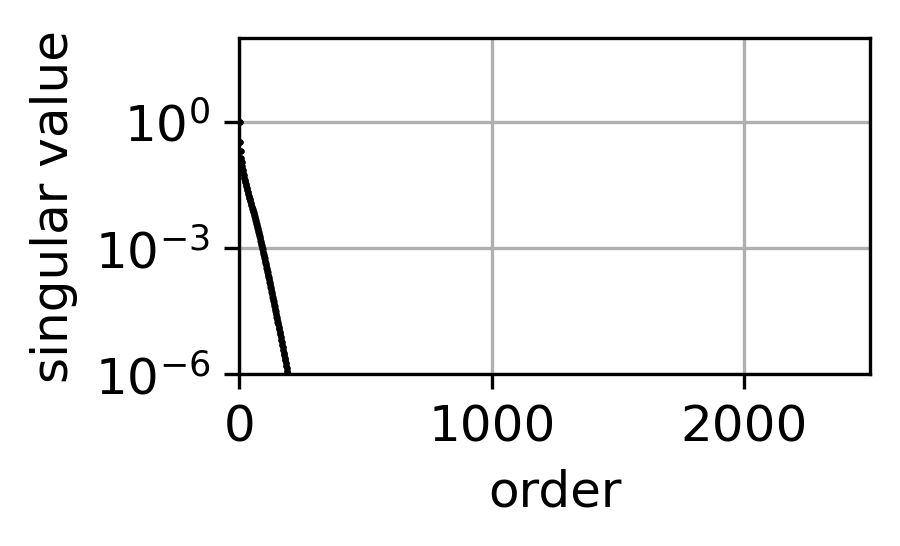

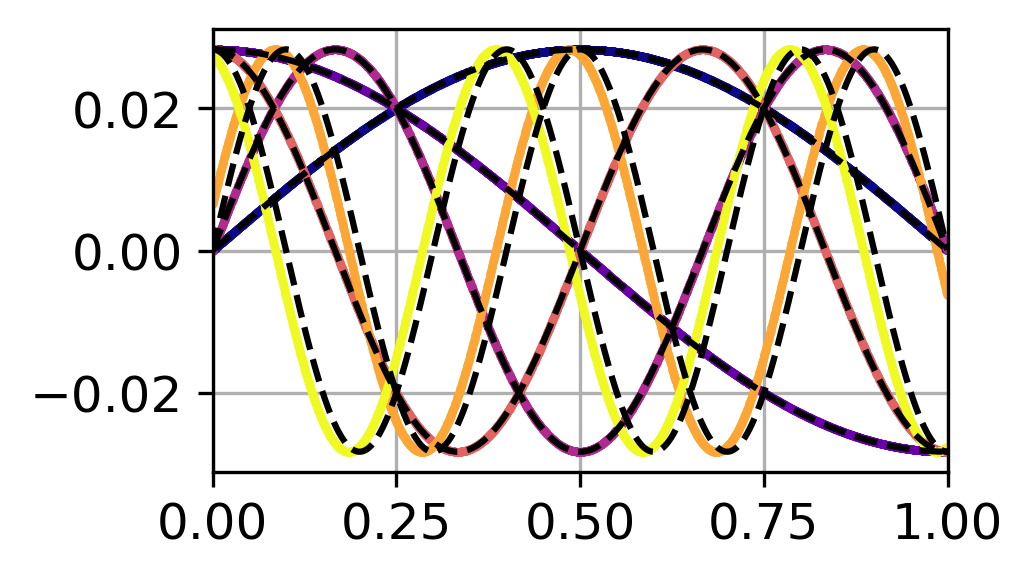

<ipython-input-6-92a58913ee10>:39: RuntimeWarning: divide by zero encountered in true_divide
  is_flipped = np.median(svd_basis.U/trig_basis_odd.U, axis=0) < 0
<ipython-input-6-92a58913ee10>:39: RuntimeWarning: invalid value encountered in true_divide
  is_flipped = np.median(svd_basis.U/trig_basis_odd.U, axis=0) < 0


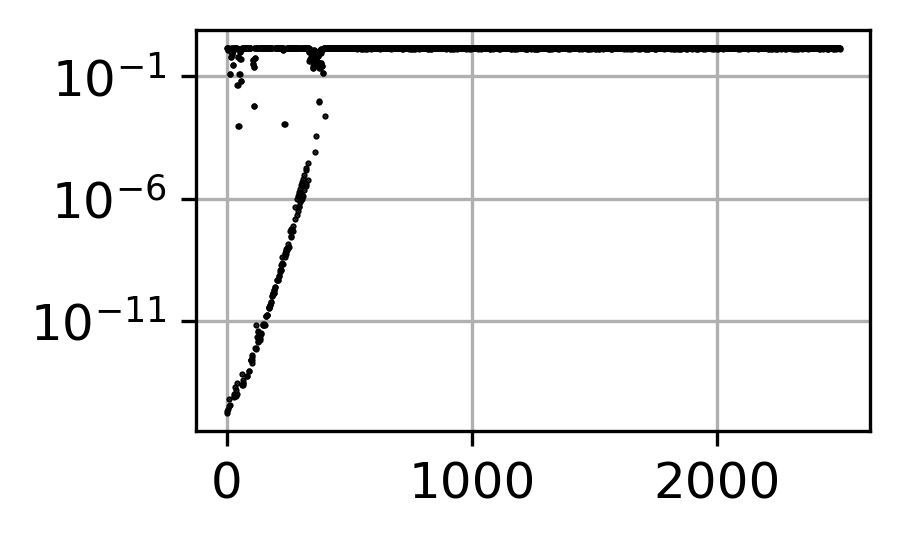

0 6 0.0
1 6 0.16666666666666666
2 6 0.3333333333333333
3 6 0.5
4 6 0.6666666666666666
5 6 0.8333333333333334


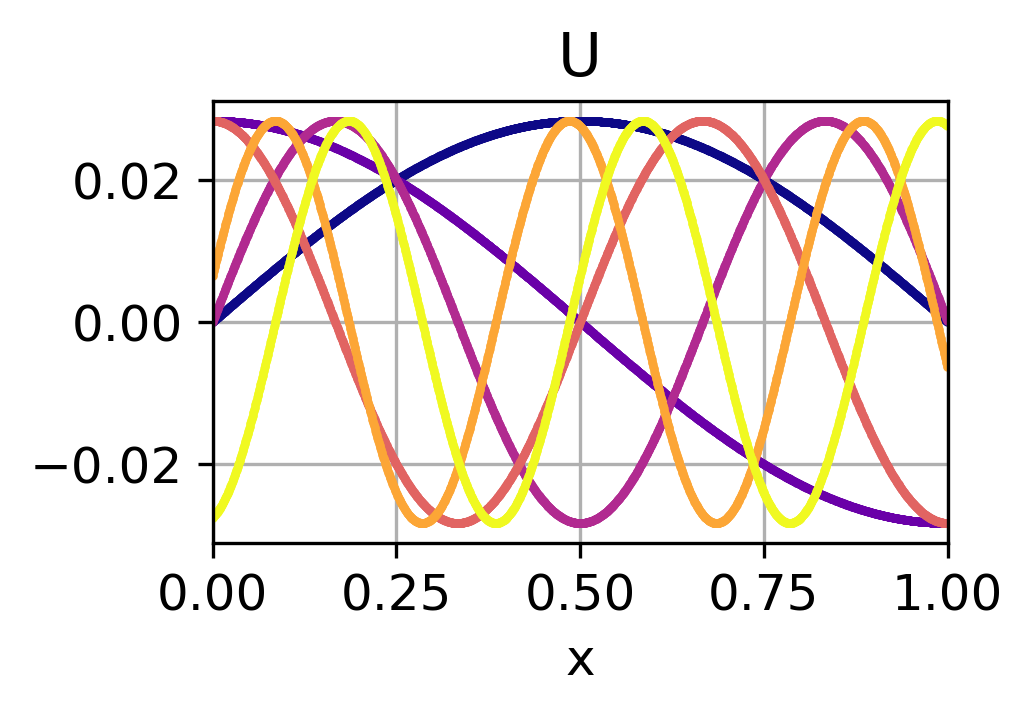

0 6 0.0
1 6 0.16666666666666666
2 6 0.3333333333333333
3 6 0.5
4 6 0.6666666666666666
5 6 0.8333333333333334


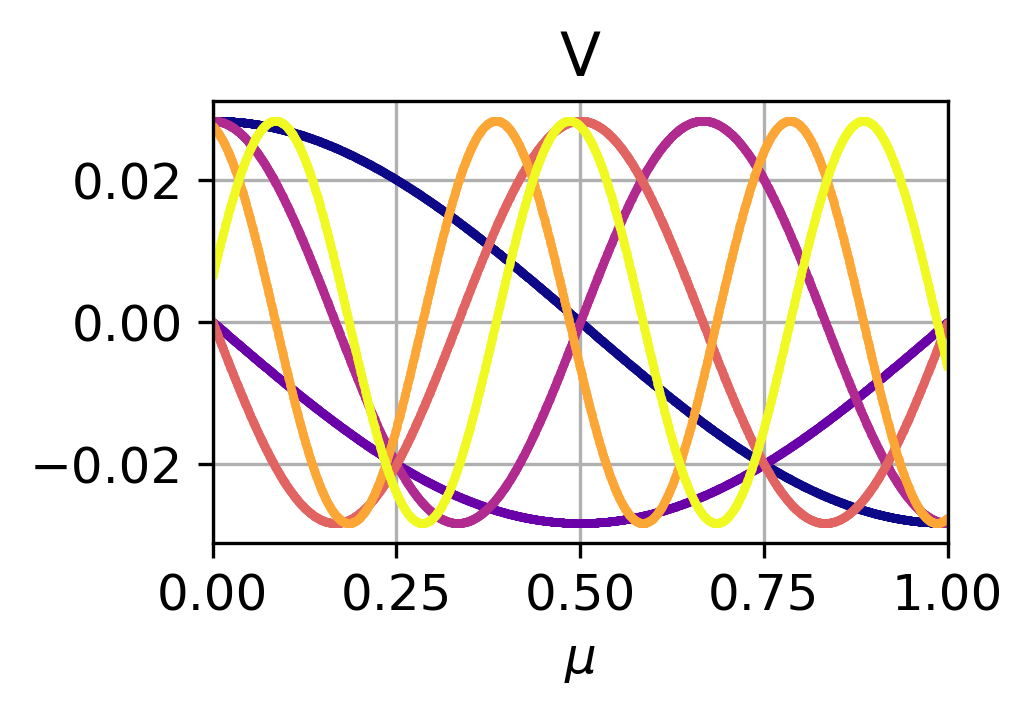

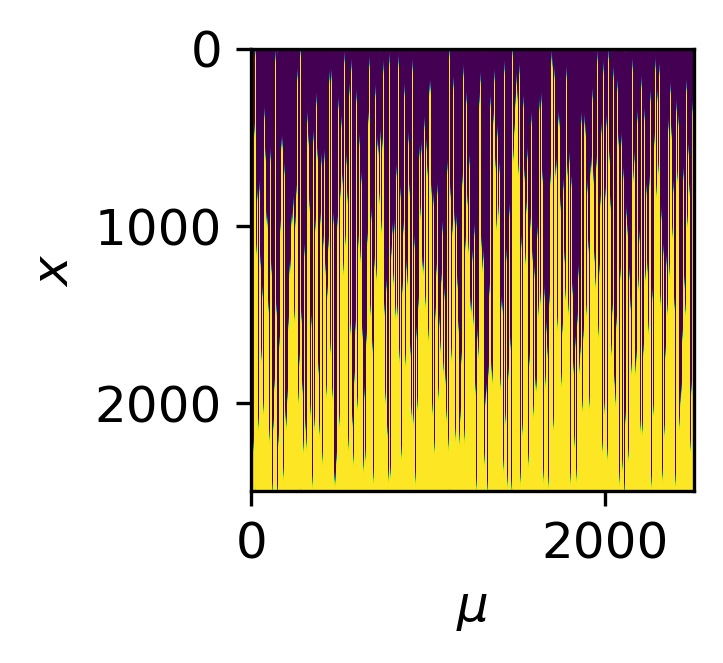

svd
calc_error: 2500 2500 500
1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321, 326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386, 391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451, 456, 461, 466, 471, 476, 481, 486, 491, 496, 
trigonometric_all
calc_error: 2500 2500 500
1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321, 326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386, 391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451, 456, 461, 466,

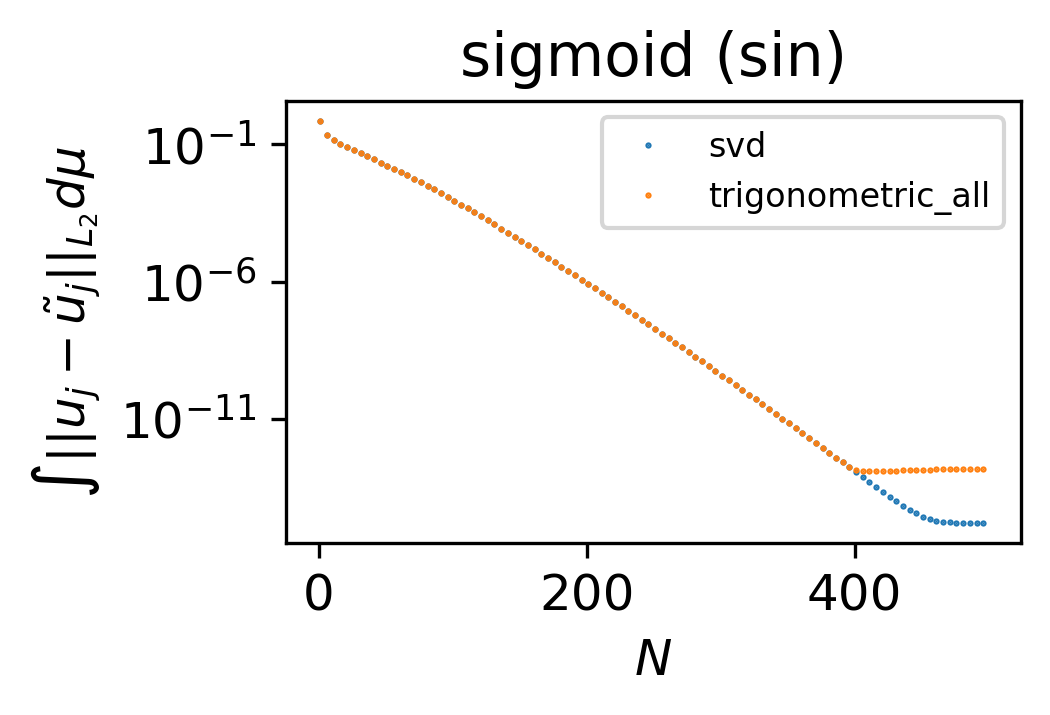

In [6]:
#initc = [u_hs, u_lr, u_sr, u_C1, u_C2, u_C3, u_C4, u_C5, u_sg]
#basis = [svd_basis, trig_basis, greedy_basis, lna_basis, lpf_basis]
# 9 ic
# 5 bv
# 4 errors
# r entries

results = np.zeros((6, 9, 4, r))
epsilon = 0.025
u_hs = Heaviside()
u_C0 = CkRamp(epsilon, 0)
u_C1 = CkRamp(epsilon, 1)
u_C2 = CkRamp(epsilon, 2)
u_C3 = CkRamp(epsilon, 3)
u_C4 = CkRamp(epsilon, 4)
u_C5 = CkRamp(epsilon, 5)
u_sg = Sigmoid(epsilon)

trig_basis_odd = TrigonometricOdd(x())
f_s = f_c = (2*np.arange(m//2)+1)/2  # i = np.arange(m//2)
frequencies = np.c_[f_s[:, None], f_c[:, None]].ravel()

tt = np.linspace(0, 1, 10000)
results_path = "C:/Users/florianma/Dropbox/Kol-N-width-Oslo-Ulm/n_widths_for_transport/results/hvo_"
initc = [u_C0, u_hs, u_C1, u_C2, u_C3, u_C4, u_C5, u_sg]
for j, u_k in enumerate(initc):  # 9
    print(u_k.name)
    u_k.fit_to(u_C0, tt)
    X = u_k.half_wave_odd(x(), mu())

    svd_basis = SVD(X)
    
    c = trig_basis_odd.U.T @ X
    c_n = (c**2).sum(axis=1)
    order = np.argsort(-c_n)
    trig_basis_odd.U = trig_basis_odd.U[:, order]
    frequencies = frequencies[order]
    fig, ax = plt.subplots()
    ax.plot(frequencies, "b.", ms=1)
    plt.show()

    plot_paramspace(X)
    plot_singular_values(svd_basis.S)
    plot_and_compare_modes(x(), svd_basis.U, trig_basis_odd.U)

    is_flipped = np.median(svd_basis.U/trig_basis_odd.U, axis=0) < 0
    svd_basis.U[:, is_flipped] *= -1
    svd_basis.VT[is_flipped, :] *= -1

    errrrr = ((svd_basis.U-trig_basis_odd.U)**2).sum(axis=0)**.5
    fig, ax1 = plt.subplots()
    ax1.plot(errrrr, "k.", ms=1)
    ax1.set_yscale('log')
    ax1.grid(which="both")
    plt.tight_layout()
    plt.show()
    
    plot_modes(x(), svd_basis.U, r=6)
    plt.xlabel("x")
    plt.title("U")
    plt.show()
    plot_modes(mu(), svd_basis.VT.T, r=6)
    plt.xlabel("$\mu$")
    plt.title("V")
    plt.show()

    #mu_test = Domain([mu.min, mu.max], n*2)()
    mu_test = np.random.rand(n,)
    X_test = u_k.half_wave_odd(x(), mu_test)
    #X_test = X

    plot_paramspace(X_test)

    basis_all = [svd_basis, trig_basis_odd]
    for i, basis in enumerate(basis_all):  # 6
        print(basis.name)
        delta_n, d_n = basis.calc_error(X_test, r)
        results[i, j, 0, :] = delta_n
        results[i, j, 1, :] = d_n
        #np.save(results_path+"_delta_n_"+basis.name+"_"+u_k.name+".npy", delta_n)
        #np.save(results_path+"_d_n_"+basis.name+"_"+u_k.name+".npy", d_n)
    
    fig, ax = plt.subplots()
    for i, bv in enumerate(basis_all):
        ax.plot(results[i][j][0], ".", ms=1, label=bv.name)
    ax.set_yscale('log')
    plt.title(u_k.name)
    plt.legend(prop={'size': 8})
    plt.xlabel(r'$N$')
    plt.ylabel(r'$\int || u_j - \tilde{u}_j ||_{L_2} d\mu$')
    plt.show()


mu_test =  0.5
mu_test =  0.5
mu_test =  0.5
mu_test =  0.5
mu_test =  0.5
mu_test =  0.5
mu_test =  0.5
mu_test =  0.5


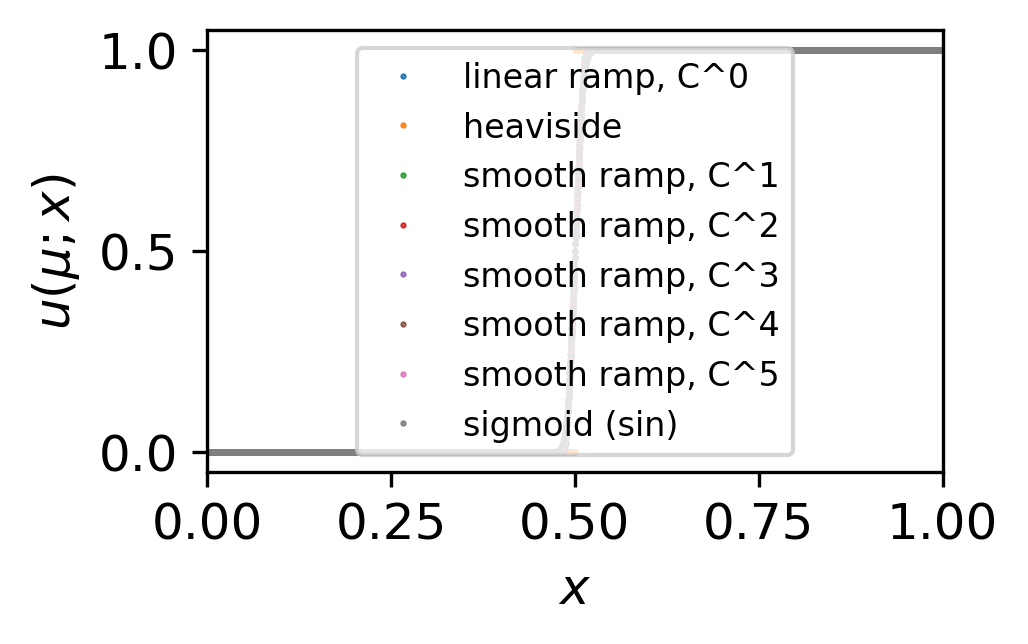

mu_test =  0.5
mu_test =  0.5
mu_test =  0.5
mu_test =  0.5
mu_test =  0.5
mu_test =  0.5
mu_test =  0.5
mu_test =  0.5


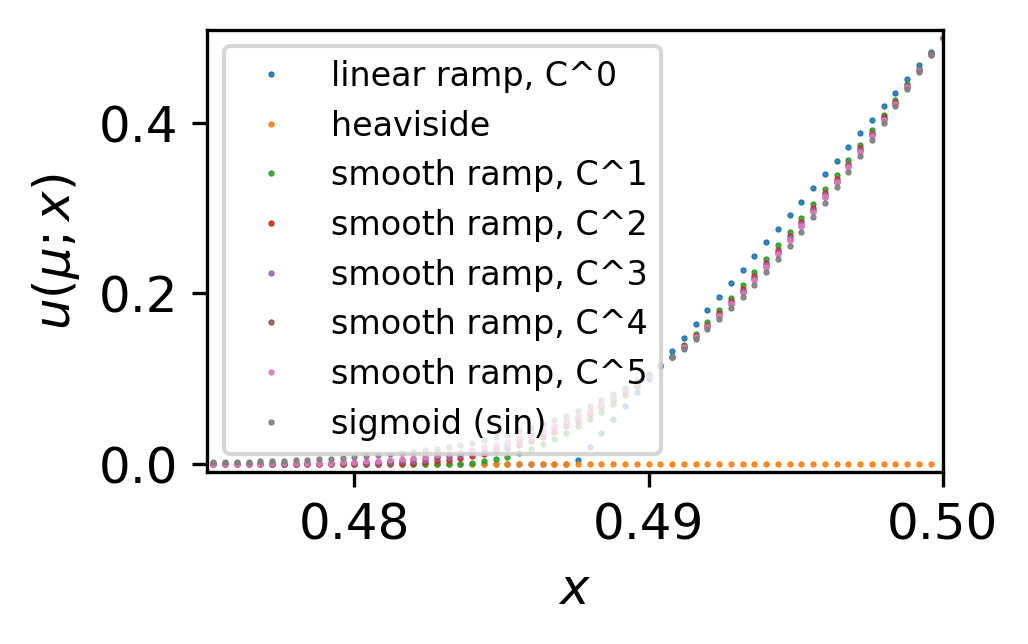

In [7]:
fig, ax = plt.subplots()
for i, ic in enumerate(initc):
    ic.plot(x(), ax=ax, ms=1, label=ic.name)
plt.xlim(0, 1)
plt.legend(prop={'size': 8})
plt.show()


fig, ax = plt.subplots()
for i, ic in enumerate(initc):
    ic.plot(x(), ax=ax, ms=1, label=ic.name)
plt.xlim(.475, .5)
plt.ylim(-.01, .51)
plt.legend(prop={'size': 8})
plt.show()

linear ramp, C^0
$linear ramp, C^0$
$\int_E_n(u(\mu;x)) d\mu$


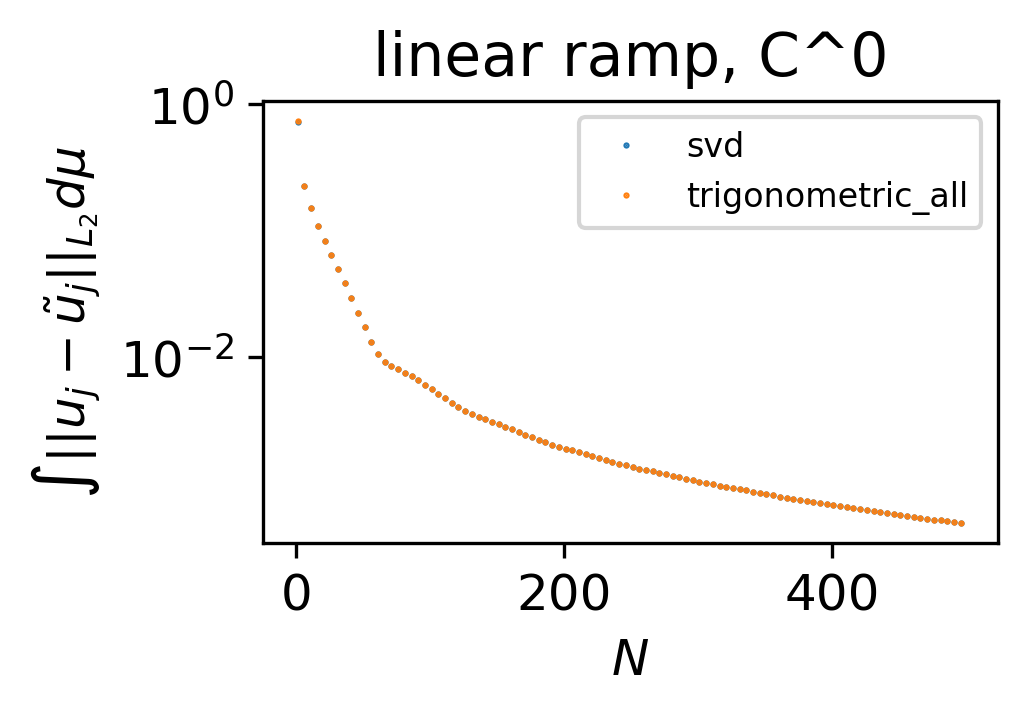

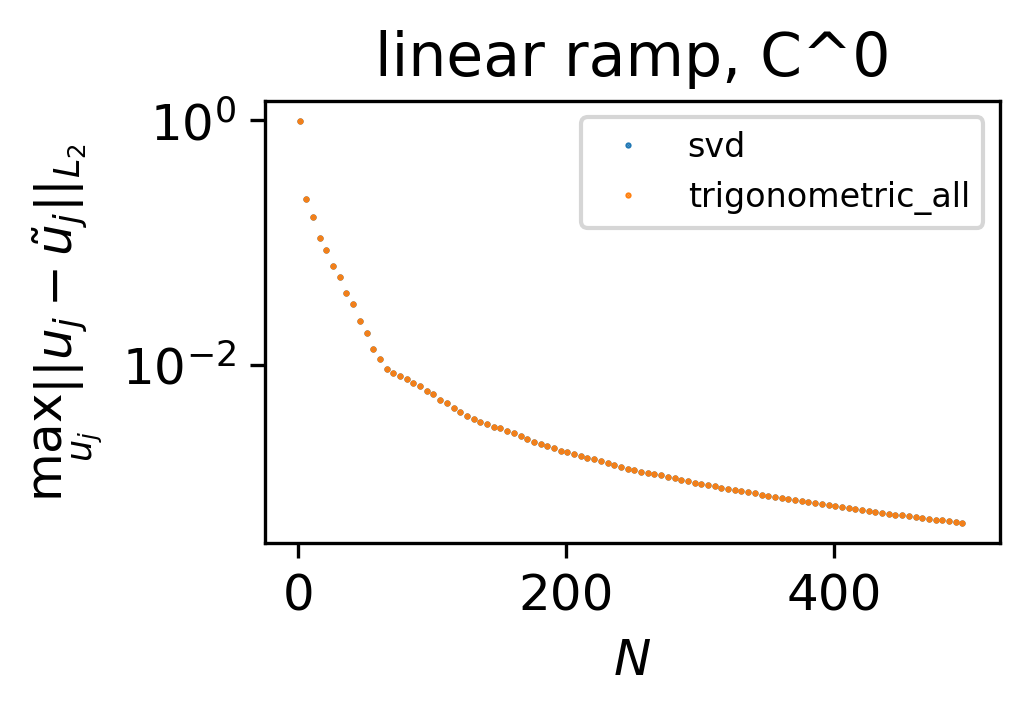

heaviside
$heaviside$
$\int_E_n(u(\mu;x)) d\mu$


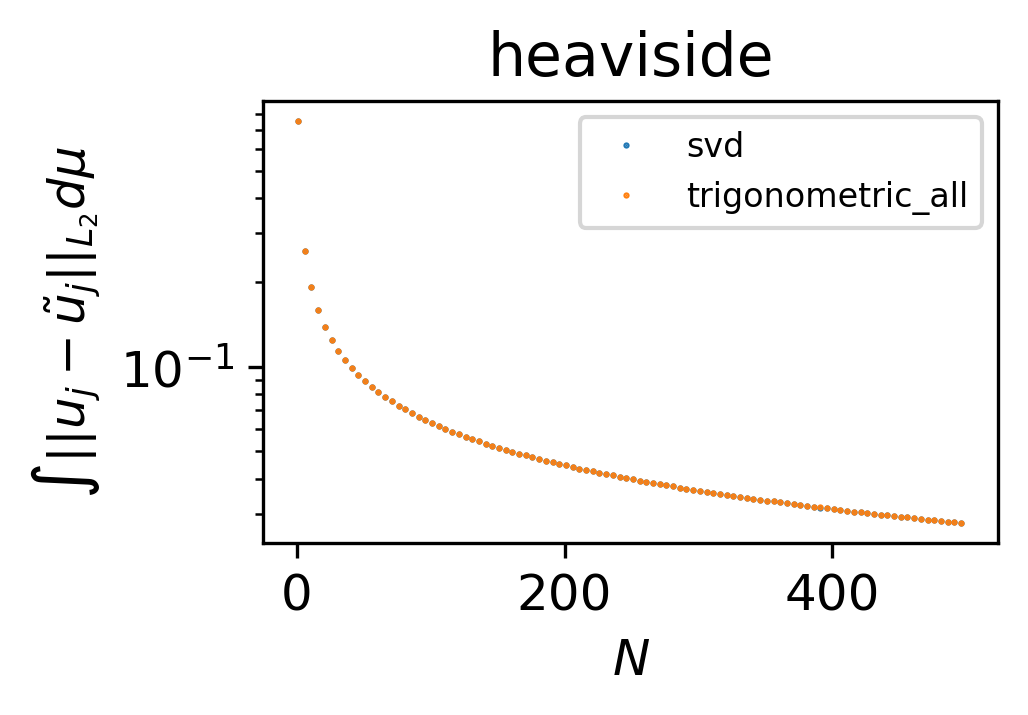

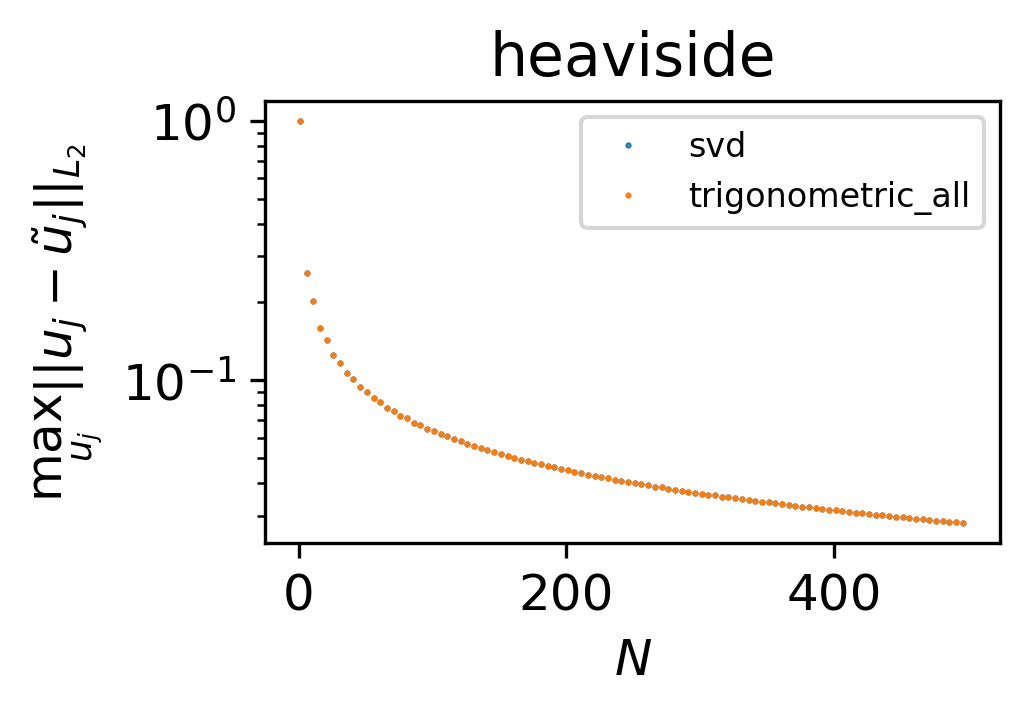

smooth ramp, C^1
$smooth ramp, C^1$
$\int_E_n(u(\mu;x)) d\mu$


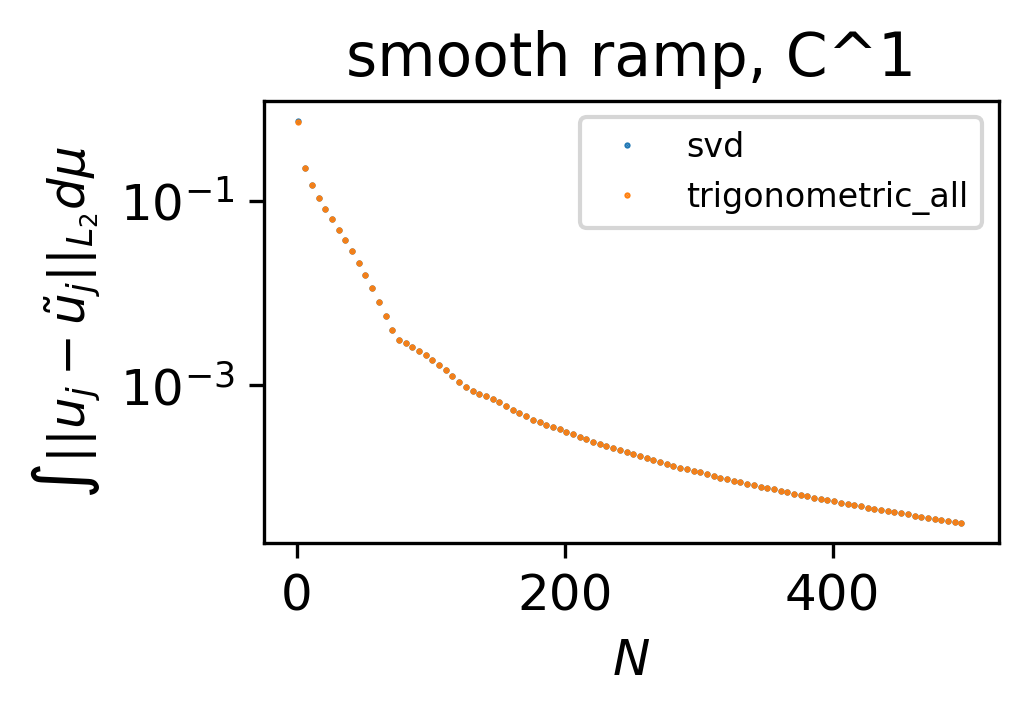

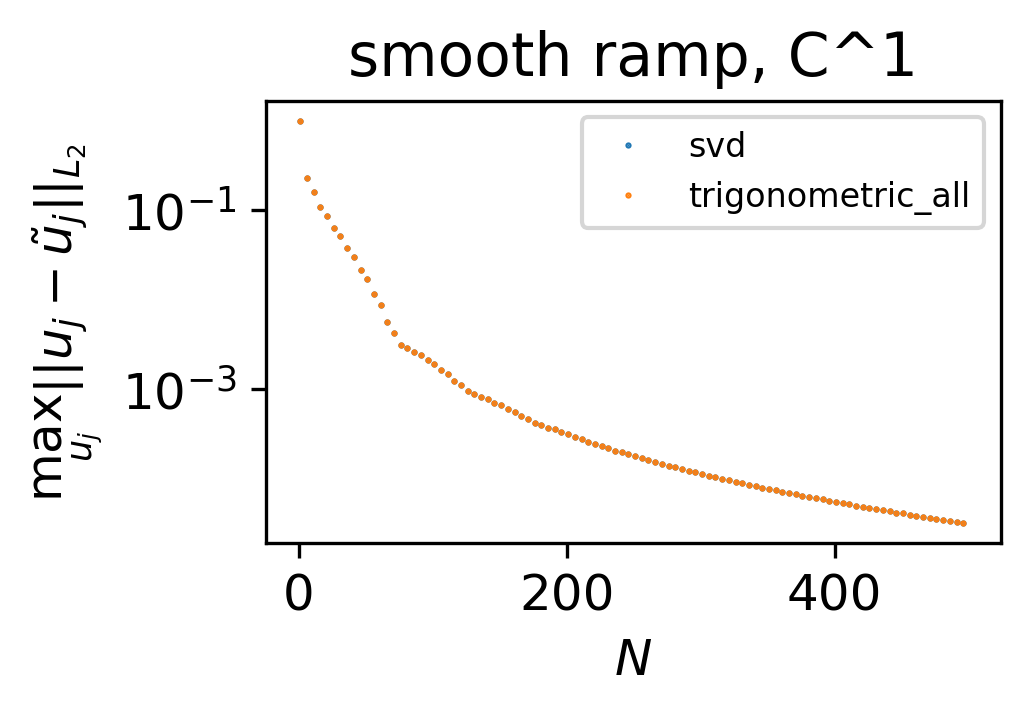

smooth ramp, C^2
$smooth ramp, C^2$
$\int_E_n(u(\mu;x)) d\mu$


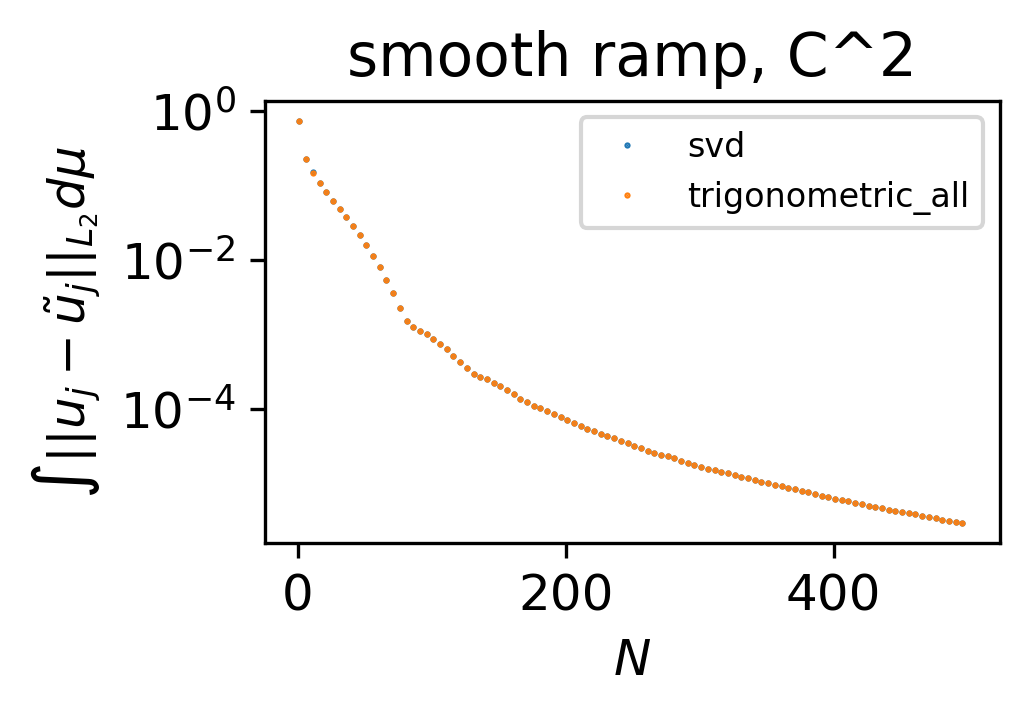

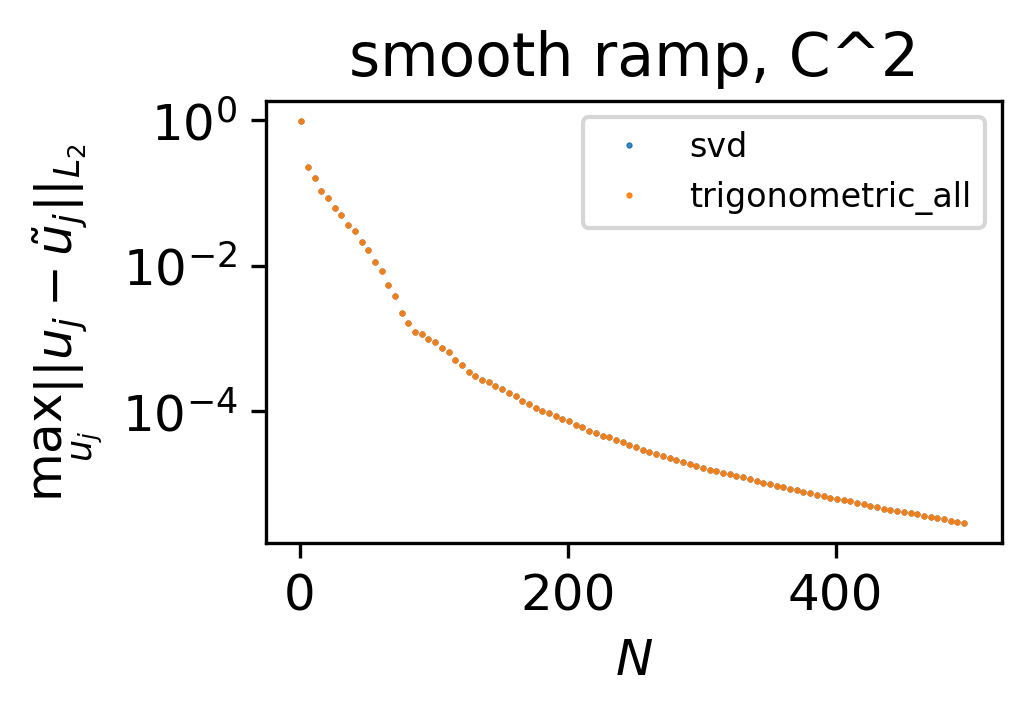

smooth ramp, C^3
$smooth ramp, C^3$
$\int_E_n(u(\mu;x)) d\mu$


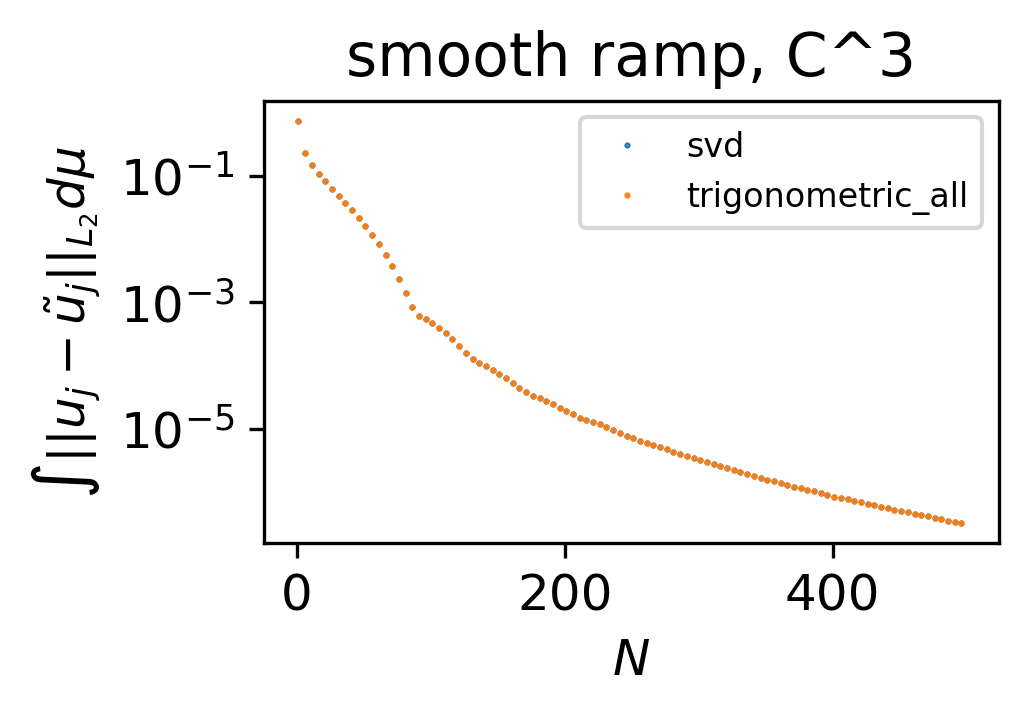

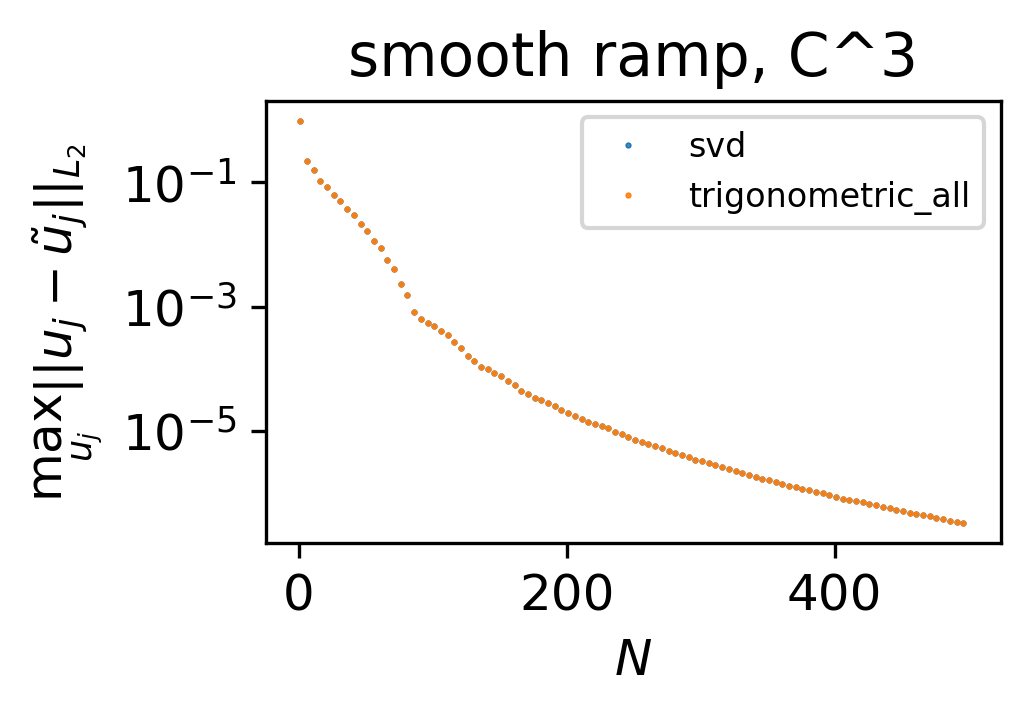

smooth ramp, C^4
$smooth ramp, C^4$
$\int_E_n(u(\mu;x)) d\mu$


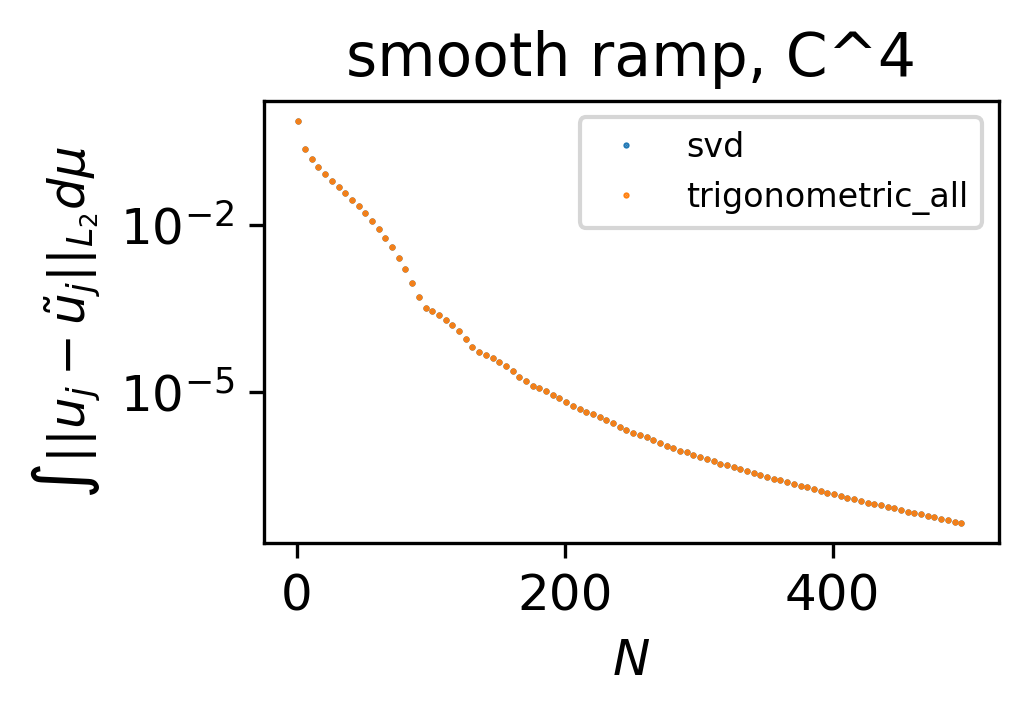

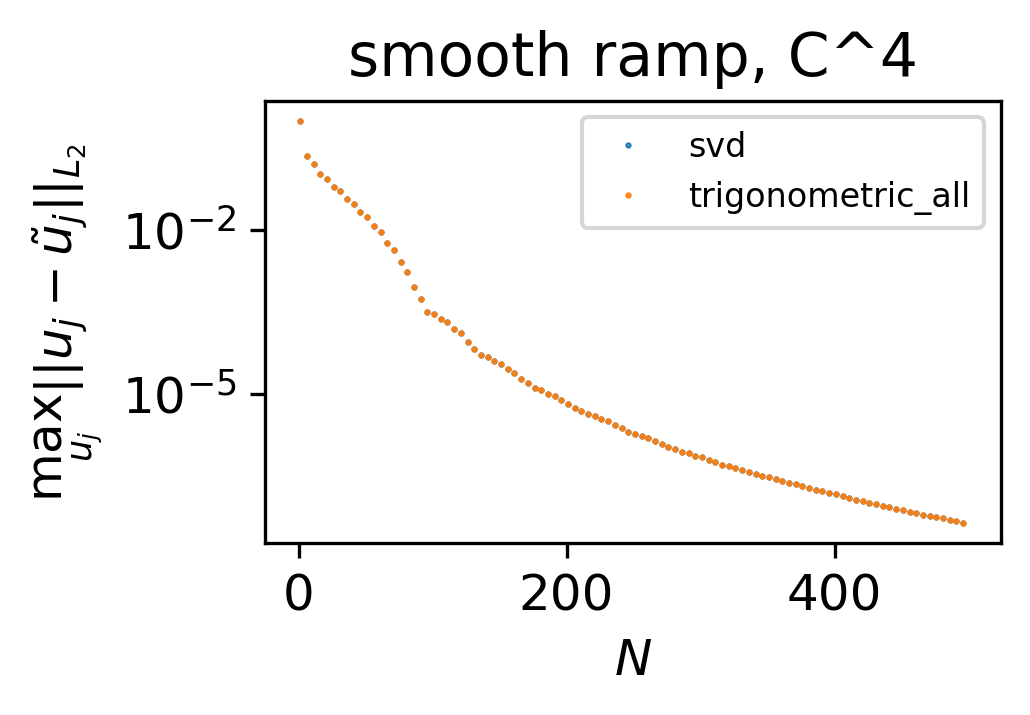

smooth ramp, C^5
$smooth ramp, C^5$
$\int_E_n(u(\mu;x)) d\mu$


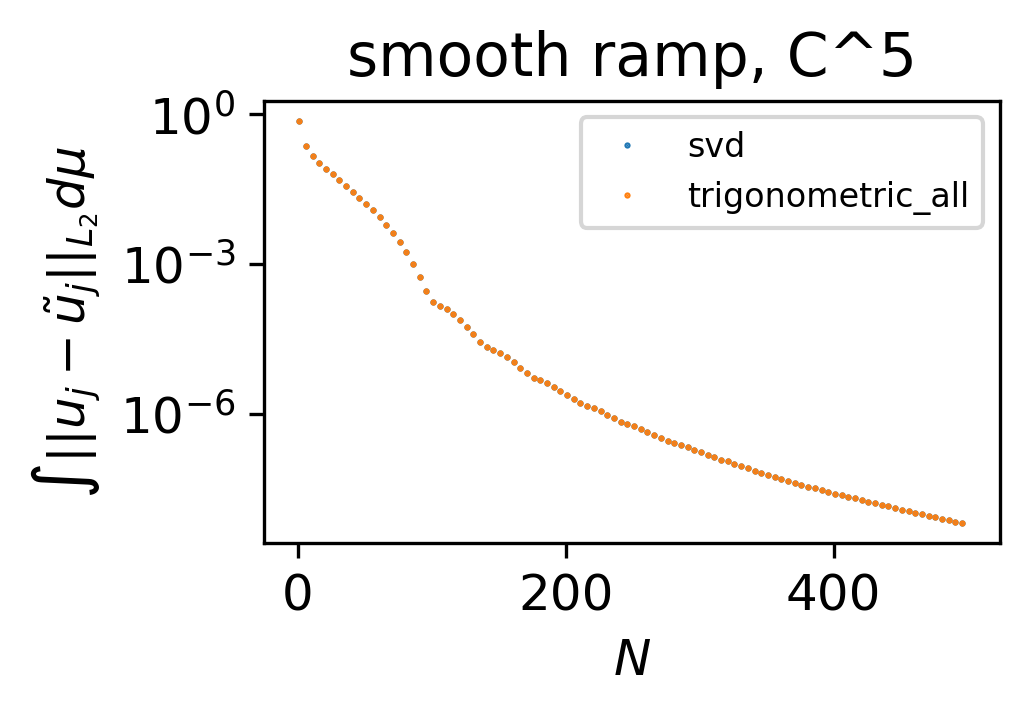

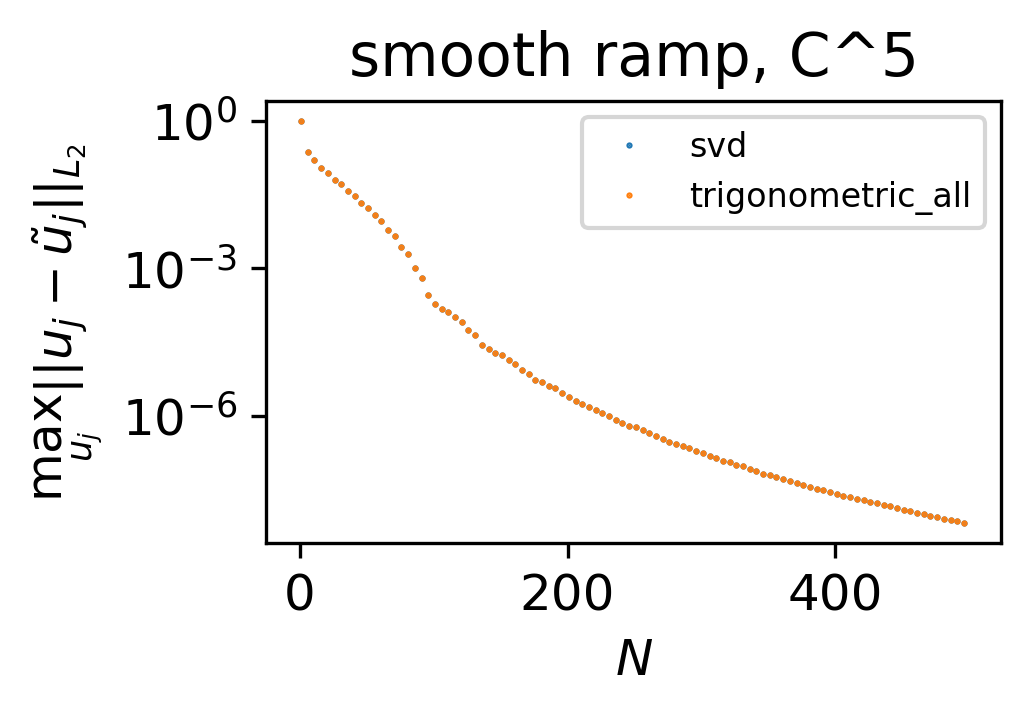

sigmoid (sin)
$sigmoid (sin)$
$\int_E_n(u(\mu;x)) d\mu$


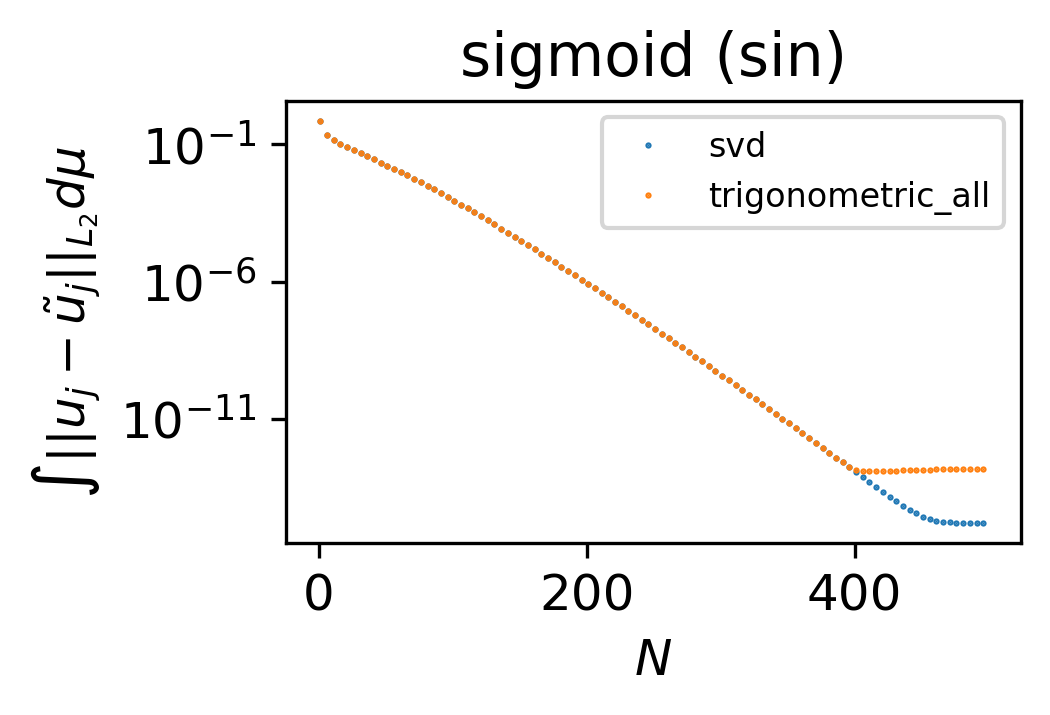

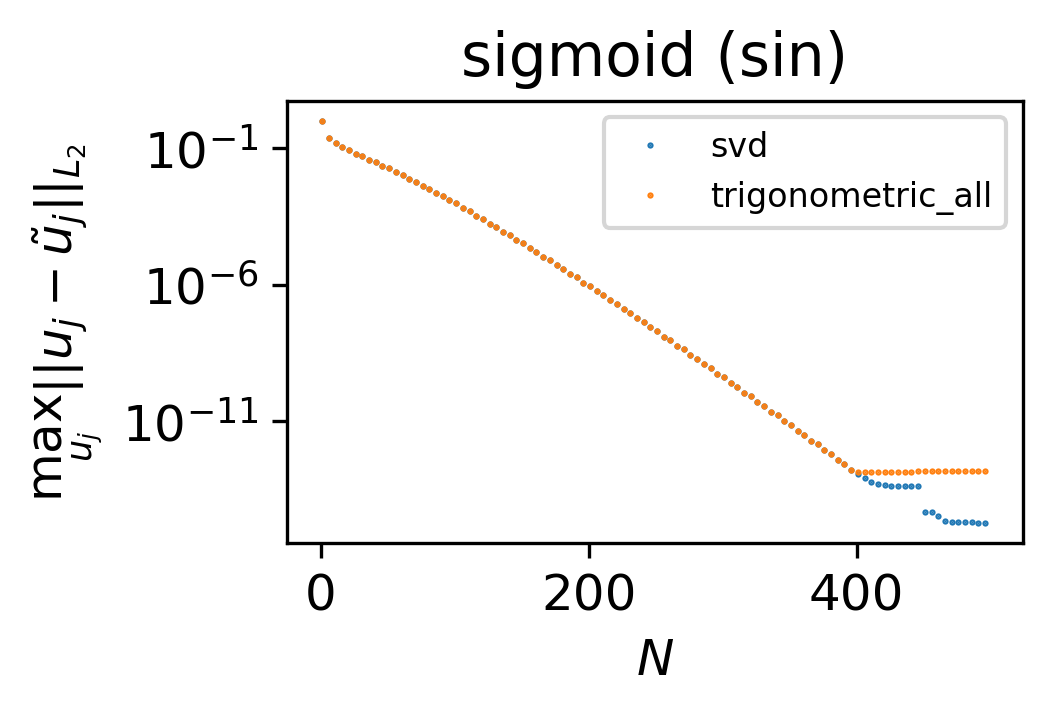

In [8]:
for j, ic in enumerate(initc):
    print(ic.name)
    print(r'$'+ic.name+'$')
    print(r'$\int_E_n(u(\mu;x)) d\mu$')
    
    fig, ax = plt.subplots()
    for i, bv in enumerate(basis_all):
        ax.plot(results[i][j][0], ".", ms=1, label=bv.name)
    ax.set_yscale('log')
    plt.title(ic.name)
    plt.legend(prop={'size': 8})
    plt.xlabel(r'$N$')
    plt.ylabel(r'$\int || u_j - \tilde{u}_j ||_{L_2} d\mu$')
    plt.show()
    
    fig, ax = plt.subplots()
    for i, bv in enumerate(basis_all):
        ax.plot(results[i][j][1], ".", ms=1, label=bv.name)
    ax.set_yscale('log')
    plt.title(ic.name)
    plt.legend(prop={'size': 8})
    plt.xlabel(r'$N$')
    plt.ylabel(r'$\max_{u_j} || u_j - \tilde{u}_j ||_{L_2} $')
    plt.show()
    

svd


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


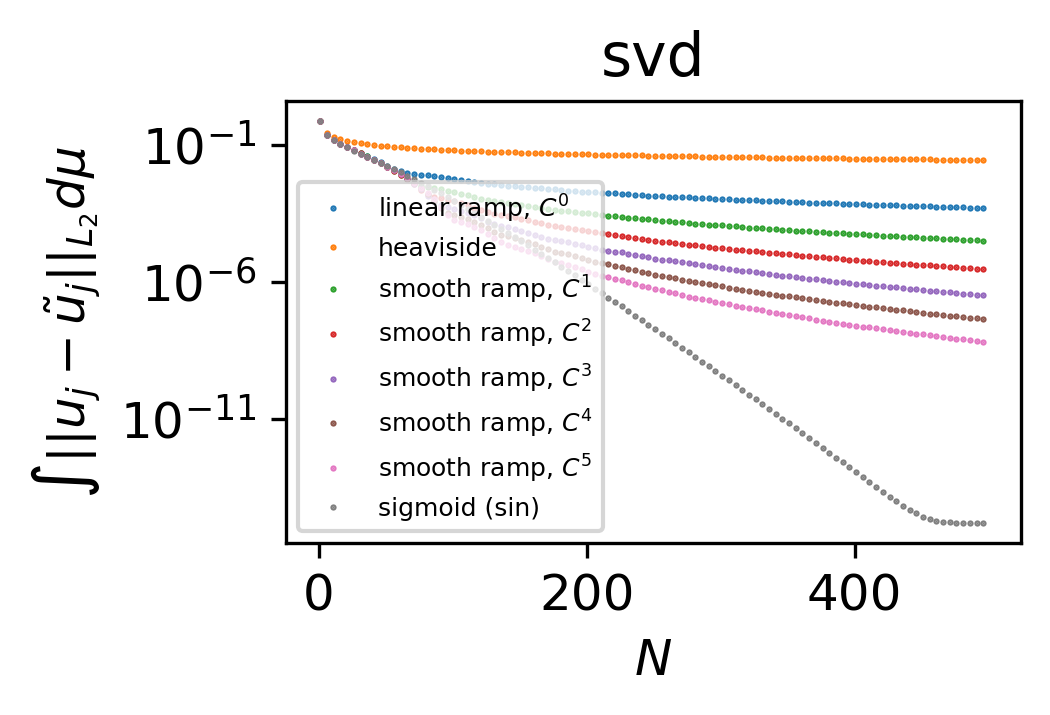

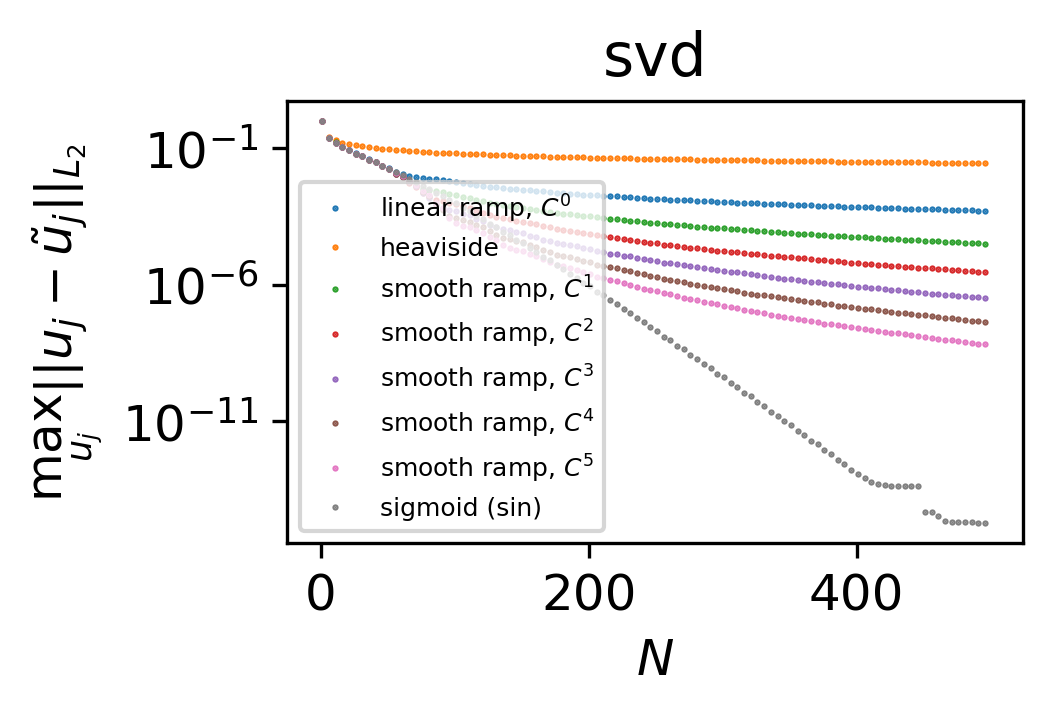

trigonometric_all


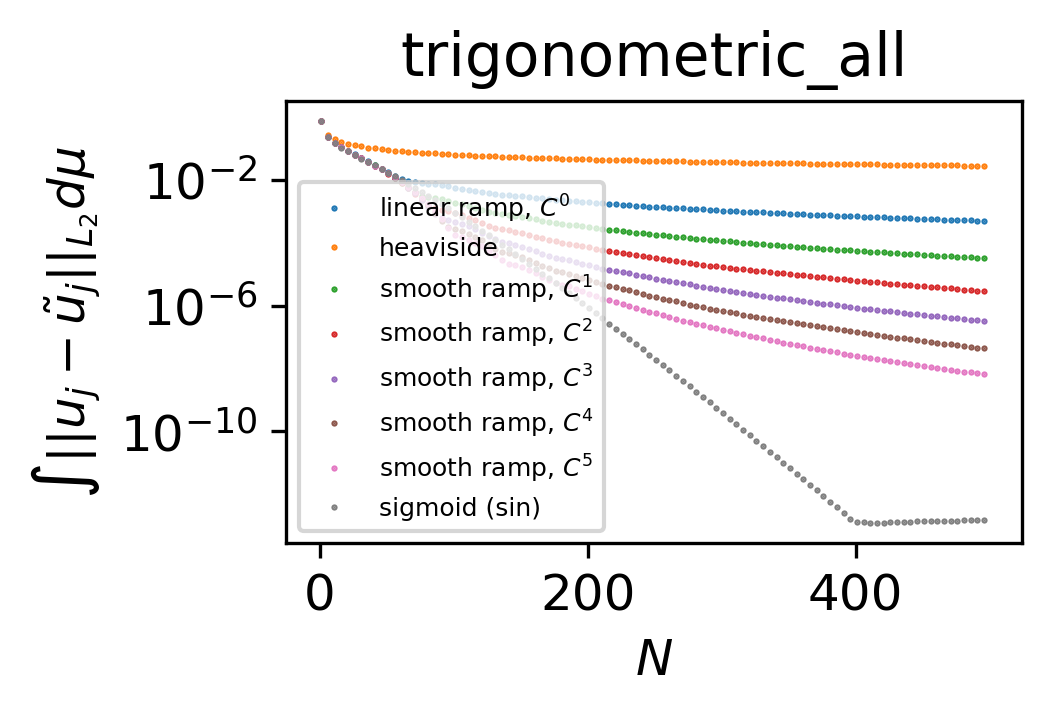

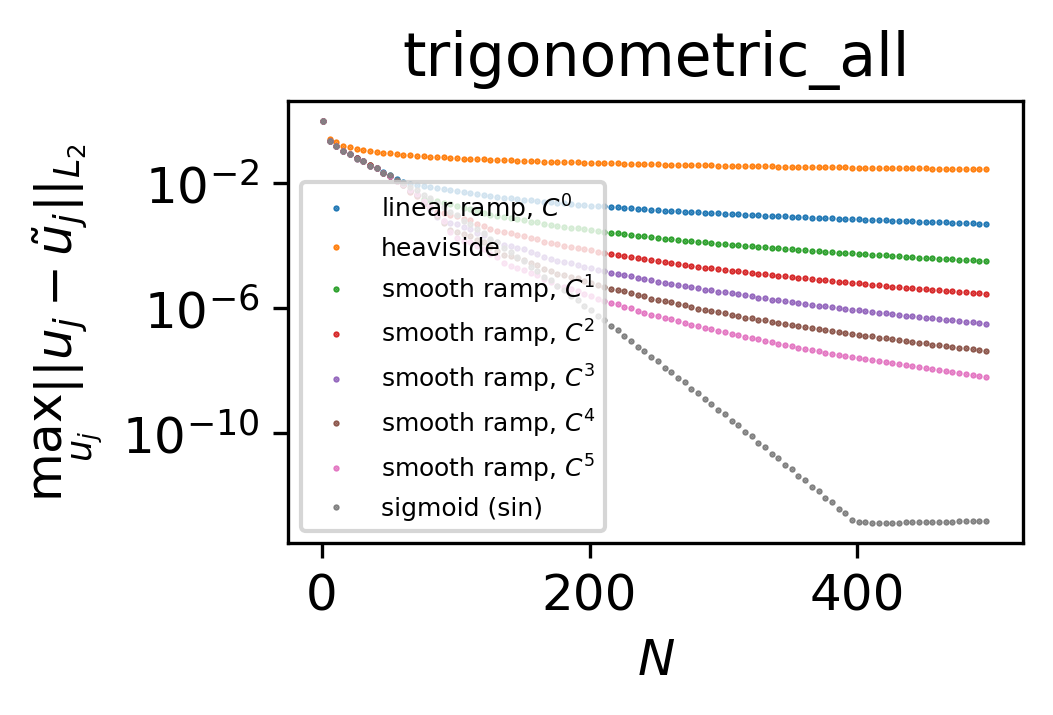

In [9]:
for i, bv in enumerate(basis_all):
    print(bv.name)
    
    fig, ax = plt.subplots()
    for j, ic in enumerate(initc):
        lbl = ic.name
        if ic.name[-1].isdigit():
            lbl = ic.name[:-3]+'$'+ic.name[-3:]+'$'
        ax.plot(results[i][j][0], ".", ms=1, label=lbl)
    ax.set_yscale('log')
    plt.title(bv.name)
    plt.legend(prop={'size': 6})
    plt.xlabel(r'$N$')
    plt.ylabel(r'$\int || u_j - \tilde{u}_j ||_{L_2} d\mu$')
    plt.show()
    
    fig, ax = plt.subplots()
    for j, ic in enumerate(initc):
        lbl = ic.name
        if ic.name[-1].isdigit():
            lbl = ic.name[:-3]+'$'+ic.name[-3:]+'$'
        ax.plot(results[i][j][1], ".", ms=1, label=lbl)
    ax.set_yscale('log')
    plt.title(bv.name)
    plt.legend(prop={'size': 6})
    plt.xlabel(r'$N$')
    plt.ylabel(r'$\max_{u_j} || u_j - \tilde{u}_j ||_{L_2} $')
    plt.show()

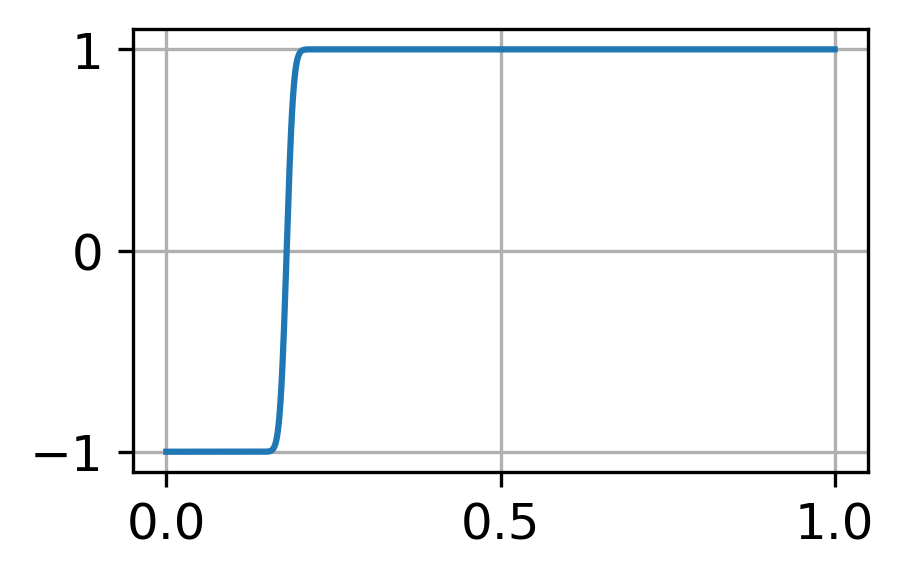

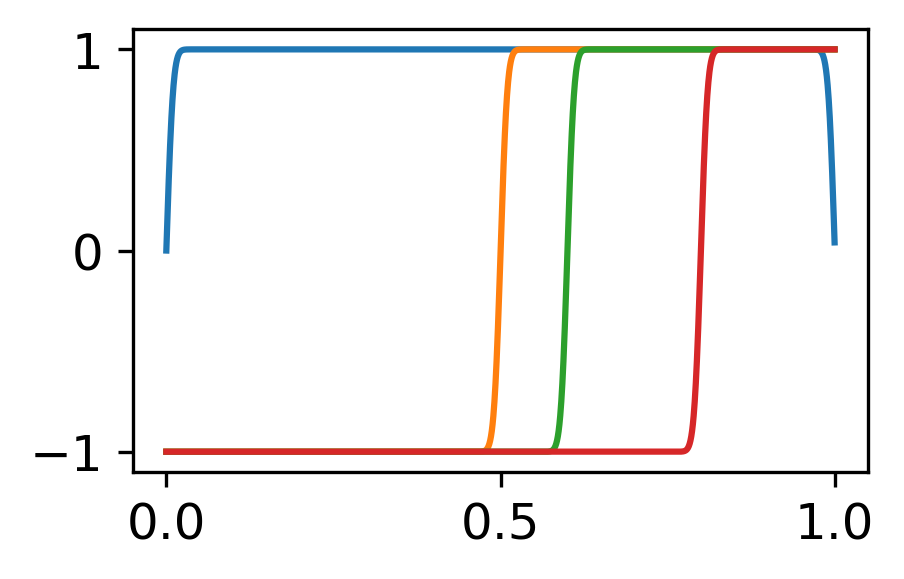

In [10]:
fig, ax = plt.subplots()
for i in [450]:
    plt.plot(x(), X[:, i])
plt.grid()
plt.show()
fig, ax = plt.subplots()
for i in [0, 1250, 1500, 1999]:
    plt.plot(x(), X[:, i])
plt.show()

In [11]:
mu_plot = np.array([0, .25, .5, 0.75, 1])
X = u_k.half_half_wave_odd(x(), mu_plot)
# [-inf ... -1.0]:  g(x) = 0.0
# [-1.0 ... -0.5]:  g(x) = -f(x)
# [-0.5 ... -0.0]:  g(x) = -(1-f(x))
#  [0.0 ...  0.5]:  g(x) = f(x)
#  [0.5 ...  1.0]:  g(x) = 1-f(x)
#  [1.0 ...  inf]:  g(x) = 0.0

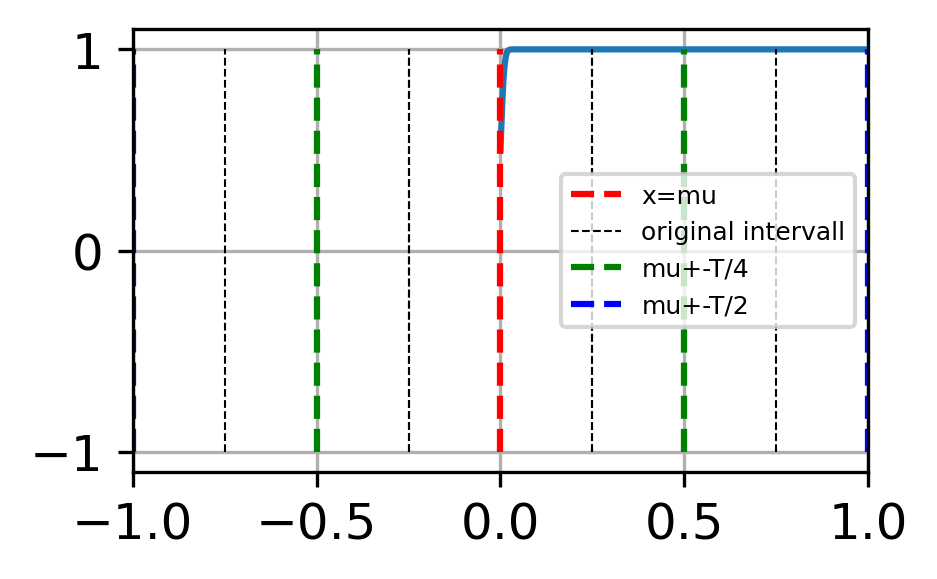

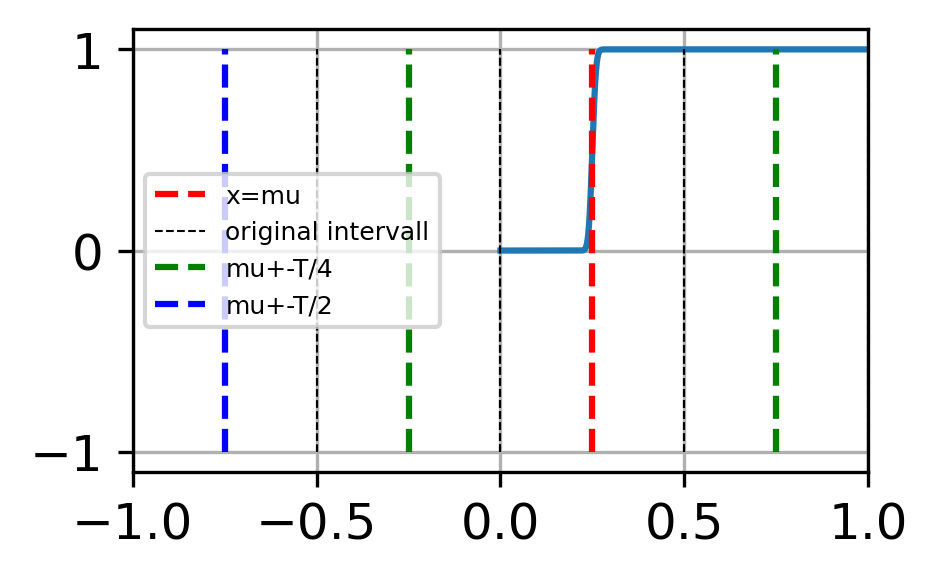

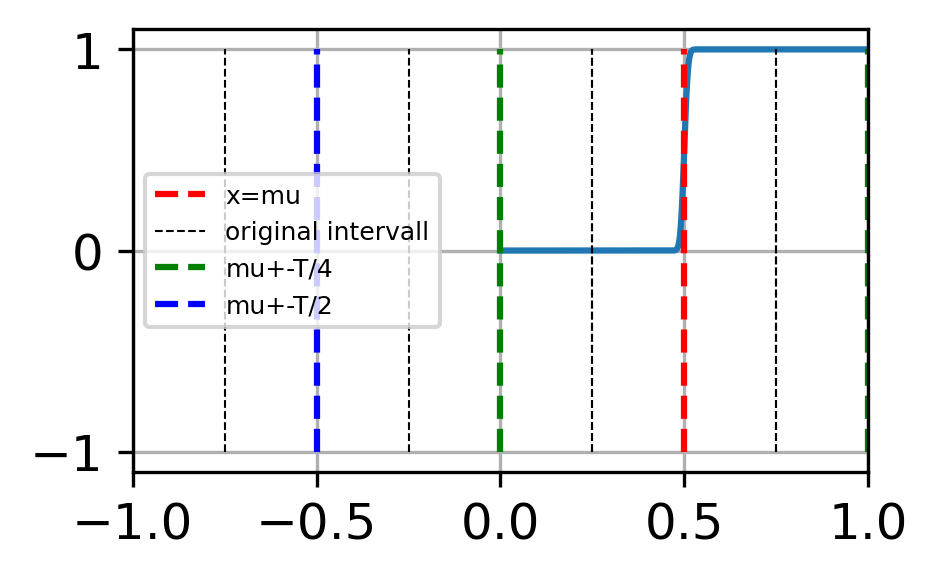

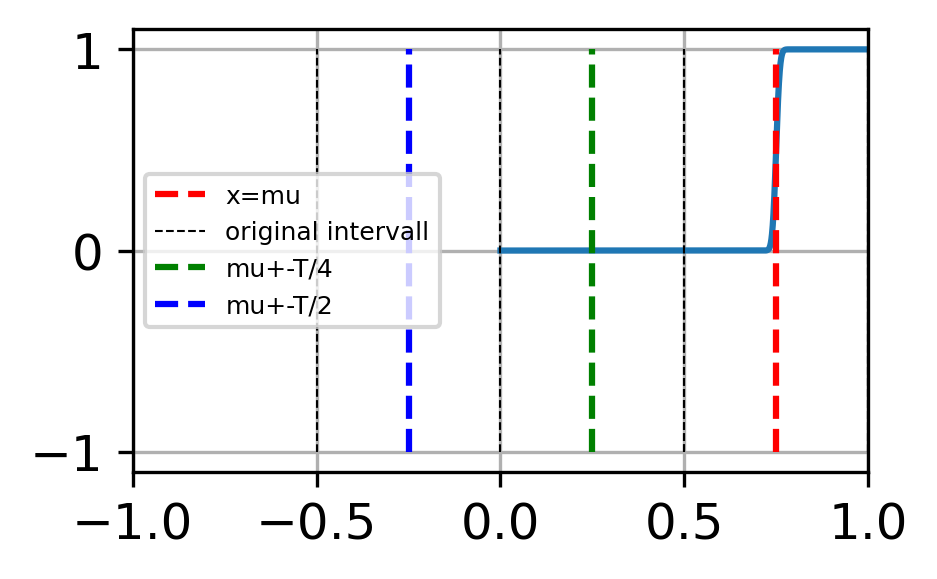

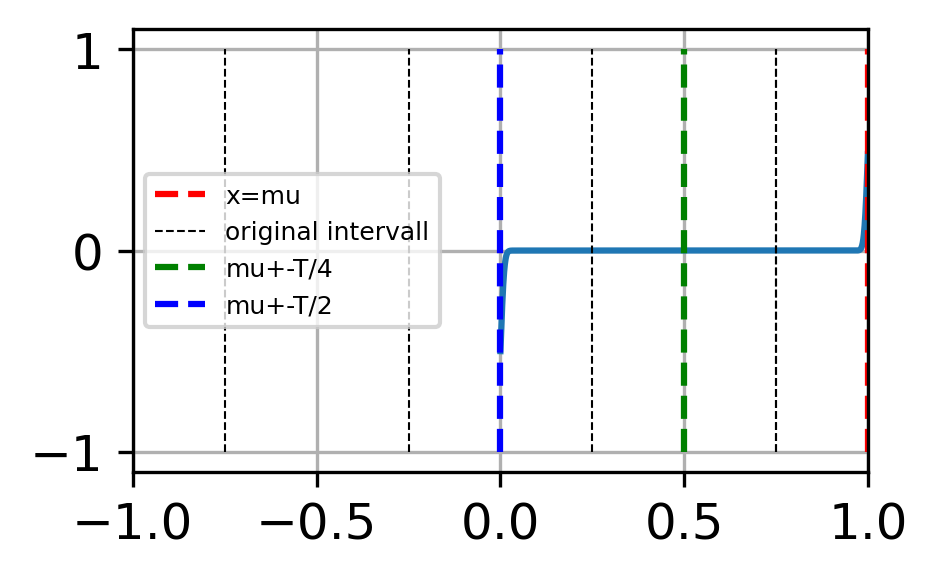

In [12]:
i = 250
for i, xx in enumerate(mu_plot):
    T = 2
    #xx = mu()[i]
    fig, ax = plt.subplots()
    plt.plot(x(), X[:, i])
    plt.plot([xx, xx], [-1, 1], "r--", label="x=mu")
    plt.plot([xx-T/8, xx-T/8], [-1, 1], "k--", lw=.5, label="original intervall")
    plt.plot([xx+T/8, xx+T/8], [-1, 1], "k--", lw=.5)
    for j in [1, 3, 5, 7, 9, 11, 13]:
        plt.plot([xx+T*j/8, xx+T*j/8], [-1, 1], "k--", lw=.5)
        plt.plot([xx-T*j/8, xx-T*j/8], [-1, 1], "k--", lw=.5)
    plt.plot([xx+T/4, xx+T/4], [-1, 1], "g--")
    plt.plot([xx+T/2, xx+T/2], [-1, 1], "b--")
    plt.plot([xx-T/4, xx-T/4], [-1, 1], "g--", label="mu+-T/4")
    plt.plot([xx-T/2, xx-T/2], [-1, 1], "b--", label="mu+-T/2")
    plt.xlim([-1, 1])
    plt.legend(prop={'size': 6})
    plt.grid()



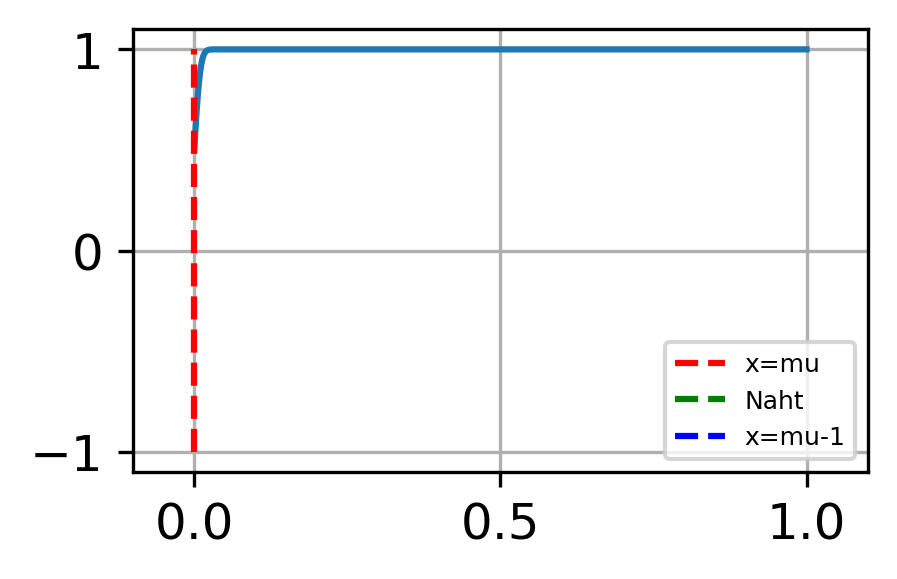

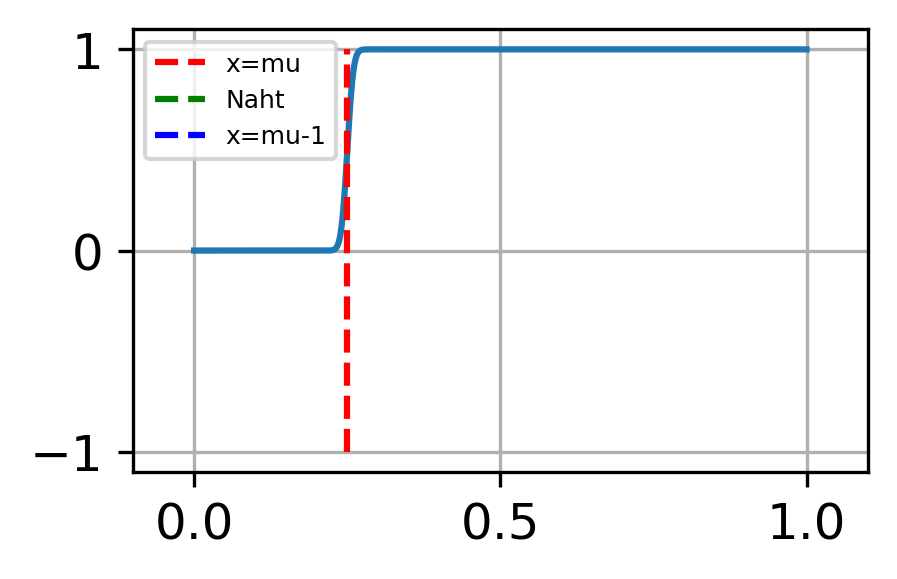

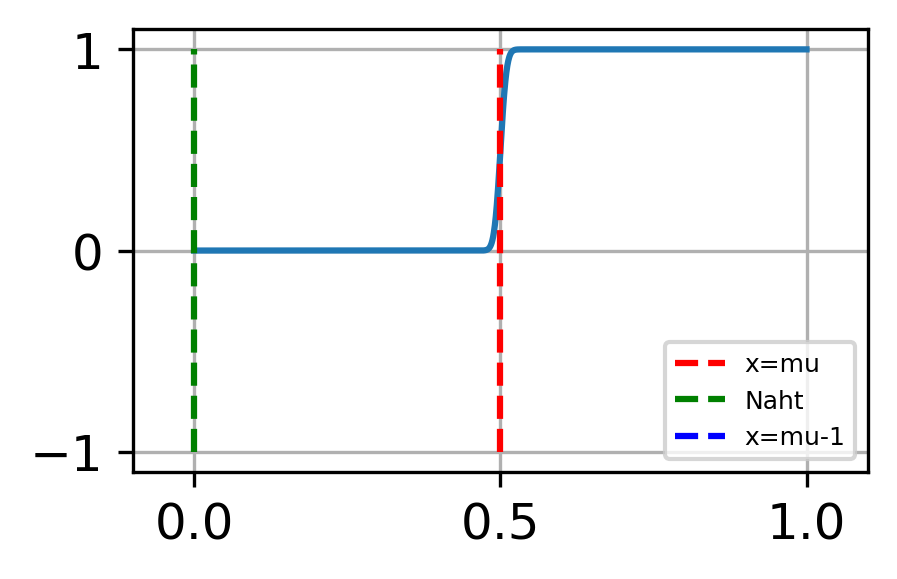

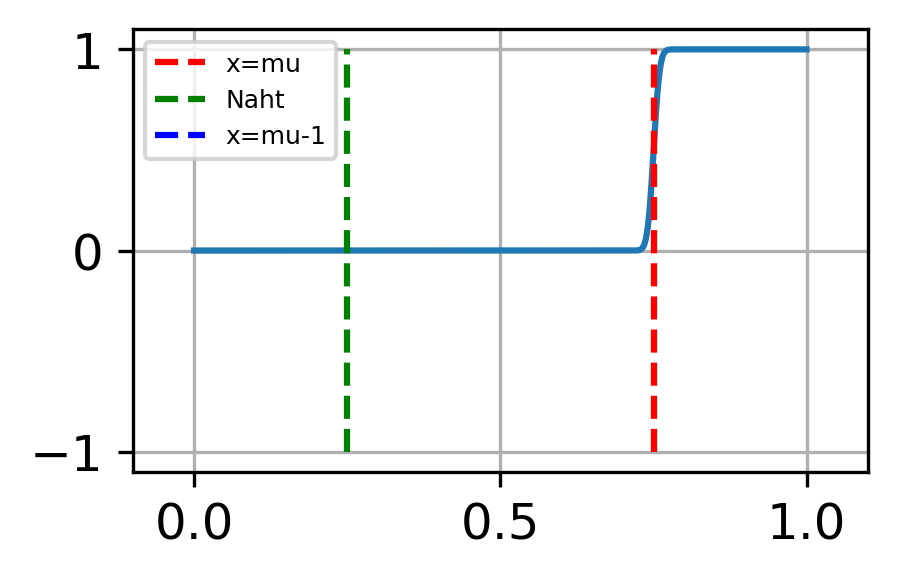

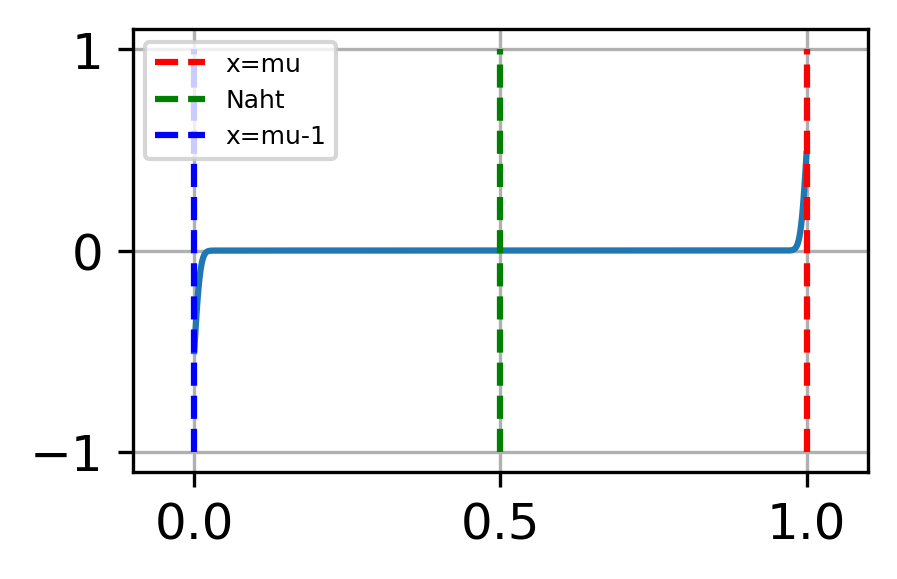

In [13]:
i = 250
for i, xx in enumerate(mu_plot):
    T = 2
    #xx = mu()[i]
    fig, ax = plt.subplots()
    plt.plot(x(), X[:, i])
    plt.plot([xx, xx], [-1, 1], "r--", label="x=mu")
    plt.plot([xx-T/4, xx-T/4], [-1, 1], "g--", label="Naht")
    plt.plot([xx-T/2, xx-T/2], [-1, 1], "b--", label="x=mu-1")
    plt.xlim([-.1, 1.1])
    plt.legend(prop={'size': 6})
    plt.grid()